In [1]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
import category_encoders as ce
from pandas_profiling import ProfileReport
import datetime
import pandas_profiling
from datetime import datetime
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 200)

In [2]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from collections import Counter

In [3]:
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile, where, random

In [4]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer

In [5]:
#pip install yellowbrick

In [5]:
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing


In [6]:
from scipy import stats
import seaborn as sns
from math import ceil

In [7]:
from os.path import join
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

In [8]:
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

* [QUEBRA](#quebra)


* [1. Data importation](#data_importation)
* [2. Data Preprocessing](#data_preprocessing)
    * [2.1. Initial variable exclusion](#initial_exclusion)
    * [2.2. Initial feature transformation](#initial_transformation)
    * [2.3. Feature exclusion by missing values](#exclud_missings)
    * [2.4. Boolean Transformation](#bool_transform)
    * [2.5. Excluding Variables Through Correlation](#exclud_corr)
    * [2.6. Feature Encoding](#feature_encode)
    * [2.7. Missing values imputation](#imput_missing)
    * [2.8. Scaling data](#data_scaling)
    * [2.9. Outlier removal](#out_remove)
        * [2.9.1. IQR](#out_iqr)
        * [2.9.2. Z-scores](#z_scores)
        * [2.9.3. Using PCA](#out_pca)
        * [2.9.4. DBSCAN](#out_dbscan)
        * [2.9.5. Local Outlier Factor](#out_lof)
* [3. Division of Features by Category](#categ_div)
    * [3.1. Additional Tranformations](#add_transform)
    * [3.2. Scaling data](#data_scaling2)
    * [3.3. Feature Correlations](#feat_corr)
    * [3.4. PCA for census category](#pca_census)
* [4. Clustering](#clustering)
    * [4.1. Dataframe sample](#sample)
    * [4.2. Optimal Clusterer](#opt_clust)
        * [4.2.1. Demographic Features](#oc_dem)
        * [4.2.2. Summary Features](#oc_sum)
        * [4.2.3. Census Features](#oc_cen)
    * [4.3. Defining the number of clusters](#num_clust)
        * [4.3.1. Demographic Features](#nc_dem)
        * [4.3.2. Summary Features](#nc_sum)
        * [4.3.3. Census Features with pca](#nc_cen_pca)
        * [4.3.4. Census Features](#nc_cen)
    * [4.4. Clustering with the most important features](#most_imp_cl)
    * [4.5. K-Means](#k_means)
         * [4.5.1. Demographic Features](#k_dem)
         * [4.5.2. Census Features](#k_cen)
         * [4.5.3. Summary Features](#k_sum)
         * [4.5.4. Visualize Category Final Dataframes](#final_cat)
         * [4.5.5. Merge Categories](#merge_cat)
    * [4.6. Decision Tree](#dt)
    * [4.7. Classification of Outliers](#out_class)
    * [4.8. Cluster visualization using t-SNE](#t_sne)
    * [4.9. DBSCAN](#dbscan_noise)
    * [4.10. GMM](#gmm)



<a class="anchor" id="none">

<hr>
<a class="anchor" id="data_importation">
    
<font size="8"><span style='color:DarkTurquoise'> **1. Data Importation**  </span></font>
    
</a>

In [9]:
data = pd.read_csv('donors.csv')
data.head(3)

Unnamed: 0     ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE  \
0           0  2009-01-01     GRI      0    IL  61081                     
1           1  2014-01-01     BOA      1    CA  91326                     
2           2  2010-01-01     AMH      1    NC  27017                     

          DOB NOEXCH RECINHSE RECP3 RECPGVG RECSWEEP MDMAUD DOMAIN HOMEOWNR  \
0  1957-12-01      0                                   XXXX     T2            
1  1972-02-01      0                                   XXXX     S1        H   
2         NaN      0                                   XXXX     R2        U   

  CHILD03 CHILD07 CHILD12 CHILD18  NUMCHLD  INCOME GENDER  WEALTH1  HIT  \
0                                      NaN     NaN      F      NaN    0   
1                               M      1.0     6.0      M      9.0   16   
2                                      NaN     3.0      M      1.0    2   

   MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  MAGMALE  PUBGARDN  \
0      NaN       NaN      NaN       NaN      NaN     NaN      NaN       NaN   
1      0.0       0.0      3.0       1.0      1.0     1.0      0.0       0.0   
2      0.0       0.0      1.0       0.0      0.0     0.0      0.0       0.0   

   PUBCULIN  PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  PUBOPP DATASRCE  MALEMILI  \
0       NaN      NaN       NaN       NaN       NaN     NaN                  0   
1       0.0      2.0       0.0       3.0       0.0     0.0        3         0   
2       0.0      1.0       0.0       0.0       0.0     0.0        3         0   

   MALEVET  VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV SOLP3 SOLIH MAJOR  \
0       39        34        18        10         2       1                     
1       15        55        11         6         2       1                     
2       20        29        33         6         8       1                     

   WEALTH2 GEOCODE COLLECT1 VETERANS BIBLE CATLG HOMEE PETS CDPLAY STEREO  \
0      5.0                                                                  
1      9.0      02                                                          
2      1.0                                                                  

  PCOWNERS PHOTO CRAFTS FISHER GARDENIN BOATS WALKER KIDSTUFF CARDS PLATES  \
0                                                                            
1                                                                            
2                                                                            

  LIFESRC PEPSTRFL  POP901  POP902  POP903  POP90C1  POP90C2  POP90C3  \
0                X     992     264     332        0       35       65   
1                     3611     940     998       99        0        0   
2                X    7001    2040    2669        0        2       98   

   POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  ETH6  ETH7  ETH8  ETH9  \
0       47       53    92     1     0     0    11     0     0     0     0   
1       50       50    67     0     0    31     6     4     2     6     4   
2       49       51    96     2     0     0     2     0     0     0     0   

   ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  ETH16  AGE901  AGE902  AGE903  \
0      0      0      0     11      0      0      0      39      48      51   
1     14      0      0      2      0      1      4      34      41      43   
2      0      0      0      2      0      0      0      35      43      46   

   AGE904  AGE905  AGE906  AGE907  CHIL1  CHIL2  CHIL3  AGEC1  AGEC2  AGEC3  \
0      40      50      54      25     31     42     27     11     14     18   
1      32      42      45      32     33     46     21     13     14     33   
2      37      45      49      23     35     40     25     13     20     19   

   AGEC4  AGEC5  AGEC6  AGEC7  CHILC1  CHILC2  CHILC3  CHILC4  CHILC5  HHAGE1  \
0     17     13     11     15      12      11      34      25      18      26   
1     23     10      4      2      11      16      36      22      15      12   
2     16     13     10  

<hr>
<a class="anchor" id="data_preprocessing">
    
<font size="8"><span style='color:DarkTurquoise'> **2. Data Preprocessing**  </span></font>
    
</a>

In [10]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
data.shape[0]

95412

In [12]:
df = data.copy() 
any(df.duplicated())

False

<a class="anchor" id="initial_exclusion">
    
<font size="5"><span style='color:LightSkyBlue'> **2.1. Initial Variable Exclusion**  </span></font>
    
</a>

In [13]:
df.drop(df.loc[df['MAILCODE']=='B'].index, inplace=True)
df.drop(['MAILCODE'], axis = 1, inplace = True)
df.shape[0]/data.shape[0]

0.9853372741374251

In [14]:
df.drop(['DATASRCE', 'LIFESRC', 'NOEXCH', 'WEALTH1', ], axis = 1, inplace = True) 
df.drop(df.loc[df['SOLP3']=='00'].index, inplace=True)
df.drop(df.loc[df['SOLIH']=='00'].index, inplace=True)
df.shape[0]/data.shape[0]

0.9817737810757556

<a class="anchor" id="initial_transformation">
    
<font size="5"><span style='color:LightSkyBlue'> **2.2. Initial Feature Transformation**  </span></font>
    
</a>

In [15]:
df['DOB'] = 2017 - df['DOB'].str[:4].fillna(0).astype(int)
df['DOB'] = df['DOB'].replace(2017, np.nan)
df['DOB'].isna().sum()

NumExpr defaulting to 8 threads.


23292

In [16]:
df=df.rename(columns={'DOB':'AGE'}) 

In [17]:
df['ETH4']= df['ETH12']+ df['ETH4']
df['ETH5']= df['ETH5']+df['ETH13']+ df['ETH14']+ df['ETH15'] + df['ETH16']
df['ETH6']= df['ETH6']+df['ETH8']+ df['ETH9']+ df['ETH10'] + df['ETH11']
df.drop(['ETH12', 'ETH13', 'ETH14', 'ETH15','ETH16', 'ETH8', 'ETH9', 'ETH10', 'ETH11'], axis = 1, inplace = True)

df['IC7']= df['IC7']+df['IC8']
df['IC8']= df['IC9']+df['IC10']
df['IC9']= df['IC11']+df['IC12']
df.drop(['IC10', 'IC11', 'IC12'], axis = 1, inplace = True)

In [18]:
df = df[df.POP901 >0] #it must have at least someone 

In [19]:
df.shape[0]/data.shape[0]

0.9737139982392152

In [20]:
df.drop(['TPE4', 'TPE5', 'TPE6', 'TPE7', 'EIC2', 'OEDC7', 'AFC1', 'AFC2', 'AFC3','HC9','HC10','HC15'], axis=1, inplace=True) #large number of zeros
df.drop(['LFC8', 'LFC9'], axis=1, inplace=True) #many extreme percentages 0 and 100% 
df.drop('GEOCODE2', axis=1, inplace=True) #we have no information of what the codes mean
df.drop(['RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'PVASTATE','SOLP3', 'SOLIH', 'GEOCODE'], axis=1, inplace=True) #too many null values (not defined as nan by default)
df.drop(['RFA_2R'], axis=1, inplace=True) #RFA_2R - constant value
df.drop(['MALEMILI','MALEVET','VIETVETS','WWIIVETS','LOCALGOV','STATEGOV','FEDGOV'], axis=1, inplace=True) #not related to the census, can't really understand to each population it refers to 
df=df.reset_index(drop=True)
for index in range(len(df)):
    if pd.isna(df['NUMCHLD'][index]):
        if ((df['CHILD03'][index]==' ' and df['CHILD07'][index]==' ') and (df['CHILD12'][index]==' ' and df['CHILD18'][index]==' ')):
            df['NUMCHLD'][index] = 0
            
df.drop(['CHILD03', 'CHILD07','CHILD12','CHILD18'], axis=1, inplace=True)
df[['ZIP','null']] = df.ZIP.str.split("-",1, expand=True)
df.drop(['null'], axis=1, inplace=True)
df.ZIP = df.ZIP.astype('int')

In [21]:
df.NUMCHLD.isna().sum()

1525

<a class="anchor" id="exclud_missings">
    
<font size="6"><span style='color:LightSkyBlue'> **2.3. Feature exclusion by missing values**  </span></font>
    
</a>


In [22]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
for index in range(len(missing_value_df)):
    if missing_value_df['percent_missing'][index]>=45:
        df.drop(missing_value_df['column_name'][index], axis=1, inplace=True)


<a class="anchor" id="bool_transform">
    
<font size="6"><span style='color:LightSkyBlue'> **2.4. Boolean Transformation**  </span></font>
    
</a>


In [23]:
#find which columns represent booleans
def get_bools(data):
    bools=[]
    for col in data:
        if len(data[col].unique()) == 2:
            bools.append(col)
    return bools
bools = get_bools(df)

#find wich columns are dates
dates = df.filter(like='DATE').columns

#tranform those dates into datetime and then into days
df[dates] = df[dates].apply(pd.to_datetime)
df[dates] = (datetime(2017, 12, 31) - df[dates]) #CONFIRMAR ESTE DIA
df[dates]= df[dates].astype('timedelta64[D]')

#transform booleans to binary
df[bools]=df[bools].replace([' ','U'],0)
df[bools]=df[bools].replace(['X','Y','H'],1)
df

ODATEDW OSOURCE  TCODE STATE    ZIP   AGE MDMAUD DOMAIN HOMEOWNR  \
0       3286.0     GRI      0    IL  61081  60.0   XXXX     T2            
1       1460.0     BOA      1    CA  91326  45.0   XXXX     S1        H   
2       2921.0     AMH      1    NC  27017   NaN   XXXX     R2        U   
3       4017.0     BRY      0    CA  95953  69.0   XXXX     R2        U   
4       4382.0              0    FL  33176  77.0   XXXX     S2        H   
...        ...     ...    ...   ...    ...   ...    ...    ...      ...   
92899    730.0     ASE      1    AK  99504   NaN   XXXX     C2            
92900    730.0     DCD      1    TX  77379  47.0   XXXX     C1        H   
92901   1095.0     MBC      1    MI  48910  59.0   XXXX     C3            
92902   4382.0     PRV      0    CA  91320  57.0   XXXX     C1        H   
92903   3652.0     MCC      2    NC  28409  79.0   C1CM     C1        U   

       NUMCHLD  INCOME GENDER  HIT  MAJOR  COLLECT1  VETERANS  BIBLE  CATLG  \
0          0.0     NaN      F    0      0         0         0      0      0   
1          1.0     6.0      M   16      0         0         0      0      0   
2          0.0     3.0      M    2      0         0         0      0      0   
3          0.0     1.0      F    2      0         0         0      0      0   
4          1.0     3.0      F   60      0         0         0      1      1   
...        ...     ...    ...  ...    ...       ...       ...    ...    ...   
92899      0.0     NaN      M    0      0         0         0      0      0   
92900      1.0     7.0      M    1      0         0         0      0      0   
92901      0.0     NaN      M    0      0         0         0      0      0   
92902      0.0     7.0      F    0      0         0         0      0      0   
92903      0.0     5.0      F    3      1         0         0      0      0   

       HOMEE  PETS  CDPLAY  STEREO  PCOWNERS  PHOTO  CRAFTS  FISHER  GARDENIN  \
0          0     0       0       0         0      0       0       0         0   
1          0     0       0       0         0      0       0       0         0   
2          0     0       0       0         0      0       0       0         0   
3          0     0       0       0         0      0       0       0         0   
4          0     0       0       1         0      0       1       0         1   
...      ...   ...     ...     ...       ...    ...     ...     ...       ...   
92899      0     0       0       0         0      0       0       0         0   
92900      0     0       0       0         0      0       0       0         0   
92901      0     0       0       0         0      0       0       0         0   
92902      0     0       0       0         0      0       0       0         0   
92903      0     0       0       0         0      0       0       0         0   

       BOATS  WALKER  KIDSTUFF  CARDS  PLATES  PEPSTRFL  POP901  POP902  \
0          0       0         0      0       0         1     992     264   
1          0       0         0      0       0         0    3611     940   
2          0       0         0      0       0         1    7001    2040   
3          0       0         0      0       0         1     640     160   
4          0       1         0      1       0         0    2520     627   
...      ...     ...       ...    ...     ...       ...     ...     ...   
92899      0       0         0      0       0         0   27380    7252   
92900      0       0         0      0       0         0    1254     322   
92901      0       0         0      0       0         1     552     131   
92902      0       0         0      0       0         1    1746     432   
92903      0       0         0      0       0         1    3935    1192   

       POP903  POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  \
0         332        0       35       65       47       53    92     1     0   
1         998       99        0        0       50       50    67     0     0   
2        2669        0        2       98   

In [24]:
#turn variables into binary
bols = ['HOMEOWNR']
df[bols]=df[bols].replace([' ','U'],0)
df[bols]=df[bols].replace(['H'],1)
df

ODATEDW OSOURCE  TCODE STATE    ZIP   AGE MDMAUD DOMAIN  HOMEOWNR  \
0       3286.0     GRI      0    IL  61081  60.0   XXXX     T2         0   
1       1460.0     BOA      1    CA  91326  45.0   XXXX     S1         1   
2       2921.0     AMH      1    NC  27017   NaN   XXXX     R2         0   
3       4017.0     BRY      0    CA  95953  69.0   XXXX     R2         0   
4       4382.0              0    FL  33176  77.0   XXXX     S2         1   
...        ...     ...    ...   ...    ...   ...    ...    ...       ...   
92899    730.0     ASE      1    AK  99504   NaN   XXXX     C2         0   
92900    730.0     DCD      1    TX  77379  47.0   XXXX     C1         1   
92901   1095.0     MBC      1    MI  48910  59.0   XXXX     C3         0   
92902   4382.0     PRV      0    CA  91320  57.0   XXXX     C1         1   
92903   3652.0     MCC      2    NC  28409  79.0   C1CM     C1         0   

       NUMCHLD  INCOME GENDER  HIT  MAJOR  COLLECT1  VETERANS  BIBLE  CATLG  \
0          0.0     NaN      F    0      0         0         0      0      0   
1          1.0     6.0      M   16      0         0         0      0      0   
2          0.0     3.0      M    2      0         0         0      0      0   
3          0.0     1.0      F    2      0         0         0      0      0   
4          1.0     3.0      F   60      0         0         0      1      1   
...        ...     ...    ...  ...    ...       ...       ...    ...    ...   
92899      0.0     NaN      M    0      0         0         0      0      0   
92900      1.0     7.0      M    1      0         0         0      0      0   
92901      0.0     NaN      M    0      0         0         0      0      0   
92902      0.0     7.0      F    0      0         0         0      0      0   
92903      0.0     5.0      F    3      1         0         0      0      0   

       HOMEE  PETS  CDPLAY  STEREO  PCOWNERS  PHOTO  CRAFTS  FISHER  GARDENIN  \
0          0     0       0       0         0      0       0       0         0   
1          0     0       0       0         0      0       0       0         0   
2          0     0       0       0         0      0       0       0         0   
3          0     0       0       0         0      0       0       0         0   
4          0     0       0       1         0      0       1       0         1   
...      ...   ...     ...     ...       ...    ...     ...     ...       ...   
92899      0     0       0       0         0      0       0       0         0   
92900      0     0       0       0         0      0       0       0         0   
92901      0     0       0       0         0      0       0       0         0   
92902      0     0       0       0         0      0       0       0         0   
92903      0     0       0       0         0      0       0       0         0   

       BOATS  WALKER  KIDSTUFF  CARDS  PLATES  PEPSTRFL  POP901  POP902  \
0          0       0         0      0       0         1     992     264   
1          0       0         0      0       0         0    3611     940   
2          0       0         0      0       0         1    7001    2040   
3          0       0         0      0       0         1     640     160   
4          0       1         0      1       0         0    2520     627   
...      ...     ...       ...    ...     ...       ...     ...     ...   
92899      0       0         0      0       0         0   27380    7252   
92900      0       0         0      0       0         0    1254     322   
92901      0       0         0      0       0         1     552     131   
92902      0       0         0      0       0         1    1746     432   
92903      0       0         0      0       0         1    3935    1192   

       POP903  POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  \
0         332        0       35       65       47       53    92     1     0   
1         998       99        0        0       50       50    67     0     0   
2        2669        0        2

In [27]:
df_ = df.replace(' ', np.nan)

In [28]:
df_.GENDER.value_counts()

F    50000
M    38052
U     1673
J      357
A        2
C        2
Name: GENDER, dtype: int64

In [29]:
df_.GENDER.fillna('U', inplace = True)  

df_.drop(df_[df_.GENDER == 'C'].index, inplace=True)  #in metadata there is no reference to these two values
df_.drop(df_[df_.GENDER == 'A'].index, inplace=True)

df_.GENDER = df_.GENDER.replace(['F'],0)
df_.GENDER = df_.GENDER.replace(['M'],1)
df_.GENDER = df_.GENDER.replace(['U','J'],2)

<a class="anchor" id="exclud_corr">
    
<font size="6"><span style='color:LightSkyBlue'> **2.5. Excluding Variables Through Correlation**  </span></font>
    
</a>



<a class="anchor" id="corr">

In [30]:
blacklist=[]
corr_matrix=df_.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[j, i]) > 0.85:
            colname = corr_matrix.columns[i]
            rowname = corr_matrix.columns[j]
            
            if colname in blacklist or rowname in blacklist:
                continue
            list1 = []
            list2 = []
            for k, index in enumerate(corr_matrix[colname]):
                if(corr_matrix.columns[k] not in blacklist):
                    list1.append(1-abs(index)) 
            for k, index in enumerate(corr_matrix[rowname]):
                if(corr_matrix.columns[k] not in blacklist):
                    list2.append(1-abs(index))
            if sum(list1)>sum(list2):
                blacklist.append(colname)
                df_.drop(colname, axis=1, inplace=True)

            else:
                blacklist.append(rowname)
                df_.drop(rowname, axis=1, inplace=True)
                
for column in corr_matrix.columns:
    if (corr_matrix[column]< 0.1).all() is True:
        corr_matrix.drop(column, axis=1, inplace=True)
        df_.drop(column, axis=1, inplace=True)

In [31]:
df_.drop(df_.loc[:,'ADATE_2':'RFA_24'], axis=1, inplace =True)   
#RFA has a high degree of cardinality
#we have other more important dates than to know for each gift

df_.drop(['OSOURCE', 'DOMAIN', 'MDMAUD'], axis=1, inplace=True) #high cardinality
#Domain has other variables that explain this, is redundant 
#MDMAUD we have other values that contain this information (the other MDMAUD_)

df_.drop(['HVP5',  # we already have the median home value, it's skewed
         'IC7','IC8', 'IC16', 'IC17', 'IC18', 'IC19','IC20','IC21','IC23','IC22',  #we have the income per capita and other values that explain this
         'TPE11'], axis=1, inplace=True)  #drop the average bc we have the median and it's slightly skewed

df_.drop(['HHD11',  #we have hhd10 and hhd3, redundant
         'ETHC1','ETHC2','ETHC3','ETHC5','ETHC6'], axis=1, inplace=True)   #we have other variables that explain this information

df_.drop(['TCODE', 'HPHONE_D'], axis=1, inplace=True)
df_.drop(['MSA', 'ADI', 'DMA'], axis=1,inplace=True) #codes
df_.drop(['MDMAUD_F', 'MDMAUD_R', 'MDMAUD_A'], axis=1, inplace=True)   

In [32]:
df_

STATE   AGE  HOMEOWNR  NUMCHLD  INCOME  GENDER  HIT  MAJOR  COLLECT1  \
0        IL  60.0         0      0.0     NaN       0    0      0         0   
1        CA  45.0         1      1.0     6.0       1   16      0         0   
2        NC   NaN         0      0.0     3.0       1    2      0         0   
3        CA  69.0         0      0.0     1.0       0    2      0         0   
4        FL  77.0         1      1.0     3.0       0   60      0         0   
...     ...   ...       ...      ...     ...     ...  ...    ...       ...   
92899    AK   NaN         0      0.0     NaN       1    0      0         0   
92900    TX  47.0         1      1.0     7.0       1    1      0         0   
92901    MI  59.0         0      0.0     NaN       1    0      0         0   
92902    CA  57.0         1      0.0     7.0       0    0      0         0   
92903    NC  79.0         0      0.0     5.0       0    3      1         0   

       VETERANS  BIBLE  CATLG  HOMEE  PETS  CDPLAY  STEREO  PCOWNERS  PHOTO  \
0             0      0      0      0     0       0       0         0      0   
1             0      0      0      0     0       0       0         0      0   
2             0      0      0      0     0       0       0         0      0   
3             0      0      0      0     0       0       0         0      0   
4             0      1      1      0     0       0       1         0      0   
...         ...    ...    ...    ...   ...     ...     ...       ...    ...   
92899         0      0      0      0     0       0       0         0      0   
92900         0      0      0      0     0       0       0         0      0   
92901         0      0      0      0     0       0       0         0      0   
92902         0      0      0      0     0       0       0         0      0   
92903         0      0      0      0     0       0       0         0      0   

       CRAFTS  FISHER  GARDENIN  BOATS  WALKER  KIDSTUFF  CARDS  PLATES  \
0           0       0         0      0       0         0      0       0   
1           0       0         0      0       0         0      0       0   
2           0       0         0      0       0         0      0       0   
3           0       0         0      0       0         0      0       0   
4           1       0         1      0       1         0      1       0   
...       ...     ...       ...    ...     ...       ...    ...     ...   
92899       0       0         0      0       0         0      0       0   
92900       0       0         0      0       0         0      0       0   
92901       0       0         0      0       0         0      0       0   
92902       0       0         0      0       0         0      0       0   
92903       0       0         0      0       0         0      0       0   

       PEPSTRFL  POP903  POP90C1  POP90C2  POP90C3  POP90C5  ETH1  ETH3  ETH7  \
0             1     332        0       35       65       53    92     0     0   
1             0     998       99        0        0       50    67     0     2   
2             1    2669        0        2       98       51    96     0     0   
3             1     219        0        8       92       46    61     0     2   
4             0     761       99        0        0       54     2     0     0   
...         ...     ...      ...      ...      ...      ...   ...   ...   ...   
92899         0   10037       99        0        0       50    78     6     0   
92900         0     361       96        0        4       49    91     0     0   
92901         1     205       99        0        0       47    82     0     0   
92902         1     508       99        0        0       53    92     1     1   
92903         1    1342       99        0        0       52    86     0     0   

       CHIL2  CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  CHILC1  CHILC2  \
0         42     27     11     14     18     17     13      12      11   
1         46     21     13     14     33     23     10      11      16   
2         40     25     

In [33]:
corr_matrix=df_.corr()
corr_features =[]
for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) >= 0.80:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            corr_features.append((colname1, colname2))
corr_features

[('HHD3', 'HU2'), ('HUPA6', 'HU2'), ('VOC2', 'HHD3'), ('VOC3', 'VOC2')]

In [34]:
def get_numeric(data,bools):
    data = data.drop(columns= bools)
    numeric_data = data.select_dtypes(include=[np.number]).columns.to_list()
    return numeric_data


def get_categorical(data,numeric,bools):
    categorical_data = data.columns.drop(numeric+bools).to_list()
    return categorical_data

def update_dtypes(data):
    bools = get_bools(data)
    numeric_data = get_numeric(data,bools)
    categorical_data = get_categorical(data,numeric_data,bools)
    return bools,numeric_data,categorical_data

bools,numeric_data,categorical_data = update_dtypes(df_)

<a class="anchor" id="feature_encode">
    
<font size="6"><span style='color:LightSkyBlue'> **2.6. Feature Encoding**  </span></font>
    
</a>


In [35]:
df_.RFA_2A.value_counts()

F    45838
E    21083
G    18743
D     7236
Name: RFA_2A, dtype: int64

In [36]:
 # create object of Ordinalencoding to deal with the variable education level
encoder= ce.OrdinalEncoder(cols=['RFA_2A'],return_df=True,
                           mapping=[{'col':'RFA_2A',
'mapping':{'D':0, 'E':1, 'F':2, 'G':3}}])

#fit and transform train data 
df_transformed = encoder.fit_transform(df_)
#check
df_transformed.RFA_2A.value_counts() 

2    45838
1    21083
3    18743
0     7236
Name: RFA_2A, dtype: int64

In [37]:
#keep only the top 5 states
df_transformed.STATE = df_transformed.STATE.replace(['NC', 'AL', 'IN', 'LA', 'IA', 'TN', 'KS', 'MN',
       'UT', 'MO', 'OR', 'WA', 'WI', 'GA', 'OK', 'KY', 'MD',
       'SD', 'NV', 'NE', 'AZ', 'VA', 'SC', 'ND', 'AK', 'AR', 'NM', 'MT',
       'MS', 'CO', 'HI', 'ME', 'WY', 'ID', 'OH', 'NJ', 'MA', 'VT', 'NY',
       'PA', 'DC', 'CT', 'DE', 'WV', 'RI', 'AA', 'NH'],'Others')

#'IL', 'CA', 'FL', 'TX', 'MI'

In [38]:
df_transformed.STATE.value_counts()

Others    48646
CA        16991
FL         8154
TX         7284
IL         6293
MI         5532
Name: STATE, dtype: int64

In [39]:
df_ohc= df_transformed.copy()

one_hot_feat= ["STATE"]
ohc= OneHotEncoder(sparse=False)
ohc_feat= ohc.fit_transform(df_ohc[one_hot_feat])
ohc_feat_names= ohc.get_feature_names(["STATE"])
ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)
df_ohc = pd.concat([df_ohc.drop(columns=one_hot_feat), ohc_df], axis=1)
df_ohc

AGE  HOMEOWNR  NUMCHLD  INCOME  GENDER  HIT  MAJOR  COLLECT1  \
0      60.0         0      0.0     NaN       0    0      0         0   
1      45.0         1      1.0     6.0       1   16      0         0   
2       NaN         0      0.0     3.0       1    2      0         0   
3      69.0         0      0.0     1.0       0    2      0         0   
4      77.0         1      1.0     3.0       0   60      0         0   
...     ...       ...      ...     ...     ...  ...    ...       ...   
92899   NaN         0      0.0     NaN       1    0      0         0   
92900  47.0         1      1.0     7.0       1    1      0         0   
92901  59.0         0      0.0     NaN       1    0      0         0   
92902  57.0         1      0.0     7.0       0    0      0         0   
92903  79.0         0      0.0     5.0       0    3      1         0   

       VETERANS  BIBLE  CATLG  HOMEE  PETS  CDPLAY  STEREO  PCOWNERS  PHOTO  \
0             0      0      0      0     0       0       0         0      0   
1             0      0      0      0     0       0       0         0      0   
2             0      0      0      0     0       0       0         0      0   
3             0      0      0      0     0       0       0         0      0   
4             0      1      1      0     0       0       1         0      0   
...         ...    ...    ...    ...   ...     ...     ...       ...    ...   
92899         0      0      0      0     0       0       0         0      0   
92900         0      0      0      0     0       0       0         0      0   
92901         0      0      0      0     0       0       0         0      0   
92902         0      0      0      0     0       0       0         0      0   
92903         0      0      0      0     0       0       0         0      0   

       CRAFTS  FISHER  GARDENIN  BOATS  WALKER  KIDSTUFF  CARDS  PLATES  \
0           0       0         0      0       0         0      0       0   
1           0       0         0      0       0         0      0       0   
2           0       0         0      0       0         0      0       0   
3           0       0         0      0       0         0      0       0   
4           1       0         1      0       1         0      1       0   
...       ...     ...       ...    ...     ...       ...    ...     ...   
92899       0       0         0      0       0         0      0       0   
92900       0       0         0      0       0         0      0       0   
92901       0       0         0      0       0         0      0       0   
92902       0       0         0      0       0         0      0       0   
92903       0       0         0      0       0         0      0       0   

       PEPSTRFL  POP903  POP90C1  POP90C2  POP90C3  POP90C5  ETH1  ETH3  ETH7  \
0             1     332        0       35       65       53    92     0     0   
1             0     998       99        0        0       50    67     0     2   
2             1    2669        0        2       98       51    96     0     0   
3             1     219        0        8       92       46    61     0     2   
4             0     761       99        0        0       54     2     0     0   
...         ...     ...      ...      ...      ...      ...   ...   ...   ...   
92899         0   10037       99        0        0       50    78     6     0   
92900         0     361       96        0        4       49    91     0     0   
92901         1     205       99        0        0       47    82     0     0   
92902         1     508       99        0        0       53    92     1     1   
92903         1    1342       99        0        0       52    86     0     0   

       CHIL2  CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  CHILC1  CHILC2  \
0         42     27     11     14     18     17     13      12      11   
1         46     21     13     14     33     23     10      11      16   
2         40     25     13     20     19     16     13      15      14   
3         35     20     

In [40]:
df_=df_ohc.copy()



<a class="anchor" id="imput_missing">
    
<font size="6"><span style='color:LightSkyBlue'> **2.7. Missing values imputation**  </span></font>
    
</a>


In [41]:
bools,numeric_data,categorical_data = update_dtypes(df_)
df_[numeric_data]

AGE  NUMCHLD  INCOME  GENDER  HIT  POP903  POP90C1  POP90C2  POP90C3  \
0      60.0      0.0     NaN       0    0     332        0       35       65   
1      45.0      1.0     6.0       1   16     998       99        0        0   
2       NaN      0.0     3.0       1    2    2669        0        2       98   
3      69.0      0.0     1.0       0    2     219        0        8       92   
4      77.0      1.0     3.0       0   60     761       99        0        0   
...     ...      ...     ...     ...  ...     ...      ...      ...      ...   
92899   NaN      0.0     NaN       1    0   10037       99        0        0   
92900  47.0      1.0     7.0       1    1     361       96        0        4   
92901  59.0      0.0     NaN       1    0     205       99        0        0   
92902  57.0      0.0     7.0       0    0     508       99        0        0   
92903  79.0      0.0     5.0       0    3    1342       99        0        0   

       POP90C5  ETH1  ETH3  ETH7  CHIL2  CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  \
0           53    92     0     0     42     27     11     14     18     17   
1           50    67     0     2     46     21     13     14     33     23   
2           51    96     0     0     40     25     13     20     19     16   
3           46    61     0     2     35     20     15     25     17     17   
4           54     2     0     0     43     23     14     21     13     15   
...        ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
92899       50    78     6     0     37     18     16     31     25     15   
92900       49    91     0     0     42     25      9     19     43     17   
92901       47    82     0     0     38     17     13     34     21      9   
92902       53    92     1     1     40     22     12     21     21     18   
92903       52    86     0     0     37     23      8     23     29     17   

       AGEC5  CHILC1  CHILC2  CHILC3  CHILC4  CHILC5  HHN2  HHN6  MARR2  \
0         13      12      11      34      25      18    33     4      7   
1         10      11      16      36      22      15    21     9      4   
2         13      15      14      30      22      19    35     2      9   
3         12      20      17      30      14      19    27     8      9   
4         20      13      15      34      19      19    26    14     17   
...      ...     ...     ...     ...     ...     ...   ...   ...    ...   
92899      8      20      18      31      18      13    32     4     15   
92900      7      10      16      35      23      16    20     6      4   
92901      9      21      17      32      20      10    29     5     19   
92902     12      13      16      34      20      17    26     6      9   
92903     12      16      18      32      20      14    34     3      6   

       MARR3  MARR4  DW2  DW3  DW7  DW8  DW9  HU2  HU4  HU5  HHD3  HHD6  HHD8  \
0         12     19   95    2    7    7    0   14    4    7    70    16     2   
1          3     24   99    0    0    0    0    4    3    9    88     5     1   
2          9     19   69    1    3    3    0   22    7   18    65    14     2   
3          6     23   83    3    2    0    2   52    7    6    61    16     3   
4          9     33   98    0    0    0    0   10    3    0    49     8     3   
...      ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
92899      3     24   38    8    0    0    0   44   11    3    56    17     3   
92900      2     20   88    1    0    0    0   12    3    0    85     4     1   
92901      5     31   95    1    0    0    0   34    5   10    43    20     2   
92902      8     27   99    0    5    4    1   12    1    0    71    16     2   
92903      3     18   94    0    0    0    0    9    7   10    80     5     1   

       HHD9  HHD10  HHD12  HVP6  HUR1  RHP2  RHP3  RHP4  HUPA3  HUPA4  HUPA5  \
0         5      9      3     0     1    61    15     4      0     14      1   
1         3      5      2    94     0    73    21     5      0      4      0

In [42]:
df_[numeric_data].isna().sum().tail(200)

AGE         22915
NUMCHLD      1525
INCOME      20304
GENDER          0
HIT             0
POP903          0
POP90C1         0
POP90C2         0
POP90C3         0
POP90C5         0
ETH1            0
ETH3            0
ETH7            0
CHIL2           0
CHIL3           0
AGEC1           0
AGEC2           0
AGEC3           0
AGEC4           0
AGEC5           0
CHILC1          0
CHILC2          0
CHILC3          0
CHILC4          0
CHILC5          0
HHN2            0
HHN6            0
MARR2           0
MARR3           0
MARR4           0
DW2             0
DW3             0
DW7             0
DW8             0
DW9             0
HU2             0
HU4             0
HU5             0
HHD3            0
HHD6            0
HHD8            0
HHD9            0
HHD10           0
HHD12           0
HVP6            0
HUR1            0
RHP2            0
RHP3            0
RHP4            0
HUPA3           0
HUPA4           0
HUPA5           0
HUPA6           0
HUPA7           0
RP4             0
IC5       

In [43]:
df_imput = df_.apply(lambda x: x.fillna(x.median()),axis=0)
df_imput

AGE  HOMEOWNR  NUMCHLD  INCOME  GENDER  HIT  MAJOR  COLLECT1  \
0      60.0         0      0.0     4.0       0    0      0         0   
1      45.0         1      1.0     6.0       1   16      0         0   
2      59.0         0      0.0     3.0       1    2      0         0   
3      69.0         0      0.0     1.0       0    2      0         0   
4      77.0         1      1.0     3.0       0   60      0         0   
...     ...       ...      ...     ...     ...  ...    ...       ...   
92899  59.0         0      0.0     4.0       1    0      0         0   
92900  47.0         1      1.0     7.0       1    1      0         0   
92901  59.0         0      0.0     4.0       1    0      0         0   
92902  57.0         1      0.0     7.0       0    0      0         0   
92903  79.0         0      0.0     5.0       0    3      1         0   

       VETERANS  BIBLE  CATLG  HOMEE  PETS  CDPLAY  STEREO  PCOWNERS  PHOTO  \
0             0      0      0      0     0       0       0         0      0   
1             0      0      0      0     0       0       0         0      0   
2             0      0      0      0     0       0       0         0      0   
3             0      0      0      0     0       0       0         0      0   
4             0      1      1      0     0       0       1         0      0   
...         ...    ...    ...    ...   ...     ...     ...       ...    ...   
92899         0      0      0      0     0       0       0         0      0   
92900         0      0      0      0     0       0       0         0      0   
92901         0      0      0      0     0       0       0         0      0   
92902         0      0      0      0     0       0       0         0      0   
92903         0      0      0      0     0       0       0         0      0   

       CRAFTS  FISHER  GARDENIN  BOATS  WALKER  KIDSTUFF  CARDS  PLATES  \
0           0       0         0      0       0         0      0       0   
1           0       0         0      0       0         0      0       0   
2           0       0         0      0       0         0      0       0   
3           0       0         0      0       0         0      0       0   
4           1       0         1      0       1         0      1       0   
...       ...     ...       ...    ...     ...       ...    ...     ...   
92899       0       0         0      0       0         0      0       0   
92900       0       0         0      0       0         0      0       0   
92901       0       0         0      0       0         0      0       0   
92902       0       0         0      0       0         0      0       0   
92903       0       0         0      0       0         0      0       0   

       PEPSTRFL  POP903  POP90C1  POP90C2  POP90C3  POP90C5  ETH1  ETH3  ETH7  \
0             1     332        0       35       65       53    92     0     0   
1             0     998       99        0        0       50    67     0     2   
2             1    2669        0        2       98       51    96     0     0   
3             1     219        0        8       92       46    61     0     2   
4             0     761       99        0        0       54     2     0     0   
...         ...     ...      ...      ...      ...      ...   ...   ...   ...   
92899         0   10037       99        0        0       50    78     6     0   
92900         0     361       96        0        4       49    91     0     0   
92901         1     205       99        0        0       47    82     0     0   
92902         1     508       99        0        0       53    92     1     1   
92903         1    1342       99        0        0       52    86     0     0   

       CHIL2  CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  CHILC1  CHILC2  \
0         42     27     11     14     18     17     13      12      11   
1         46     21     13     14     33     23     10      11      16   
2         40     25     13     20     19     16     13      15      14   
3         35     20     

In [44]:
std_data=df_imput.copy()

df_.set_index(['CONTROLN'],inplace=True)
df_

AGE  HOMEOWNR  NUMCHLD  INCOME  GENDER  HIT  MAJOR  COLLECT1  \
CONTROLN                                                                  
95515     60.0         0      0.0     NaN       0    0      0         0   
148535    45.0         1      1.0     6.0       1   16      0         0   
15078      NaN         0      0.0     3.0       1    2      0         0   
172556    69.0         0      0.0     1.0       0    2      0         0   
7112      77.0         1      1.0     3.0       0   60      0         0   
...        ...       ...      ...     ...     ...  ...    ...       ...   
184568     NaN         0      0.0     NaN       1    0      0         0   
122706    47.0         1      1.0     7.0       1    1      0         0   
189641    59.0         0      0.0     NaN       1    0      0         0   
4693      57.0         1      0.0     7.0       0    0      0         0   
185114    79.0         0      0.0     5.0       0    3      1         0   

          VETERANS  BIBLE  CATLG  HOMEE  PETS  CDPLAY  STEREO  PCOWNERS  \
CONTROLN                                                                  
95515            0      0      0      0     0       0       0         0   
148535           0      0      0      0     0       0       0         0   
15078            0      0      0      0     0       0       0         0   
172556           0      0      0      0     0       0       0         0   
7112             0      1      1      0     0       0       1         0   
...            ...    ...    ...    ...   ...     ...     ...       ...   
184568           0      0      0      0     0       0       0         0   
122706           0      0      0      0     0       0       0         0   
189641           0      0      0      0     0       0       0         0   
4693             0      0      0      0     0       0       0         0   
185114           0      0      0      0     0       0       0         0   

          PHOTO  CRAFTS  FISHER  GARDENIN  BOATS  WALKER  KIDSTUFF  CARDS  \
CONTROLN                                                                    
95515         0       0       0         0      0       0         0      0   
148535        0       0       0         0      0       0         0      0   
15078         0       0       0         0      0       0         0      0   
172556        0       0       0         0      0       0         0      0   
7112          0       1       0         1      0       1         0      1   
...         ...     ...     ...       ...    ...     ...       ...    ...   
184568        0       0       0         0      0       0         0      0   
122706        0       0       0         0      0       0         0      0   
189641        0       0       0         0      0       0         0      0   
4693          0       0       0         0      0       0         0      0   
185114        0       0       0         0      0       0         0      0   

          PLATES  PEPSTRFL  POP903  POP90C1  POP90C2  POP90C3  POP90C5  ETH1  \
CONTROLN                                                                       
95515          0         1     332        0       35       65       53    92   
148535         0         0     998       99        0        0       50    67   
15078          0         1    2669        0        2       98       51    96   
172556         0         1     219        0        8       92       46    61   
7112           0         0     761       99        0        0       54     2   
...          ...       ...     ...      ...      ...      ...      ...   ...   
184568         0         0   10037       99        0        0       50    78   
122706         0         0     361       96        0        4       49    91   
189641         0         1     205       99        0        0       47    82   
4693           0         1     508       99        0        0       53    92   
185114         0         1    1342       99        0        0       52    86   

          ETH3  

The reason why we decided to use robust scaler.
1st scale the data
2nd eliminate outliers. 
Depois no report explicar que este é o mais indicado para se tratar dos outliers.

<a class="anchor" id="scal_norm">
https://www.kaggle.com/mikalaichaly/compare-different-scalers-on-data-with-outliers

<a class="anchor" id="data_scaling">
    
<font size="6"><span style='color:LightSkyBlue'> **2.8. Scaling data**  </span></font>
    
</a>


In [38]:
numeric_data.remove('CONTROLN')
std_data.reset_index(drop=True, inplace=True)


In [39]:
dataset = std_data
X_full= dataset.to_numpy()
X = X_full[:, [201, 26]]
y_full = X_full[:, [202]].flatten()

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)

# plasma does not exist in matplotlib < 1.5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')

Automatically created module for IPython interactive environment


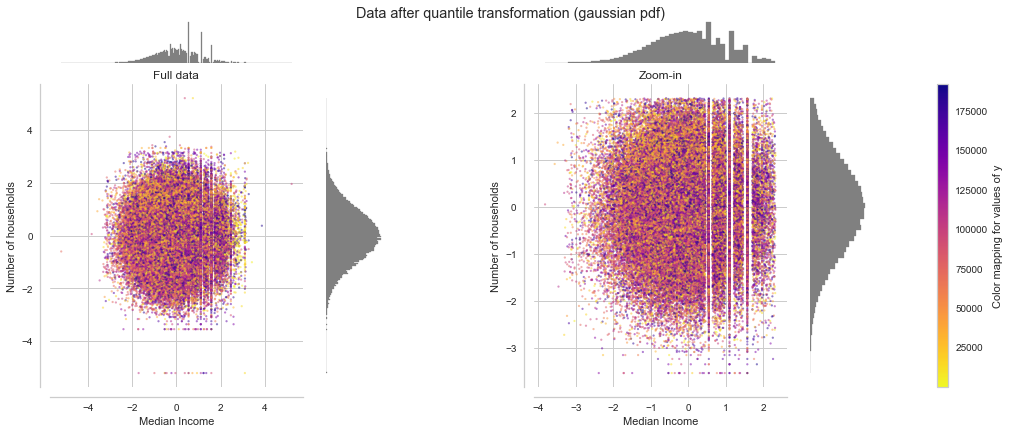

In [40]:
make_plot(5)

In [41]:
#from sklearn.preprocessing import MinMaxScaler   #fazer com o outro  ROBUSTSCALER E DEPOIS OUTLIERS
scaler = QuantileTransformer(output_distribution='normal')
std_data[numeric_data] = pd.DataFrame(scaler.fit_transform(std_data[numeric_data]), columns = numeric_data)
std_data

AGE  HOMEOWNR   NUMCHLD    INCOME    GENDER       HIT  MAJOR  \
0      0.333524         0 -5.199338 -0.003764 -5.199338 -5.199338      0   
1     -0.941700         1  1.340200  1.171890  0.651824  1.593219      0   
2     -0.012546         0 -5.199338 -0.592444  0.651824  0.512061      0   
3      0.684763         0 -5.199338 -5.199338 -5.199338  0.512061      0   
4      1.176890         1  1.340200 -0.592444 -5.199338  3.043713      0   
...         ...       ...       ...       ...       ...       ...    ...   
92895 -0.012546         0 -5.199338 -0.003764  0.651824 -5.199338      0   
92896 -0.835558         1  1.340200  5.199338  0.651824  0.312376      0   
92897 -0.012546         0 -5.199338 -0.003764  0.651824 -5.199338      0   
92898 -0.397918         1 -5.199338  5.199338 -5.199338 -5.199338      0   
92899  1.346386         0 -5.199338  0.695908 -5.199338  0.653377      1   

       COLLECT1  VETERANS  BIBLE  CATLG  HOMEE  PETS  CDPLAY  STEREO  \
0             0         0      0      0      0     0       0       0   
1             0         0      0      0      0     0       0       0   
2             0         0      0      0      0     0       0       0   
3             0         0      0      0      0     0       0       0   
4             0         0      1      1      0     0       0       1   
...         ...       ...    ...    ...    ...   ...     ...     ...   
92895         0         0      0      0      0     0       0       0   
92896         0         0      0      0      0     0       0       0   
92897         0         0      0      0      0     0       0       0   
92898         0         0      0      0      0     0       0       0   
92899         0         0      0      0      0     0       0       0   

       PCOWNERS  PHOTO  CRAFTS  FISHER  GARDENIN  BOATS  WALKER  KIDSTUFF  \
0             0      0       0       0         0      0       0         0   
1             0      0       0       0         0      0       0         0   
2             0      0       0       0         0      0       0         0   
3             0      0       0       0         0      0       0         0   
4             0      0       1       0         1      0       1         0   
...         ...    ...     ...     ...       ...    ...     ...       ...   
92895         0      0       0       0         0      0       0         0   
92896         0      0       0       0         0      0       0         0   
92897         0      0       0       0         0      0       0         0   
92898         0      0       0       0         0      0       0         0   
92899         0      0       0       0         0      0       0         0   

       CARDS  PLATES  PEPSTRFL    POP903   POP90C1   POP90C2   POP90C3  \
0          0       0         1 -0.924252 -5.199338  0.997920  0.731515   
1          0       0         0  0.537014  5.199338 -5.199338 -5.199338   
2          0       0         1  1.362532 -5.199338  0.869846  0.895780   
3          0       0         1 -1.634747 -5.199338  0.910873  0.844485   
4          1       0         0  0.292676  5.199338 -5.199338 -5.199338   
...      ...     ...       ...       ...       ...       ...       ...   
92895      0       0         0  2.171803  5.199338 -5.199338 -5.199338   
92896      0       0         0 -0.769761 -0.114415 -5.199338  0.307111   
92897      0       0         1 -1.721914  5.199338 -5.199338 -5.199338   
92898      0       0         1 -0.200818  5.199338 -5.199338 -5.199338   
92899      0       0         1  0.788455  5.199338 -5.199338 -5.199338   

        POP90C5      ETH1      ETH3      ETH7     CHIL2     CHIL3     AGEC1  \
0      0.743040 -0.121995 -5.199338 -5.199338  0.771450  1.371657 -0.147316   
1     -0.565738 -1.159515 -5.199338  1.761948  1.780005 -0.018820  0.387078   
2     -0.067799  0.345485 -5.199338 -5.199338  0.208505  0.965420  0.387078   
3     -2.013671 -1.292465 -5.199338  1.761948 -0.953493 -0.266584  0.844485   
4      1.057485 -2.408550

In [42]:
std_data.set_index(['CONTROLN'],inplace=True) #unique number 

#meter no df_ depois dos outliers tambem
std_data

AGE  HOMEOWNR   NUMCHLD    INCOME    GENDER       HIT  MAJOR  \
CONTROLN                                                                      
95515     0.333524         0 -5.199338 -0.003764 -5.199338 -5.199338      0   
148535   -0.941700         1  1.340200  1.171890  0.651824  1.593219      0   
15078    -0.012546         0 -5.199338 -0.592444  0.651824  0.512061      0   
172556    0.684763         0 -5.199338 -5.199338 -5.199338  0.512061      0   
7112      1.176890         1  1.340200 -0.592444 -5.199338  3.043713      0   
...            ...       ...       ...       ...       ...       ...    ...   
184568   -0.012546         0 -5.199338 -0.003764  0.651824 -5.199338      0   
122706   -0.835558         1  1.340200  5.199338  0.651824  0.312376      0   
189641   -0.012546         0 -5.199338 -0.003764  0.651824 -5.199338      0   
4693     -0.397918         1 -5.199338  5.199338 -5.199338 -5.199338      0   
185114    1.346386         0 -5.199338  0.695908 -5.199338  0.653377      1   

          COLLECT1  VETERANS  BIBLE  CATLG  HOMEE  PETS  CDPLAY  STEREO  \
CONTROLN                                                                  
95515            0         0      0      0      0     0       0       0   
148535           0         0      0      0      0     0       0       0   
15078            0         0      0      0      0     0       0       0   
172556           0         0      0      0      0     0       0       0   
7112             0         0      1      1      0     0       0       1   
...            ...       ...    ...    ...    ...   ...     ...     ...   
184568           0         0      0      0      0     0       0       0   
122706           0         0      0      0      0     0       0       0   
189641           0         0      0      0      0     0       0       0   
4693             0         0      0      0      0     0       0       0   
185114           0         0      0      0      0     0       0       0   

          PCOWNERS  PHOTO  CRAFTS  FISHER  GARDENIN  BOATS  WALKER  KIDSTUFF  \
CONTROLN                                                                       
95515            0      0       0       0         0      0       0         0   
148535           0      0       0       0         0      0       0         0   
15078            0      0       0       0         0      0       0         0   
172556           0      0       0       0         0      0       0         0   
7112             0      0       1       0         1      0       1         0   
...            ...    ...     ...     ...       ...    ...     ...       ...   
184568           0      0       0       0         0      0       0         0   
122706           0      0       0       0         0      0       0         0   
189641           0      0       0       0         0      0       0         0   
4693             0      0       0       0         0      0       0         0   
185114           0      0       0       0         0      0       0         0   

          CARDS  PLATES  PEPSTRFL    POP903   POP90C1   POP90C2   POP90C3  \
CONTROLN                                                                    
95515         0       0         1 -0.924252 -5.199338  0.997920  0.731515   
148535        0       0         0  0.537014  5.199338 -5.199338 -5.199338   
15078         0       0         1  1.362532 -5.199338  0.869846  0.895780   
172556        0       0         1 -1.634747 -5.199338  0.910873  0.844485   
7112          1       0         0  0.292676  5.199338 -5.199338 -5.199338   
...         ...     ...       ...       ...       ...       ...       ...   
184568        0       0         0  2.171803  5.199338 -5.199338 -5.199338   
122706        0       0         0 -0.769761 -0.114415 -5.199338  0.307111   
189641        0       0         1 -1.721914  5.199338 -5.199338 -5.199338   
4693          0       0         1 -0.200818  5.199338 -5.199338 -5.199338   
185114        0       0         1  0.788455  5

In [43]:
std_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92900 entries, 95515 to 185114
Data columns (total 210 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE           92900 non-null  float64
 1   HOMEOWNR      92900 non-null  int64  
 2   NUMCHLD       92900 non-null  float64
 3   INCOME        92900 non-null  float64
 4   GENDER        92900 non-null  float64
 5   HIT           92900 non-null  float64
 6   MAJOR         92900 non-null  int64  
 7   COLLECT1      92900 non-null  int64  
 8   VETERANS      92900 non-null  int64  
 9   BIBLE         92900 non-null  int64  
 10  CATLG         92900 non-null  int64  
 11  HOMEE         92900 non-null  int64  
 12  PETS          92900 non-null  int64  
 13  CDPLAY        92900 non-null  int64  
 14  STEREO        92900 non-null  int64  
 15  PCOWNERS      92900 non-null  int64  
 16  PHOTO         92900 non-null  int64  
 17  CRAFTS        92900 non-null  int64  
 18  FISHER        92900 

In [46]:
std_data.shape[0]/data.shape[0] 

0.9736720747914308

In [47]:
std_data.describe(include='all')

AGE      HOMEOWNR       NUMCHLD        INCOME        GENDER  \
count  92900.000000  92900.000000  92900.000000  92900.000000  92900.000000   
mean       0.021206      0.554241     -4.304971     -0.059496     -2.260035   
std        1.074410      0.497052      2.303444      2.246185      3.320646   
min       -5.199338      0.000000     -5.199338     -5.199338     -5.199338   
25%       -0.678433      0.000000     -5.199338     -0.592444     -5.199338   
50%       -0.012546      1.000000     -5.199338     -0.003764     -5.199338   
75%        0.684763      1.000000     -5.199338      0.695908      0.651824   
max        5.199338      1.000000      5.199338      5.199338      5.199338   

                HIT         MAJOR      COLLECT1      VETERANS         BIBLE  \
count  92900.000000  92900.000000  92900.000000  92900.000000  92900.000000   
mean      -2.618202      0.002885      0.055113      0.110097      0.093800   
std        3.049658      0.053633      0.228202      0.313012      0.291552   
min       -5.199338      0.000000      0.000000      0.000000      0.000000   
25%       -5.199338      0.000000      0.000000      0.000000      0.000000   
50%       -5.199338      0.000000      0.000000      0.000000      0.000000   
75%        0.653377      0.000000      0.000000      0.000000      0.000000   
max        5.199338      1.000000      1.000000      1.000000      1.000000   

              CATLG         HOMEE          PETS        CDPLAY        STEREO  \
count  92900.000000  92900.000000  92900.000000  92900.000000  92900.000000   
mean       0.083165      0.009322      0.151647      0.129569      0.135091   
std        0.276132      0.096099      0.358680      0.335831      0.341823   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           PCOWNERS         PHOTO        CRAFTS        FISHER      GARDENIN  \
count  92900.000000  92900.000000  92900.000000  92900.000000  92900.000000   
mean       0.110872      0.050560      0.086577      0.075544      0.142078   
std        0.313975      0.219098      0.281216      0.264268      0.349131   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              BOATS        WALKER      KIDSTUFF         CARDS        PLATES  \
count  92900.000000  92900.000000  92900.000000  92900.000000  92900.000000   
mean       0.021421      0.110926      0.016319      0.010969      0.005910   
std        0.144783      0.314042      0.126698      0.104157      0.076647   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           PEPSTRFL        POP903       POP90C1       POP90C2       POP90C3  \
count  92900.000000  92900.000000  92900.000000  92900.000000  92900.000000   
mean       0.473068     -0.000475      0.849816     -3.667195     -1.979308   
std        0.499277      1.001115      4.859521      3.171593      4.123998   
min        0.000000     -5.199338     -5.199338     -5.199338     -5.199338   
25%        0.000000     -0.672129     -5.199338     -5.199338

<a class="anchor" id="out_remove">
    
<font size="6"><span style='color: LightSkyBlue'> **2.9. Outlier Removal**  </span></font>
    
</a>



In [49]:
bools,numeric_data,categorical_data = update_dtypes(std_data)

std_data[numeric_data]

AGE   NUMCHLD    INCOME    GENDER       HIT    POP903  \
CONTROLN                                                               
95515     0.333524 -5.199338 -0.003764 -5.199338 -5.199338 -0.924252   
148535   -0.941700  1.340200  1.171890  0.651824  1.593219  0.537014   
15078    -0.012546 -5.199338 -0.592444  0.651824  0.512061  1.362532   
172556    0.684763 -5.199338 -5.199338 -5.199338  0.512061 -1.634747   
7112      1.176890  1.340200 -0.592444 -5.199338  3.043713  0.292676   
...            ...       ...       ...       ...       ...       ...   
184568   -0.012546 -5.199338 -0.003764  0.651824 -5.199338  2.171803   
122706   -0.835558  1.340200  5.199338  0.651824  0.312376 -0.769761   
189641   -0.012546 -5.199338 -0.003764  0.651824 -5.199338 -1.721914   
4693     -0.397918 -5.199338  5.199338 -5.199338 -5.199338 -0.200818   
185114    1.346386 -5.199338  0.695908 -5.199338  0.653377  0.788455   

           POP90C1   POP90C2   POP90C3   POP90C5      ETH1      ETH3  \
CONTROLN                                                               
95515    -5.199338  0.997920  0.731515  0.743040 -0.121995 -5.199338   
148535    5.199338 -5.199338 -5.199338 -0.565738 -1.159515 -5.199338   
15078    -5.199338  0.869846  0.895780 -0.067799  0.345485 -5.199338   
172556   -5.199338  0.910873  0.844485 -2.013671 -1.292465 -5.199338   
7112      5.199338 -5.199338 -5.199338  1.057485 -2.408550 -5.199338   
...            ...       ...       ...       ...       ...       ...   
184568    5.199338 -5.199338 -5.199338 -0.565738 -0.844485  2.096521   
122706   -0.114415 -5.199338  0.307111 -1.075207 -0.203379 -5.199338   
189641    5.199338 -5.199338 -5.199338 -1.817968 -0.697507 -5.199338   
4693      5.199338 -5.199338 -5.199338  0.743040 -0.121995  0.769761   
185114    5.199338 -5.199338 -5.199338  0.369558 -0.517790 -5.199338   

              ETH7     CHIL2     CHIL3     AGEC1     AGEC2     AGEC3  \
CONTROLN                                                               
95515    -5.199338  0.771450  1.371657 -0.147316 -1.244778 -0.546700   
148535    1.761948  1.780005 -0.018820  0.387078 -1.244778  1.817968   
15078    -5.199338  0.208505  0.965420  0.387078 -0.301855 -0.308427   
172556    1.761948 -0.953493 -0.266584  0.844485  0.487893 -0.774833   
7112     -5.199338  1.040090  0.490721  0.630254 -0.124523 -1.525529   
...            ...       ...       ...       ...       ...       ...   
184568   -5.199338 -0.543789 -0.738089  1.027247  1.202347  0.849874   
122706   -5.199338  0.771450  0.965420 -0.716839 -0.483658  2.877846   
189641   -5.199338 -0.311059 -0.965420  0.387078  1.494155  0.147316   
4693      1.204935  0.208505  0.236799  0.125788 -0.124523  0.147316   
185114   -5.199338 -0.543789  0.490721 -1.002056  0.204660  1.365257   

             AGEC4     AGEC5    CHILC1    CHILC2    CHILC3    CHILC4  \
CONTROLN                                                               
95515     0.805692  0.330873 -1.114032 -1.780005  0.553999  1.446104   
148535    1.902873 -0.519225 -1.401177 -0.077862  1.197193  0.571638   
15078     0.555462  0.330873 -0.177827 -0.851675 -0.700711  0.571638   
172556    0.805692  0.032625  0.933910  0.297918 -0.700711 -1.533612   
7112      0.280911  1.865852 -0.805692 -0.472407  0.553999 -0.334851   
...            ...       ...       ...       ...       ...       ...   
184568    0.280911 -1.029375  0.933910  0.642543 -0.419741 -0.601439   
122706    0.805692 -1.283836 -1.679303 -0.077862  0.882739  0.879040   
189641   -1.378114 -0.774833  1.111702  0.297918 -0.108103 -0.046436   
4693      1.025123  0.032625 -0.805692 -0.077862  0.553999 -0.046436   
185114    0.805692  0.032625  0.099274  0.642543 -0.108103 -0.046436   

            CHILC5      HHN2      HHN6     MARR2     MARR3     MARR4  \
CONTROLN                                                               
95515     0.905189 -0.087933  0.412900 -0.882739  1.144896 -0.434861   
148535    0.020074 -1.831224  1.497997 -1.873053 -1

<a class="anchor" id="out_iqr">
    
<font size="4"><span style='color: PowderBlue'> **2.9.1 IQR**  </span></font>
    
</a>


In [51]:
df_outliers2 = std_data[numeric_data].copy()

q25 = df_outliers2.quantile(.25)
q75 = df_outliers2.quantile(.75)
iqr = (q75 - q25) * 2.5

upper_lim = q75 + 7 * iqr
lower_lim = q25 - 7 * iqr

filters = []
for metric in std_data[numeric_data]:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters.append(df_outliers2[metric].between(llim, ulim, inclusive=True))

df_outliers3 = df_outliers2[np.all(filters, 0)]
print('Percentage of data kept after removing outliers:', np.round(df_outliers3.shape[0] / data.shape[0], 4))

#too much data lost

Percentage of data kept after removing outliers: 0.1855


<a class="anchor" id="z_scores">
    
<font size="4"><span style='color: PowderBlue'> **2.9.2. Z-scores**  </span></font>
    
</a>


In [53]:
z_scores = stats.zscore(df_outliers2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 4.7).all(axis=1)
new_df = df_outliers2[filtered_entries]

print('Percentage of data kept after removing outliers:', np.round(new_df.shape[0] / data.shape[0], 4))

new_df

Percentage of data kept after removing outliers: 0.9022


AGE   NUMCHLD    INCOME    GENDER       HIT    POP903  \
CONTROLN                                                               
95515     0.333524 -5.199338 -0.003764 -5.199338 -5.199338 -0.924252   
148535   -0.941700  1.340200  1.171890  0.651824  1.593219  0.537014   
15078    -0.012546 -5.199338 -0.592444  0.651824  0.512061  1.362532   
172556    0.684763 -5.199338 -5.199338 -5.199338  0.512061 -1.634747   
7112      1.176890  1.340200 -0.592444 -5.199338  3.043713  0.292676   
...            ...       ...       ...       ...       ...       ...   
184568   -0.012546 -5.199338 -0.003764  0.651824 -5.199338  2.171803   
122706   -0.835558  1.340200  5.199338  0.651824  0.312376 -0.769761   
189641   -0.012546 -5.199338 -0.003764  0.651824 -5.199338 -1.721914   
4693     -0.397918 -5.199338  5.199338 -5.199338 -5.199338 -0.200818   
185114    1.346386 -5.199338  0.695908 -5.199338  0.653377  0.788455   

           POP90C1   POP90C2   POP90C3   POP90C5      ETH1      ETH3  \
CONTROLN                                                               
95515    -5.199338  0.997920  0.731515  0.743040 -0.121995 -5.199338   
148535    5.199338 -5.199338 -5.199338 -0.565738 -1.159515 -5.199338   
15078    -5.199338  0.869846  0.895780 -0.067799  0.345485 -5.199338   
172556   -5.199338  0.910873  0.844485 -2.013671 -1.292465 -5.199338   
7112      5.199338 -5.199338 -5.199338  1.057485 -2.408550 -5.199338   
...            ...       ...       ...       ...       ...       ...   
184568    5.199338 -5.199338 -5.199338 -0.565738 -0.844485  2.096521   
122706   -0.114415 -5.199338  0.307111 -1.075207 -0.203379 -5.199338   
189641    5.199338 -5.199338 -5.199338 -1.817968 -0.697507 -5.199338   
4693      5.199338 -5.199338 -5.199338  0.743040 -0.121995  0.769761   
185114    5.199338 -5.199338 -5.199338  0.369558 -0.517790 -5.199338   

              ETH7     CHIL2     CHIL3     AGEC1     AGEC2     AGEC3  \
CONTROLN                                                               
95515    -5.199338  0.771450  1.371657 -0.147316 -1.244778 -0.546700   
148535    1.761948  1.780005 -0.018820  0.387078 -1.244778  1.817968   
15078    -5.199338  0.208505  0.965420  0.387078 -0.301855 -0.308427   
172556    1.761948 -0.953493 -0.266584  0.844485  0.487893 -0.774833   
7112     -5.199338  1.040090  0.490721  0.630254 -0.124523 -1.525529   
...            ...       ...       ...       ...       ...       ...   
184568   -5.199338 -0.543789 -0.738089  1.027247  1.202347  0.849874   
122706   -5.199338  0.771450  0.965420 -0.716839 -0.483658  2.877846   
189641   -5.199338 -0.311059 -0.965420  0.387078  1.494155  0.147316   
4693      1.204935  0.208505  0.236799  0.125788 -0.124523  0.147316   
185114   -5.199338 -0.543789  0.490721 -1.002056  0.204660  1.365257   

             AGEC4     AGEC5    CHILC1    CHILC2    CHILC3    CHILC4  \
CONTROLN                                                               
95515     0.805692  0.330873 -1.114032 -1.780005  0.553999  1.446104   
148535    1.902873 -0.519225 -1.401177 -0.077862  1.197193  0.571638   
15078     0.555462  0.330873 -0.177827 -0.851675 -0.700711  0.571638   
172556    0.805692  0.032625  0.933910  0.297918 -0.700711 -1.533612   
7112      0.280911  1.865852 -0.805692 -0.472407  0.553999 -0.334851   
...            ...       ...       ...       ...       ...       ...   
184568    0.280911 -1.029375  0.933910  0.642543 -0.419741 -0.601439   
122706    0.805692 -1.283836 -1.679303 -0.077862  0.882739  0.879040   
189641   -1.378114 -0.774833  1.111702  0.297918 -0.108103 -0.046436   
4693      1.025123  0.032625 -0.805692 -0.077862  0.553999 -0.046436   
185114    0.805692  0.032625  0.099274  0.642543 -0.108103 -0.046436   

            CHILC5      HHN2      HHN6     MARR2     MARR3     MARR4  \
CONTROLN                                                               
95515     0.905189 -0.087933  0.412900 -0.882739  1.144896 -0.434861   
148535    0.020074 -1.831224  1.497997 -1.873053 -1

In [54]:
df_outliers2[filtered_entries == False]

AGE   NUMCHLD    INCOME    GENDER       HIT    POP903  \
CONTROLN                                                               
190166   -0.012546 -5.199338 -0.003764  5.199338 -5.199338  0.214920   
190313   -0.012546 -5.199338 -0.003764  0.651824 -5.199338  0.103057   
144833    5.199338 -5.199338  0.695908 -5.199338  0.939747  1.143930   
1361     -0.631785 -5.199338  0.695908 -5.199338  1.095556 -1.602210   
721      -0.012546 -5.199338 -0.003764 -5.199338 -5.199338  2.250629   
...            ...       ...       ...       ...       ...       ...   
2855      0.366873 -5.199338 -0.003764 -5.199338 -5.199338 -0.468203   
189289    0.957454 -5.199338  1.171890  0.651824  1.236652  0.007527   
22322     5.199338 -5.199338 -0.592444 -5.199338 -5.199338 -0.153219   
174319    5.199338 -5.199338  0.695908 -5.199338  0.312376  1.386650   
147035   -0.012546 -5.199338 -0.003764  0.651824 -5.199338 -3.238595   

           POP90C1   POP90C2   POP90C3   POP90C5      ETH1      ETH3  \
CONTROLN                                                               
190166   -0.273089 -5.199338  0.734798 -0.067799 -0.203379 -5.199338   
190313    5.199338 -5.199338 -5.199338 -0.067799  0.070314 -5.199338   
144833    5.199338 -5.199338 -5.199338  1.057485 -1.135284 -5.199338   
1361      5.199338 -5.199338 -5.199338 -1.075207  5.199338 -5.199338   
721       5.199338 -5.199338 -5.199338 -0.067799 -1.664082  0.769761   
...            ...       ...       ...       ...       ...       ...   
2855      5.199338 -5.199338 -5.199338 -0.565738 -1.312981  0.769761   
189289    5.199338 -5.199338 -5.199338  0.369558  0.070314 -5.199338   
22322     5.199338 -5.199338 -5.199338  0.743040  0.800496 -5.199338   
174319    5.199338 -5.199338 -5.199338  1.324958 -0.567211  0.769761   
147035   -5.199338 -5.199338 -5.199338 -0.565738  5.199338 -5.199338   

              ETH7     CHIL2     CHIL3     AGEC1     AGEC2     AGEC3  \
CONTROLN                                                               
190166   -5.199338 -1.132898  0.734798 -0.716839  0.045180 -0.546700   
190313   -5.199338 -0.543789 -0.965420 -1.002056  1.494155  1.926403   
144833    2.651732 -1.132898  2.183092 -0.430727 -0.483658  0.147316   
1361     -5.199338  0.771450 -0.738089  0.125788 -0.124523 -0.308427   
721       1.204935 -0.311059 -0.266584  0.844485  0.619578  0.147316   
...            ...       ...       ...       ...       ...       ...   
2855      1.204935 -0.311059 -0.266584  0.844485  0.744694 -0.308427   
189289   -5.199338 -0.543789  1.371657  0.125788  0.045180 -0.072829   
22322    -5.199338 -0.057742 -0.504922 -0.716839 -0.816150  0.147316   
174319    1.204935 -0.953493 -0.965420  0.630254  0.744694 -0.774833   
147035   -5.199338 -5.199338 -5.199338  2.669006 -5.199338  0.849874   

             AGEC4     AGEC5    CHILC1    CHILC2    CHILC3    CHILC4  \
CONTROLN                                                               
190166   -0.003764  1.865852  0.548158  0.297918 -0.700711 -0.334851   
190313    0.280911 -1.541796  0.548158  1.545927 -0.419741 -0.334851   
144833    1.579968  0.616541 -0.805692 -1.513589 -1.533612  1.694923   
1361      0.805692  0.330873 -1.401177  0.963423  0.553999  0.571638   
721      -0.288750  0.032625  0.334851  0.642543 -0.419741 -0.334851   
...            ...       ...       ...       ...       ...       ...   
2855     -0.003764  0.616541  0.748009 -0.077862 -0.419741  0.258792   
189289    0.555462  0.616541  0.099274 -0.851675 -1.171890 -0.046436   
22322     0.555462  0.330873  0.099274  0.963423 -0.419741  0.258792   
174319   -1.114032 -1.029375  1.278137  0.963423 -0.700711 -1.321946   
147035   -5.199338 -5.199338 -5.199338 -5.199338 -5.199338 -5.199338   

            CHILC5      HHN2      HHN6     MARR2     MARR3     MARR4  \
CONTROLN                                                               
190166    0.336178  1.798663 -0.580524 -0.589456 -1.169401 -0.901416   
190313   -1.231280 -1.588771  1.016672 -1.509656 -2

<a class="anchor" id="out_pca">
    
<font size="4"><span style='color: PowderBlue '> **2.9.3. Using PCA**  </span></font>
    
</a>


In [55]:
df_pca1 = std_data[numeric_data].copy()
df_pca1

AGE   NUMCHLD    INCOME    GENDER       HIT    POP903  \
CONTROLN                                                               
95515     0.333524 -5.199338 -0.003764 -5.199338 -5.199338 -0.924252   
148535   -0.941700  1.340200  1.171890  0.651824  1.593219  0.537014   
15078    -0.012546 -5.199338 -0.592444  0.651824  0.512061  1.362532   
172556    0.684763 -5.199338 -5.199338 -5.199338  0.512061 -1.634747   
7112      1.176890  1.340200 -0.592444 -5.199338  3.043713  0.292676   
...            ...       ...       ...       ...       ...       ...   
184568   -0.012546 -5.199338 -0.003764  0.651824 -5.199338  2.171803   
122706   -0.835558  1.340200  5.199338  0.651824  0.312376 -0.769761   
189641   -0.012546 -5.199338 -0.003764  0.651824 -5.199338 -1.721914   
4693     -0.397918 -5.199338  5.199338 -5.199338 -5.199338 -0.200818   
185114    1.346386 -5.199338  0.695908 -5.199338  0.653377  0.788455   

           POP90C1   POP90C2   POP90C3   POP90C5      ETH1      ETH3  \
CONTROLN                                                               
95515    -5.199338  0.997920  0.731515  0.743040 -0.121995 -5.199338   
148535    5.199338 -5.199338 -5.199338 -0.565738 -1.159515 -5.199338   
15078    -5.199338  0.869846  0.895780 -0.067799  0.345485 -5.199338   
172556   -5.199338  0.910873  0.844485 -2.013671 -1.292465 -5.199338   
7112      5.199338 -5.199338 -5.199338  1.057485 -2.408550 -5.199338   
...            ...       ...       ...       ...       ...       ...   
184568    5.199338 -5.199338 -5.199338 -0.565738 -0.844485  2.096521   
122706   -0.114415 -5.199338  0.307111 -1.075207 -0.203379 -5.199338   
189641    5.199338 -5.199338 -5.199338 -1.817968 -0.697507 -5.199338   
4693      5.199338 -5.199338 -5.199338  0.743040 -0.121995  0.769761   
185114    5.199338 -5.199338 -5.199338  0.369558 -0.517790 -5.199338   

              ETH7     CHIL2     CHIL3     AGEC1     AGEC2     AGEC3  \
CONTROLN                                                               
95515    -5.199338  0.771450  1.371657 -0.147316 -1.244778 -0.546700   
148535    1.761948  1.780005 -0.018820  0.387078 -1.244778  1.817968   
15078    -5.199338  0.208505  0.965420  0.387078 -0.301855 -0.308427   
172556    1.761948 -0.953493 -0.266584  0.844485  0.487893 -0.774833   
7112     -5.199338  1.040090  0.490721  0.630254 -0.124523 -1.525529   
...            ...       ...       ...       ...       ...       ...   
184568   -5.199338 -0.543789 -0.738089  1.027247  1.202347  0.849874   
122706   -5.199338  0.771450  0.965420 -0.716839 -0.483658  2.877846   
189641   -5.199338 -0.311059 -0.965420  0.387078  1.494155  0.147316   
4693      1.204935  0.208505  0.236799  0.125788 -0.124523  0.147316   
185114   -5.199338 -0.543789  0.490721 -1.002056  0.204660  1.365257   

             AGEC4     AGEC5    CHILC1    CHILC2    CHILC3    CHILC4  \
CONTROLN                                                               
95515     0.805692  0.330873 -1.114032 -1.780005  0.553999  1.446104   
148535    1.902873 -0.519225 -1.401177 -0.077862  1.197193  0.571638   
15078     0.555462  0.330873 -0.177827 -0.851675 -0.700711  0.571638   
172556    0.805692  0.032625  0.933910  0.297918 -0.700711 -1.533612   
7112      0.280911  1.865852 -0.805692 -0.472407  0.553999 -0.334851   
...            ...       ...       ...       ...       ...       ...   
184568    0.280911 -1.029375  0.933910  0.642543 -0.419741 -0.601439   
122706    0.805692 -1.283836 -1.679303 -0.077862  0.882739  0.879040   
189641   -1.378114 -0.774833  1.111702  0.297918 -0.108103 -0.046436   
4693      1.025123  0.032625 -0.805692 -0.077862  0.553999 -0.046436   
185114    0.805692  0.032625  0.099274  0.642543 -0.108103 -0.046436   

            CHILC5      HHN2      HHN6     MARR2     MARR3     MARR4  \
CONTROLN                                                               
95515     0.905189 -0.087933  0.412900 -0.882739  1.144896 -0.434861   
148535    0.020074 -1.831224  1.497997 -1.873053 -1

In [56]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_pca1)
pca_feat  

array([[ 5.45794723e+00, -2.47421751e+00,  3.55908751e+00, ...,
        -2.24523333e-01,  1.83892903e-01,  6.39310152e-02],
       [-1.44323033e+01, -1.40267338e+01,  1.36302084e+00, ...,
        -3.60319139e-02, -1.41610351e-01,  3.10374328e-01],
       [ 1.67445163e+01,  2.93916772e+00,  2.29083517e-01, ...,
        -5.75357557e-02, -1.44031895e-01,  5.46269790e-02],
       ...,
       [-7.91814454e+00,  6.49102514e+00,  7.66014492e+00, ...,
         4.37317179e-01, -2.67052574e-03,  5.72564476e-02],
       [-1.20500798e+01, -5.56844706e+00, -6.07608402e-01, ...,
        -4.47216261e-01,  1.80749788e-01,  2.03066044e-01],
       [-2.96520550e+00, -1.18055481e+01, -1.24883769e+00, ...,
         1.75969795e-01, -1.40138752e-01,  6.83164104e-02]])

In [57]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

Eigenvalue  Difference  Proportion  Cumulative
1     94.981234    0.000000    0.140954    0.140954
2     45.088233  -49.893002    0.066912    0.207866
3     32.458846  -12.629386    0.048170    0.256036
4     24.952313   -7.506533    0.037030    0.293066
5     18.262075   -6.690238    0.027101    0.320167
6     16.083803   -2.178272    0.023869    0.344036
7     14.972961   -1.110842    0.022220    0.366256
8     14.737623   -0.235338    0.021871    0.388127
9     13.978420   -0.759204    0.020744    0.408872
10    11.724209   -2.254211    0.017399    0.426271
11    10.982168   -0.742040    0.016298    0.442568
12    10.864509   -0.117660    0.016123    0.458692
13    10.222264   -0.642244    0.015170    0.473862
14     9.269777   -0.952487    0.013757    0.487618
15     8.807169   -0.462608    0.013070    0.500688
16     8.370972   -0.436197    0.012423    0.513111
17     7.962625   -0.408347    0.011817    0.524928
18     7.786998   -0.175627    0.011556    0.536484
19     7.570476   -0.216521    0.011235    0.547718
20     7.459774   -0.110702    0.011070    0.558789
21     7.063581   -0.396194    0.010483    0.569271
22     6.901544   -0.162037    0.010242    0.579514
23     6.843709   -0.057835    0.010156    0.589670
24     6.535749   -0.307961    0.009699    0.599369
25     6.431871   -0.103878    0.009545    0.608914
26     6.372931   -0.058940    0.009458    0.618372
27     6.120424   -0.252507    0.009083    0.627454
28     5.853485   -0.266939    0.008687    0.636141
29     5.747480   -0.106005    0.008529    0.644671
30     5.686434   -0.061045    0.008439    0.653109
31     5.579893   -0.106541    0.008281    0.661390
32     5.455887   -0.124006    0.008097    0.669487
33     5.166017   -0.289870    0.007666    0.677153
34     5.060670   -0.105347    0.007510    0.684663
35     4.993991   -0.066679    0.007411    0.692075
36     4.935069   -0.058922    0.007324    0.699398
37     4.850111   -0.084957    0.007198    0.706596
38     4.627892   -0.222219    0.006868    0.713464
39     4.581725   -0.046167    0.006799    0.720263
40     4.508978   -0.072748    0.006691    0.726955
41     4.426742   -0.082235    0.006569    0.733524
42     4.346404   -0.080338    0.006450    0.739974
43     4.300173   -0.046231    0.006382    0.746356
44     4.169848   -0.130325    0.006188    0.752544
45     4.079806   -0.090042    0.006055    0.758599
46     3.998196   -0.081610    0.005933    0.764532
47     3.926529   -0.071667    0.005827    0.770359
48     3.904911   -0.021617    0.005795    0.776154
49     3.850727   -0.054184    0.005715    0.781869
50     3.739281   -0.111446    0.005549    0.787418
51     3.675470   -0.063811    0.005454    0.792872
52     3.604604   -0.070867    0.005349    0.798222
53     3.468061   -0.136543    0.005147    0.803368
54     3.441281   -0.026780    0.005107    0.808475
55     3.313896   -0.127385    0.004918    0.813393
56     3.260323   -0.053573    0.004838    0.818231
57     3.151218   -0.109106    0.004676    0.822908
58     3.054318   -0.096899    0.004533    0.827441
59     2.987003   -0.067316    0.004433    0.831873
60     2.970399   -0.016604    0.004408    0.836282
61     2.902596   -0.067803    0.004308    0.840589
62     2.813121   -0.089475    0.004175    0.844764
63     2.754807   -0.058313    0.004088    0.848852
64     2.700439   -0.054368    0.004008    0.852860
65     2.641121   -0.059318    0.003919    0.856779
66     2.616391   -0.024729    0.003883    0.860662
67     2.504518   -0.111873    0.003717    0.864379
68     2.389889   -0.114629    0.003547    0.867925
69     2.343917   -0.045972    0.003478    0.871404
70     2.301631   -0.042286    0.003416    0.874819
71     2.260199   -0.041432    0.003354    0.878174
72     2.212329   -0.047870    0.003283    0.881457
73     2.130371   -0.081958    0.003162    0.884618
74     2.032370   -0.098001    0.003016    0.887634
75     1.998526   -0.033844    0.002966    0.890600
76     1.984025   -0.014501    0.002944    0.893544
7

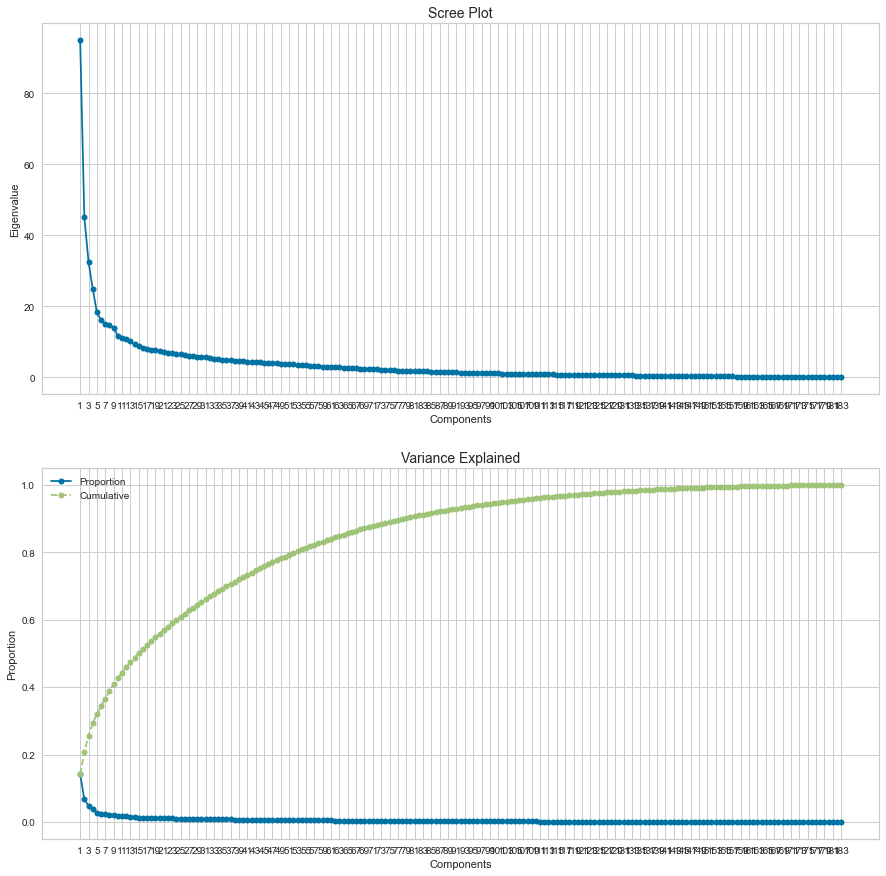

In [58]:
%matplotlib inline
# figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

#6

In [59]:
pca = PCA(n_components=12)
pca_feat = pca.fit_transform(df_pca1)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_pca1.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

PC0        PC1        PC2       PC3       PC4       PC5  \
CONTROLN                                                                  
95515      5.457947  -2.474217   3.559106  4.331955 -6.881426 -6.824093   
148535   -14.432303 -14.026738   1.363012 -5.692520  2.207280 -2.378355   
15078     16.744516   2.939176   0.229111  2.687872 -5.967778 -0.565224   
172556    10.159835   7.085930   4.416195  2.098889 -1.903873 -0.424070   
7112      -1.724430   4.262397   8.564870 -7.014046 -2.715953  2.729732   
...             ...        ...        ...       ...       ...       ...   
184568    -1.943427   1.725493 -10.155927 -5.872609  3.513707 -1.654794   
122706     2.033782  -9.610111   0.925559 -4.368111  4.052095 -1.963332   
189641    -7.918145   6.491031   7.660206 -3.406360 -4.106104 -2.143161   
4693     -12.050080  -5.568458  -0.607566 -4.050631 -6.361638 -7.392862   
185114    -2.965205 -11.805548  -1.248779 -5.408788  3.592145  2.141830   

               PC6        PC7       PC8       PC9      PC10      PC11  
CONTROLN                                                               
95515    -5.479441   1.109879 -3.579129  2.242813 -1.397686  1.703389  
148535   -3.567749   7.725611 -3.362204 -1.936633  1.826266 -3.982368  
15078    -6.191958  -0.433725 -1.430162  0.326612  3.446412  2.888069  
172556   -2.664899  17.501011  1.493045 -4.090371 -2.399057  4.516660  
7112     -2.241830  -1.020569 -4.771131  2.486121 -4.227280 -6.146695  
...            ...        ...       ...       ...       ...       ...  
184568    6.504491  -5.769022  5.057860  1.942842  2.725274  0.800942  
122706   -1.112248  -2.280001 -0.113408 -2.240009  2.656842  2.037364  
189641    0.487175  -0.778615  1.790098  0.208261  3.941121  1.757630  
4693     -2.489347   7.659515 -4.455156  9.291071 -2.088649  2.578769  
185114   -3.211940  -5.234506  1.824826  2.303861 -3.853345 -0.368227  

[92900 rows x 12 columns]

In [60]:
# Reassigning df to contain pca variables
df_pca1 = pd.concat([df_pca1, pca_df], axis=1)  #df_pca1 em vez disto se calhar devia ser df_[numerical_data] - para nao incluir a normalizacao
df_pca1.head()

AGE   NUMCHLD    INCOME    GENDER       HIT    POP903  \
CONTROLN                                                               
95515     0.333524 -5.199338 -0.003764 -5.199338 -5.199338 -0.924252   
148535   -0.941700  1.340200  1.171890  0.651824  1.593219  0.537014   
15078    -0.012546 -5.199338 -0.592444  0.651824  0.512061  1.362532   
172556    0.684763 -5.199338 -5.199338 -5.199338  0.512061 -1.634747   
7112      1.176890  1.340200 -0.592444 -5.199338  3.043713  0.292676   

           POP90C1   POP90C2   POP90C3   POP90C5      ETH1      ETH3  \
CONTROLN                                                               
95515    -5.199338  0.997920  0.731515  0.743040 -0.121995 -5.199338   
148535    5.199338 -5.199338 -5.199338 -0.565738 -1.159515 -5.199338   
15078    -5.199338  0.869846  0.895780 -0.067799  0.345485 -5.199338   
172556   -5.199338  0.910873  0.844485 -2.013671 -1.292465 -5.199338   
7112      5.199338 -5.199338 -5.199338  1.057485 -2.408550 -5.199338   

              ETH7     CHIL2     CHIL3     AGEC1     AGEC2     AGEC3  \
CONTROLN                                                               
95515    -5.199338  0.771450  1.371657 -0.147316 -1.244778 -0.546700   
148535    1.761948  1.780005 -0.018820  0.387078 -1.244778  1.817968   
15078    -5.199338  0.208505  0.965420  0.387078 -0.301855 -0.308427   
172556    1.761948 -0.953493 -0.266584  0.844485  0.487893 -0.774833   
7112     -5.199338  1.040090  0.490721  0.630254 -0.124523 -1.525529   

             AGEC4     AGEC5    CHILC1    CHILC2    CHILC3    CHILC4  \
CONTROLN                                                               
95515     0.805692  0.330873 -1.114032 -1.780005  0.553999  1.446104   
148535    1.902873 -0.519225 -1.401177 -0.077862  1.197193  0.571638   
15078     0.555462  0.330873 -0.177827 -0.851675 -0.700711  0.571638   
172556    0.805692  0.032625  0.933910  0.297918 -0.700711 -1.533612   
7112      0.280911  1.865852 -0.805692 -0.472407  0.553999 -0.334851   

            CHILC5      HHN2      HHN6     MARR2     MARR3     MARR4  \
CONTROLN                                                               
95515     0.905189 -0.087933  0.412900 -0.882739  1.144896 -0.434861   
148535    0.020074 -1.831224  1.497997 -1.873053 -1.169401  0.408805   
15078     1.149742  0.273089 -0.580524 -0.311059  0.584984 -0.434861   
172556    1.149742 -1.077446  1.371657 -0.311059 -0.139710  0.275694   
7112      1.149742 -1.212751  1.942703  1.337127  0.584984  1.236652   

               DW2       DW3       DW7       DW8       DW9       HU2  \
CONTROLN                                                               
95515     1.097845  0.336178  1.479004  1.664082 -5.199338 -0.726606   
148535    5.199338 -5.199338 -5.199338 -5.199338 -5.199338 -1.837975   
15078    -0.129582 -0.064027  1.072973  1.278137 -5.199338 -0.129582   
172556    0.513491  0.592444  0.895780 -5.199338  1.597698  1.053106   
7112      1.384628 -5.199338 -5.199338 -5.199338 -5.199338 -1.088723   

               HU4       HU5      HHD3      HHD6      HHD8      HHD9  \
CONTROLN                                                               
95515    -0.519225  0.198258  0.661162  0.235509  0.451469 -0.084155   
148535   -0.851675  0.346817  2.408550 -1.798663 -0.514923 -0.880888   
15078     0.146048  0.733156  0.253606 -0.010037  0.451469 -0.084155   
172556    0.146048  0.111890 -0.036391  0.235509  1.247505 -0.880888   
7112     -0.851675 -5.199338 -0.743040 -1.050924  1.247505  1.831224   

             HHD10     HHD12      HVP6      HUR1      RHP2      RHP3  \
CONTROLN                                                               
95515    -0.778225 -0.333524 -5.199338 -0.610484  0.839121  0.464007   
148535   -1.858747 -0.880888  2.432017 -5.199338  1.844811  2.325972   
15078    -0.270485 -0.333524 -5.199338  0.395204 -0.418371 -0.066541   
172556    1.192071  0.074087  1.123415  1.456896 -0.558392  0.464007   
7112     -0.778225 -1.606755 -5.199338 -0.144780

In [61]:
metric_features = numeric_data

def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca1[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

In [62]:
df = df_pca1.copy()
df_pca2 = pd.concat([df_pca1, std_data[categorical_data]], axis=1)   
df_pca2

AGE   NUMCHLD    INCOME    GENDER       HIT    POP903  \
CONTROLN                                                               
95515     0.333524 -5.199338 -0.003764 -5.199338 -5.199338 -0.924252   
148535   -0.941700  1.340200  1.171890  0.651824  1.593219  0.537014   
15078    -0.012546 -5.199338 -0.592444  0.651824  0.512061  1.362532   
172556    0.684763 -5.199338 -5.199338 -5.199338  0.512061 -1.634747   
7112      1.176890  1.340200 -0.592444 -5.199338  3.043713  0.292676   
...            ...       ...       ...       ...       ...       ...   
184568   -0.012546 -5.199338 -0.003764  0.651824 -5.199338  2.171803   
122706   -0.835558  1.340200  5.199338  0.651824  0.312376 -0.769761   
189641   -0.012546 -5.199338 -0.003764  0.651824 -5.199338 -1.721914   
4693     -0.397918 -5.199338  5.199338 -5.199338 -5.199338 -0.200818   
185114    1.346386 -5.199338  0.695908 -5.199338  0.653377  0.788455   

           POP90C1   POP90C2   POP90C3   POP90C5      ETH1      ETH3  \
CONTROLN                                                               
95515    -5.199338  0.997920  0.731515  0.743040 -0.121995 -5.199338   
148535    5.199338 -5.199338 -5.199338 -0.565738 -1.159515 -5.199338   
15078    -5.199338  0.869846  0.895780 -0.067799  0.345485 -5.199338   
172556   -5.199338  0.910873  0.844485 -2.013671 -1.292465 -5.199338   
7112      5.199338 -5.199338 -5.199338  1.057485 -2.408550 -5.199338   
...            ...       ...       ...       ...       ...       ...   
184568    5.199338 -5.199338 -5.199338 -0.565738 -0.844485  2.096521   
122706   -0.114415 -5.199338  0.307111 -1.075207 -0.203379 -5.199338   
189641    5.199338 -5.199338 -5.199338 -1.817968 -0.697507 -5.199338   
4693      5.199338 -5.199338 -5.199338  0.743040 -0.121995  0.769761   
185114    5.199338 -5.199338 -5.199338  0.369558 -0.517790 -5.199338   

              ETH7     CHIL2     CHIL3     AGEC1     AGEC2     AGEC3  \
CONTROLN                                                               
95515    -5.199338  0.771450  1.371657 -0.147316 -1.244778 -0.546700   
148535    1.761948  1.780005 -0.018820  0.387078 -1.244778  1.817968   
15078    -5.199338  0.208505  0.965420  0.387078 -0.301855 -0.308427   
172556    1.761948 -0.953493 -0.266584  0.844485  0.487893 -0.774833   
7112     -5.199338  1.040090  0.490721  0.630254 -0.124523 -1.525529   
...            ...       ...       ...       ...       ...       ...   
184568   -5.199338 -0.543789 -0.738089  1.027247  1.202347  0.849874   
122706   -5.199338  0.771450  0.965420 -0.716839 -0.483658  2.877846   
189641   -5.199338 -0.311059 -0.965420  0.387078  1.494155  0.147316   
4693      1.204935  0.208505  0.236799  0.125788 -0.124523  0.147316   
185114   -5.199338 -0.543789  0.490721 -1.002056  0.204660  1.365257   

             AGEC4     AGEC5    CHILC1    CHILC2    CHILC3    CHILC4  \
CONTROLN                                                               
95515     0.805692  0.330873 -1.114032 -1.780005  0.553999  1.446104   
148535    1.902873 -0.519225 -1.401177 -0.077862  1.197193  0.571638   
15078     0.555462  0.330873 -0.177827 -0.851675 -0.700711  0.571638   
172556    0.805692  0.032625  0.933910  0.297918 -0.700711 -1.533612   
7112      0.280911  1.865852 -0.805692 -0.472407  0.553999 -0.334851   
...            ...       ...       ...       ...       ...       ...   
184568    0.280911 -1.029375  0.933910  0.642543 -0.419741 -0.601439   
122706    0.805692 -1.283836 -1.679303 -0.077862  0.882739  0.879040   
189641   -1.378114 -0.774833  1.111702  0.297918 -0.108103 -0.046436   
4693      1.025123  0.032625 -0.805692 -0.077862  0.553999 -0.046436   
185114    0.805692  0.032625  0.099274  0.642543 -0.108103 -0.046436   

            CHILC5      HHN2      HHN6     MARR2     MARR3     MARR4  \
CONTROLN                                                               
95515     0.905189 -0.087933  0.412900 -0.882739  1.144896 -0.434861   
148535    0.020074 -1.831224  1.497997 -1.873053 -1

In [63]:
# Do this after checking the new pandas profiling report
#df_pca2.drop(columns=['PC11], inplace=True)

In [64]:
pc_features = df_pca2.columns[df_pca2.columns.str.startswith('PC')]#.drop(['PCOWNERS'])
df_pca2[pc_features]

PC0        PC1        PC2       PC3       PC4       PC5  \
CONTROLN                                                                  
95515      5.457947  -2.474217   3.559106  4.331955 -6.881426 -6.824093   
148535   -14.432303 -14.026738   1.363012 -5.692520  2.207280 -2.378355   
15078     16.744516   2.939176   0.229111  2.687872 -5.967778 -0.565224   
172556    10.159835   7.085930   4.416195  2.098889 -1.903873 -0.424070   
7112      -1.724430   4.262397   8.564870 -7.014046 -2.715953  2.729732   
...             ...        ...        ...       ...       ...       ...   
184568    -1.943427   1.725493 -10.155927 -5.872609  3.513707 -1.654794   
122706     2.033782  -9.610111   0.925559 -4.368111  4.052095 -1.963332   
189641    -7.918145   6.491031   7.660206 -3.406360 -4.106104 -2.143161   
4693     -12.050080  -5.568458  -0.607566 -4.050631 -6.361638 -7.392862   
185114    -2.965205 -11.805548  -1.248779 -5.408788  3.592145  2.141830   

               PC6        PC7       PC8       PC9      PC10      PC11  
CONTROLN                                                               
95515    -5.479441   1.109879 -3.579129  2.242813 -1.397686  1.703389  
148535   -3.567749   7.725611 -3.362204 -1.936633  1.826266 -3.982368  
15078    -6.191958  -0.433725 -1.430162  0.326612  3.446412  2.888069  
172556   -2.664899  17.501011  1.493045 -4.090371 -2.399057  4.516660  
7112     -2.241830  -1.020569 -4.771131  2.486121 -4.227280 -6.146695  
...            ...        ...       ...       ...       ...       ...  
184568    6.504491  -5.769022  5.057860  1.942842  2.725274  0.800942  
122706   -1.112248  -2.280001 -0.113408 -2.240009  2.656842  2.037364  
189641    0.487175  -0.778615  1.790098  0.208261  3.941121  1.757630  
4693     -2.489347   7.659515 -4.455156  9.291071 -2.088649  2.578769  
185114   -3.211940  -5.234506  1.824826  2.303861 -3.853345 -0.368227  

[92900 rows x 12 columns]

https://www.dummies.com/programming/big-data/data-science/python-for-data-science-developing-a-multivariate-approach-to-find-outliers/

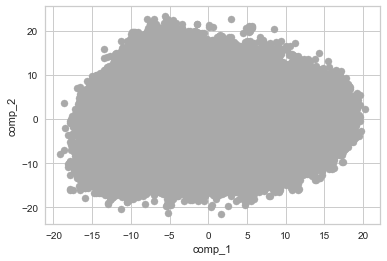

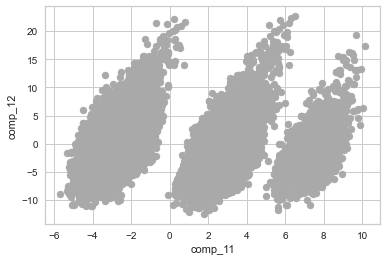

In [65]:
df9 = pd.DataFrame(pca_feat, columns=['comp_'+str(j+1) for j in range(12)])
first_two = df9.plot(kind='scatter', x='comp_1', y='comp_2', c='DarkGrey', s=50)
last_two = df9.plot(kind='scatter', x='comp_11', y='comp_12', c='DarkGrey', s=50)

nao usamos , 12x12


In [66]:
df

AGE   NUMCHLD    INCOME    GENDER       HIT    POP903  \
CONTROLN                                                               
95515     0.333524 -5.199338 -0.003764 -5.199338 -5.199338 -0.924252   
148535   -0.941700  1.340200  1.171890  0.651824  1.593219  0.537014   
15078    -0.012546 -5.199338 -0.592444  0.651824  0.512061  1.362532   
172556    0.684763 -5.199338 -5.199338 -5.199338  0.512061 -1.634747   
7112      1.176890  1.340200 -0.592444 -5.199338  3.043713  0.292676   
...            ...       ...       ...       ...       ...       ...   
184568   -0.012546 -5.199338 -0.003764  0.651824 -5.199338  2.171803   
122706   -0.835558  1.340200  5.199338  0.651824  0.312376 -0.769761   
189641   -0.012546 -5.199338 -0.003764  0.651824 -5.199338 -1.721914   
4693     -0.397918 -5.199338  5.199338 -5.199338 -5.199338 -0.200818   
185114    1.346386 -5.199338  0.695908 -5.199338  0.653377  0.788455   

           POP90C1   POP90C2   POP90C3   POP90C5      ETH1      ETH3  \
CONTROLN                                                               
95515    -5.199338  0.997920  0.731515  0.743040 -0.121995 -5.199338   
148535    5.199338 -5.199338 -5.199338 -0.565738 -1.159515 -5.199338   
15078    -5.199338  0.869846  0.895780 -0.067799  0.345485 -5.199338   
172556   -5.199338  0.910873  0.844485 -2.013671 -1.292465 -5.199338   
7112      5.199338 -5.199338 -5.199338  1.057485 -2.408550 -5.199338   
...            ...       ...       ...       ...       ...       ...   
184568    5.199338 -5.199338 -5.199338 -0.565738 -0.844485  2.096521   
122706   -0.114415 -5.199338  0.307111 -1.075207 -0.203379 -5.199338   
189641    5.199338 -5.199338 -5.199338 -1.817968 -0.697507 -5.199338   
4693      5.199338 -5.199338 -5.199338  0.743040 -0.121995  0.769761   
185114    5.199338 -5.199338 -5.199338  0.369558 -0.517790 -5.199338   

              ETH7     CHIL2     CHIL3     AGEC1     AGEC2     AGEC3  \
CONTROLN                                                               
95515    -5.199338  0.771450  1.371657 -0.147316 -1.244778 -0.546700   
148535    1.761948  1.780005 -0.018820  0.387078 -1.244778  1.817968   
15078    -5.199338  0.208505  0.965420  0.387078 -0.301855 -0.308427   
172556    1.761948 -0.953493 -0.266584  0.844485  0.487893 -0.774833   
7112     -5.199338  1.040090  0.490721  0.630254 -0.124523 -1.525529   
...            ...       ...       ...       ...       ...       ...   
184568   -5.199338 -0.543789 -0.738089  1.027247  1.202347  0.849874   
122706   -5.199338  0.771450  0.965420 -0.716839 -0.483658  2.877846   
189641   -5.199338 -0.311059 -0.965420  0.387078  1.494155  0.147316   
4693      1.204935  0.208505  0.236799  0.125788 -0.124523  0.147316   
185114   -5.199338 -0.543789  0.490721 -1.002056  0.204660  1.365257   

             AGEC4     AGEC5    CHILC1    CHILC2    CHILC3    CHILC4  \
CONTROLN                                                               
95515     0.805692  0.330873 -1.114032 -1.780005  0.553999  1.446104   
148535    1.902873 -0.519225 -1.401177 -0.077862  1.197193  0.571638   
15078     0.555462  0.330873 -0.177827 -0.851675 -0.700711  0.571638   
172556    0.805692  0.032625  0.933910  0.297918 -0.700711 -1.533612   
7112      0.280911  1.865852 -0.805692 -0.472407  0.553999 -0.334851   
...            ...       ...       ...       ...       ...       ...   
184568    0.280911 -1.029375  0.933910  0.642543 -0.419741 -0.601439   
122706    0.805692 -1.283836 -1.679303 -0.077862  0.882739  0.879040   
189641   -1.378114 -0.774833  1.111702  0.297918 -0.108103 -0.046436   
4693      1.025123  0.032625 -0.805692 -0.077862  0.553999 -0.046436   
185114    0.805692  0.032625  0.099274  0.642543 -0.108103 -0.046436   

            CHILC5      HHN2      HHN6     MARR2     MARR3     MARR4  \
CONTROLN                                                               
95515     0.905189 -0.087933  0.412900 -0.882739  1.144896 -0.434861   
148535    0.020074 -1.831224  1.497997 -1.873053 -1

In [67]:
outlying = (pca_feat[:,-1] < 1.4) & (pca_feat[:,-4] < 1.3)
df[outlying]

AGE   NUMCHLD    INCOME    GENDER       HIT    POP903  \
CONTROLN                                                               
148535   -0.941700  1.340200  1.171890  0.651824  1.593219  0.537014   
7112      1.176890  1.340200 -0.592444 -5.199338  3.043713  0.292676   
49909     0.503497 -5.199338 -0.003764  0.651824 -5.199338  0.444534   
85548     0.785036  1.851734 -0.003764 -5.199338  1.593219 -0.278302   
12890    -0.012546 -5.199338 -0.003764  0.651824 -5.199338  1.837117   
...            ...       ...       ...       ...       ...       ...   
38061     2.063775 -5.199338 -0.003764 -5.199338  0.312376  1.115434   
47945    -0.012546 -5.199338 -0.003764 -5.199338 -5.199338 -1.006211   
84678    -0.397918 -5.199338 -0.003764 -5.199338 -5.199338 -0.016310   
58178    -0.592444  1.340200 -5.199338 -5.199338 -5.199338  1.564352   
35088    -0.729877 -5.199338  1.171890 -5.199338  1.236652  0.079120   

           POP90C1   POP90C2   POP90C3   POP90C5      ETH1      ETH3  \
CONTROLN                                                               
148535    5.199338 -5.199338 -5.199338 -0.565738 -1.159515 -5.199338   
7112      5.199338 -5.199338 -5.199338  1.057485 -2.408550 -5.199338   
49909    -5.199338  1.349498  0.391137 -0.067799 -1.371657 -5.199338   
85548    -5.199338 -5.199338  5.199338 -1.075207  5.199338 -5.199338   
12890    -0.252311  0.851675  0.644086 -0.067799 -1.135284 -5.199338   
...            ...       ...       ...       ...       ...       ...   
38061     5.199338 -5.199338 -5.199338  1.324958 -0.121995 -5.199338   
47945    -5.199338  1.292465  0.450080 -0.067799  0.345485 -5.199338   
84678    -5.199338  0.851675  5.199338 -0.565738  5.199338 -5.199338   
58178    -5.199338  0.941700  0.800496 -0.067799  0.800496 -5.199338   
35088    -5.199338 -5.199338  5.199338 -0.067799 -0.410169  0.769761   

              ETH7     CHIL2     CHIL3     AGEC1     AGEC2     AGEC3  \
CONTROLN                                                               
148535    1.761948  1.780005 -0.018820  0.387078 -1.244778  1.817968   
7112     -5.199338  1.040090  0.490721  0.630254 -0.124523 -1.525529   
49909    -5.199338  0.771450 -0.018820  1.756055  0.204660 -0.546700   
85548    -5.199338  1.545927 -0.504922  0.125788  0.045180 -0.072829   
12890    -5.199338  1.040090 -0.018820  0.125788  0.487893  0.526417   
...            ...       ...       ...       ...       ...       ...   
38061    -5.199338  0.771450 -0.266584 -0.716839 -0.654930  0.147316   
47945    -5.199338  0.489307 -0.018820  0.630254 -0.483658 -0.072829   
84678    -5.199338  1.040090 -0.266584  0.387078  0.349483  0.526417   
58178    -5.199338  1.040090  0.734798  1.027247  0.045180  0.345485   
35088    -5.199338 -0.057742  0.965420 -0.716839 -0.301855 -0.072829   

             AGEC4     AGEC5    CHILC1    CHILC2    CHILC3    CHILC4  \
CONTROLN                                                               
148535    1.902873 -0.519225 -1.401177 -0.077862  1.197193  0.571638   
7112      0.280911  1.865852 -0.805692 -0.472407  0.553999 -0.334851   
49909     0.280911 -0.253606 -0.805692 -0.472407  0.882739 -0.046436   
85548    -0.288750  0.330873 -0.805692 -0.077862  0.553999  0.571638   
12890     0.280911 -0.253606 -0.486480 -0.077862  1.197193  0.258792   
...            ...       ...       ...       ...       ...       ...   
38061     0.280911 -0.253606  0.099274 -0.472407  1.197193 -0.046436   
47945     1.223287 -0.253606 -0.486480  0.642543 -0.108103  0.879040   
84678    -0.288750 -0.519225 -0.805692  0.297918  0.221344  1.171890   
58178    -0.003764 -0.253606 -1.114032 -0.851675  0.221344  1.171890   
35088     1.223287  0.871679 -0.177827 -0.851675 -0.419741  1.171890   

            CHILC5      HHN2      HHN6     MARR2     MARR3     MARR4  \
CONTROLN                                                               
148535    0.020074 -1.831224  1.497997 -1.873053 -1.169401  0.408805   
7112      1.149742 -1.212751  1.942703  1.337127  0

<a class="anchor" id="out_dbscan">
    
<font size="4"><span style='color: PowderBlue '> **2.9.4. DBSCAN**  </span></font>
    
</a>


https://www.datasciencelearner.com/projection-detecting-outliers-dbscan-method/

In [68]:
# Based on the hyperparameters found in the previous class
dbscan = DBSCAN(eps=7.3, min_samples=20, n_jobs=4)
dbscan_labels = dbscan.fit_predict(df_pca2[pc_features])
Counter(dbscan_labels)


#5618 com 6
#3634 com 7
#3225 com 7.3

Counter({-1: 17836, 0: 75015, 1: 39, 2: 10})

In [69]:
(92900-4645)/data.shape[0]

0.9249884710518593

In [70]:
df_pca2[dbscan_labels==-1]

AGE   NUMCHLD    INCOME    GENDER       HIT    POP903  \
CONTROLN                                                               
95515     0.333524 -5.199338 -0.003764 -5.199338 -5.199338 -0.924252   
172556    0.684763 -5.199338 -5.199338 -5.199338  0.512061 -1.634747   
134891    0.733156 -5.199338 -0.003764  0.651824  1.644369 -1.571286   
82943     0.366873 -5.199338 -0.592444 -5.199338  1.236652  0.474512   
190166   -0.012546 -5.199338 -0.003764  5.199338 -5.199338  0.214920   
...            ...       ...       ...       ...       ...       ...   
15643     0.434861 -5.199338  0.695908  0.651824 -5.199338 -0.160010   
147035   -0.012546 -5.199338 -0.003764  0.651824 -5.199338 -3.238595   
98104     0.957454 -5.199338 -0.981540  0.651824  1.301191 -0.441766   
47945    -0.012546 -5.199338 -0.003764 -5.199338 -5.199338 -1.006211   
4693     -0.397918 -5.199338  5.199338 -5.199338 -5.199338 -0.200818   

           POP90C1   POP90C2   POP90C3   POP90C5      ETH1      ETH3  \
CONTROLN                                                               
95515    -5.199338  0.997920  0.731515  0.743040 -0.121995 -5.199338   
172556   -5.199338  0.910873  0.844485 -2.013671 -1.292465 -5.199338   
134891   -5.199338  5.199338 -5.199338 -1.075207  0.800496  0.769761   
82943     5.199338 -5.199338 -5.199338  1.324958  0.537980 -5.199338   
190166   -0.273089 -5.199338  0.734798 -0.067799 -0.203379 -5.199338   
...            ...       ...       ...       ...       ...       ...   
15643     5.199338 -5.199338 -5.199338  2.542349  5.199338 -5.199338   
147035   -5.199338 -5.199338 -5.199338 -0.565738  5.199338 -5.199338   
98104    -5.199338  5.199338 -5.199338  1.057485  5.199338 -5.199338   
47945    -5.199338  1.292465  0.450080 -0.067799  0.345485 -5.199338   
4693      5.199338 -5.199338 -5.199338  0.743040 -0.121995  0.769761   

              ETH7     CHIL2     CHIL3     AGEC1     AGEC2     AGEC3  \
CONTROLN                                                               
95515    -5.199338  0.771450  1.371657 -0.147316 -1.244778 -0.546700   
172556    1.761948 -0.953493 -0.266584  0.844485  0.487893 -0.774833   
134891   -5.199338  1.994971  0.236799  2.043115 -1.107059 -0.308427   
82943    -5.199338  1.040090  0.490721 -0.716839 -0.301855  1.118711   
190166   -5.199338 -1.132898  0.734798 -0.716839  0.045180 -0.546700   
...            ...       ...       ...       ...       ...       ...   
15643    -5.199338 -1.132898 -0.965420 -1.811457 -0.124523 -0.308427   
147035   -5.199338 -5.199338 -5.199338  2.669006 -5.199338  0.849874   
98104    -5.199338  0.208505 -0.504922 -0.716839 -0.124523 -1.368450   
47945    -5.199338  0.489307 -0.018820  0.630254 -0.483658 -0.072829   
4693      1.204935  0.208505  0.236799  0.125788 -0.124523  0.147316   

             AGEC4     AGEC5    CHILC1    CHILC2    CHILC3    CHILC4  \
CONTROLN                                                               
95515     0.805692  0.330873 -1.114032 -1.780005  0.553999  1.446104   
172556    0.805692  0.032625  0.933910  0.297918 -0.700711 -1.533612   
134891   -0.003764 -0.253606 -1.114032 -0.851675  0.882739  0.879040   
82943     0.555462 -1.029375 -0.177827 -1.199766  1.486537  0.258792   
190166   -0.003764  1.865852  0.548158  0.297918 -0.700711 -0.334851   
...            ...       ...       ...       ...       ...       ...   
15643    -0.564267 -0.774833  1.431971  0.642543 -0.700711 -0.601439   
147035   -5.199338 -5.199338 -5.199338 -5.199338 -5.199338 -5.199338   
98104    -1.114032 -0.253606  0.099274  1.264066 -0.700711  0.258792   
47945     1.223287 -0.253606 -0.486480  0.642543 -0.108103  0.879040   
4693      1.025123  0.032625 -0.805692 -0.077862  0.553999 -0.046436   

            CHILC5      HHN2      HHN6     MARR2     MARR3     MARR4  \
CONTROLN                                                               
95515     0.905189 -0.087933  0.412900 -0.882739  1.144896 -0.434861   
172556    1.149742 -1.077446  1.371657 -0.311059 -0

<a class="anchor" id="out_lof">
    
<font size="4"><span style='color: PowderBlue '> **2.9.5. Local Outlier Factor**  </span></font>
    
</a>

In [71]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=.05)
lof_labels = lof.fit_predict(df_pca2[pc_features])
Counter(lof_labels)

Counter({1: 88255, -1: 4645})

In [72]:
outliers = df_pca2[lof_labels==-1].merge(df_pca2[dbscan_labels==-1], on='CONTROLN')
outliers_ = outliers.merge(df_pca2[filtered_entries == False], on='CONTROLN')
outliers_.index

Int64Index([190166, 137726,  35239,  54795,  87813, 183367,  42329,  29968,
              3583, 158174,
            ...
             67865,  80493,   6176, 159707, 115016, 108257,   6569,   6648,
            151446,  98019],
           dtype='int64', name='CONTROLN', length=773)

In [73]:
(92900-len(outliers_.index))/data.shape[0]  #percentage of data prevailed after taking outliers

0.965570368507106

In [74]:
#save the outliers in the dataframe

df_outliers = df_.loc[outliers_.index.to_list(),:]
df_outliers   

AGE  HOMEOWNR  NUMCHLD  INCOME  GENDER  HIT  MAJOR  COLLECT1  \
CONTROLN                                                                  
190166     NaN         0      0.0     NaN       2    0      0         0   
137726     NaN         0      0.0     2.0       0    0      0         0   
35239     44.0         0      2.0     5.0       0    2      0         0   
54795     37.0         1      0.0     4.0       0    1      0         1   
87813      NaN         0      0.0     NaN       0    0      0         0   
...        ...       ...      ...     ...     ...  ...    ...       ...   
108257    56.0         1      0.0     5.0       0    2      0         0   
6569      33.0         0      0.0     1.0       1    3      0         0   
6648      71.0         1      0.0     6.0       1    0      0         0   
151446     NaN         0      0.0     NaN       1    0      0         0   
98019     78.0         0      0.0     2.0       2    1      0         0   

          VETERANS  BIBLE  CATLG  HOMEE  PETS  CDPLAY  STEREO  PCOWNERS  \
CONTROLN                                                                  
190166           0      0      0      0     0       0       0         0   
137726           0      0      0      0     0       0       0         0   
35239            0      0      0      0     0       0       0         0   
54795            0      0      1      0     1       1       1         1   
87813            0      0      0      0     0       0       0         0   
...            ...    ...    ...    ...   ...     ...     ...       ...   
108257           0      0      0      0     0       0       0         0   
6569             1      0      0      0     0       1       0         1   
6648             0      0      0      0     0       0       0         0   
151446           0      0      0      0     0       0       0         0   
98019            0      0      0      0     0       0       0         0   

          PHOTO  CRAFTS  FISHER  GARDENIN  BOATS  WALKER  KIDSTUFF  CARDS  \
CONTROLN                                                                    
190166        0       0       0         0      0       0         0      0   
137726        0       0       0         0      0       0         0      0   
35239         0       0       0         0      0       0         0      0   
54795         0       0       1         0      1       0         0      0   
87813         0       0       0         0      0       0         0      0   
...         ...     ...     ...       ...    ...     ...       ...    ...   
108257        0       0       0         0      0       0         0      0   
6569          0       0       0         0      0       0         0      0   
6648          0       0       0         0      0       0         0      1   
151446        0       0       0         0      0       0         0      0   
98019         0       0       0         0      0       0         0      0   

          PLATES  PEPSTRFL  POP903  POP90C1  POP90C2  POP90C3  POP90C5  ETH1  \
CONTROLN                                                                       
190166         0         0     706       34        0       66       51    91   
137726         0         0     860       99        0        0       29    54   
35239          0         0      82       99        0        0       53    95   
54795          0         1     132        0       66       34       54    89   
87813          0         0      10       99        0        0       39    99   
...          ...       ...     ...      ...      ...      ...      ...   ...   
108257         0         1      71       99        0        0       49     2   
6569           0         1     348       85        0       15       54    74   
6648           0         0     166       99        0        0       33    80   
151446         0         1     206       99        0        0       55    47   
98019          0         0     147        0       99        0       59    95   

          ETH3  


<a>
    
<font size="4"><span style='color: PowderBlue '> **Remove the outliers on standardized dataset**  </span></font>
    
</a>


In [75]:
df_.drop(outliers_.index, axis=0,inplace=True)
df_

AGE  HOMEOWNR  NUMCHLD  INCOME  GENDER  HIT  MAJOR  COLLECT1  \
CONTROLN                                                                  
95515     60.0         0      0.0     NaN       0    0      0         0   
148535    45.0         1      1.0     6.0       1   16      0         0   
15078      NaN         0      0.0     3.0       1    2      0         0   
172556    69.0         0      0.0     1.0       0    2      0         0   
7112      77.0         1      1.0     3.0       0   60      0         0   
...        ...       ...      ...     ...     ...  ...    ...       ...   
184568     NaN         0      0.0     NaN       1    0      0         0   
122706    47.0         1      1.0     7.0       1    1      0         0   
189641    59.0         0      0.0     NaN       1    0      0         0   
4693      57.0         1      0.0     7.0       0    0      0         0   
185114    79.0         0      0.0     5.0       0    3      1         0   

          VETERANS  BIBLE  CATLG  HOMEE  PETS  CDPLAY  STEREO  PCOWNERS  \
CONTROLN                                                                  
95515            0      0      0      0     0       0       0         0   
148535           0      0      0      0     0       0       0         0   
15078            0      0      0      0     0       0       0         0   
172556           0      0      0      0     0       0       0         0   
7112             0      1      1      0     0       0       1         0   
...            ...    ...    ...    ...   ...     ...     ...       ...   
184568           0      0      0      0     0       0       0         0   
122706           0      0      0      0     0       0       0         0   
189641           0      0      0      0     0       0       0         0   
4693             0      0      0      0     0       0       0         0   
185114           0      0      0      0     0       0       0         0   

          PHOTO  CRAFTS  FISHER  GARDENIN  BOATS  WALKER  KIDSTUFF  CARDS  \
CONTROLN                                                                    
95515         0       0       0         0      0       0         0      0   
148535        0       0       0         0      0       0         0      0   
15078         0       0       0         0      0       0         0      0   
172556        0       0       0         0      0       0         0      0   
7112          0       1       0         1      0       1         0      1   
...         ...     ...     ...       ...    ...     ...       ...    ...   
184568        0       0       0         0      0       0         0      0   
122706        0       0       0         0      0       0         0      0   
189641        0       0       0         0      0       0         0      0   
4693          0       0       0         0      0       0         0      0   
185114        0       0       0         0      0       0         0      0   

          PLATES  PEPSTRFL  POP903  POP90C1  POP90C2  POP90C3  POP90C5  ETH1  \
CONTROLN                                                                       
95515          0         1     332        0       35       65       53    92   
148535         0         0     998       99        0        0       50    67   
15078          0         1    2669        0        2       98       51    96   
172556         0         1     219        0        8       92       46    61   
7112           0         0     761       99        0        0       54     2   
...          ...       ...     ...      ...      ...      ...      ...   ...   
184568         0         0   10037       99        0        0       50    78   
122706         0         0     361       96        0        4       49    91   
189641         0         1     205       99        0        0       47    82   
4693           0         1     508       99        0        0       53    92   
185114         0         1    1342       99        0        0       52    86   

          ETH3  

In [76]:
df_.to_csv('sem_outliers.csv')

<hr>
<a class="anchor" id="quebra">
    
<font size="8"><span style='color: RED'> **QUEBRA**  </span></font>
    
</a>


In [45]:
#correr isto para importar o df sem outliers 
df_ = pd.read_csv('sem_outliers.csv')

In [46]:
df_.set_index('CONTROLN', inplace=True)

In [9]:
df_

AGE  HOMEOWNR  NUMCHLD  INCOME  GENDER  HIT  MAJOR  COLLECT1  \
CONTROLN                                                                  
95515     60.0         0      0.0     NaN       0    0      0         0   
148535    45.0         1      1.0     6.0       1   16      0         0   
15078      NaN         0      0.0     3.0       1    2      0         0   
172556    69.0         0      0.0     1.0       0    2      0         0   
7112      77.0         1      1.0     3.0       0   60      0         0   
...        ...       ...      ...     ...     ...  ...    ...       ...   
184568     NaN         0      0.0     NaN       1    0      0         0   
122706    47.0         1      1.0     7.0       1    1      0         0   
189641    59.0         0      0.0     NaN       1    0      0         0   
4693      57.0         1      0.0     7.0       0    0      0         0   
185114    79.0         0      0.0     5.0       0    3      1         0   

          VETERANS  BIBLE  CATLG  HOMEE  PETS  CDPLAY  STEREO  PCOWNERS  \
CONTROLN                                                                  
95515            0      0      0      0     0       0       0         0   
148535           0      0      0      0     0       0       0         0   
15078            0      0      0      0     0       0       0         0   
172556           0      0      0      0     0       0       0         0   
7112             0      1      1      0     0       0       1         0   
...            ...    ...    ...    ...   ...     ...     ...       ...   
184568           0      0      0      0     0       0       0         0   
122706           0      0      0      0     0       0       0         0   
189641           0      0      0      0     0       0       0         0   
4693             0      0      0      0     0       0       0         0   
185114           0      0      0      0     0       0       0         0   

          PHOTO  CRAFTS  FISHER  GARDENIN  BOATS  WALKER  KIDSTUFF  CARDS  \
CONTROLN                                                                    
95515         0       0       0         0      0       0         0      0   
148535        0       0       0         0      0       0         0      0   
15078         0       0       0         0      0       0         0      0   
172556        0       0       0         0      0       0         0      0   
7112          0       1       0         1      0       1         0      1   
...         ...     ...     ...       ...    ...     ...       ...    ...   
184568        0       0       0         0      0       0         0      0   
122706        0       0       0         0      0       0         0      0   
189641        0       0       0         0      0       0         0      0   
4693          0       0       0         0      0       0         0      0   
185114        0       0       0         0      0       0         0      0   

          PLATES  PEPSTRFL  POP903  POP90C1  POP90C2  POP90C3  POP90C5  ETH1  \
CONTROLN                                                                       
95515          0         1     332        0       35       65       53    92   
148535         0         0     998       99        0        0       50    67   
15078          0         1    2669        0        2       98       51    96   
172556         0         1     219        0        8       92       46    61   
7112           0         0     761       99        0        0       54     2   
...          ...       ...     ...      ...      ...      ...      ...   ...   
184568         0         0   10037       99        0        0       50    78   
122706         0         0     361       96        0        4       49    91   
189641         0         1     205       99        0        0       47    82   
4693           0         1     508       99        0        0       53    92   
185114         0         1    1342       99        0        0       52    86   

          ETH3  

<hr>
<a class="anchor" id="categ_div">
    
<font size="8"><span style='color: DarkTurquoise '> **3. Division of Features by Category**  </span></font>
    
</a>


In [10]:
df_.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92127 entries, 95515 to 185114
Data columns (total 210 columns):
 #   Column        Dtype  
---  ------        -----  
 0   AGE           float64
 1   HOMEOWNR      int64  
 2   NUMCHLD       float64
 3   INCOME        float64
 4   GENDER        int64  
 5   HIT           int64  
 6   MAJOR         int64  
 7   COLLECT1      int64  
 8   VETERANS      int64  
 9   BIBLE         int64  
 10  CATLG         int64  
 11  HOMEE         int64  
 12  PETS          int64  
 13  CDPLAY        int64  
 14  STEREO        int64  
 15  PCOWNERS      int64  
 16  PHOTO         int64  
 17  CRAFTS        int64  
 18  FISHER        int64  
 19  GARDENIN      int64  
 20  BOATS         int64  
 21  WALKER        int64  
 22  KIDSTUFF      int64  
 23  CARDS         int64  
 24  PLATES        int64  
 25  PEPSTRFL      int64  
 26  POP903        int64  
 27  POP90C1       int64  
 28  POP90C2       int64  
 29  POP90C3       int64  
 30  POP90C5       in

#demographic: 'AGE', 'NUMCHLD', 'STATE', 'HOMEOWNR', 'GENDER', 'INCOME', 'STATE_CA', 'STATE_FL', 'STATE_IL', 'STATE_MI', 'STATE_Others', 'STATE_TX'


#summary:  'MAXADATE', 'CARDPM12', 'NUMPRM12', 'RAMNTALL', 'CARDGIFT', 'MINRAMNT', 'MINRDATE', 'MAXRAMNT', 'MAXRDATE', 'LASTGIFT', 'LASTDATE', 'NEXTDATE', 'TIMELAG', 'AVGGIFT', 'RFA_2F',  'RFA_2A', 'MAJOR'


#census: 'POP903', 'POP90C1', 'POP90C2', 'POP90C3', 'POP90C5', 'ETH1', 'ETH3', 'ETH7', 'ETH11', 'ETH16', 'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'CHILC1', 'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', 'HHN2', 'HHN6', 'MARR2', 'MARR3', 'MARR4', 'DW2', 'DW3', 'DW7', 'DW8', 'DW9', 'HU2', 'HU4', 'HU5', 'HHD3', 'HHD6', 'HHD8', 'HHD9', 'HHD10', 'HHD12', 'HVP6', 'HUR1', 'RHP2', 'RHP3', 'RHP4', 'HUPA3', 'HUPA4', 'HUPA5', 'HUPA6', 'HUPA7', 'RP4', 'MSA', 'ADI', 'DMA', 'IC5', 'HHAS1', 'HHAS2', 'HHAS3', 'HHAS4', 'MC2', 'MC3', 'TPE1', 'TPE2', 'TPE3', 'TPE8', 'TPE9', 'PEC1', 'PEC2', 'TPE10', 'TPE12', 'TPE13', 'LFC4', 'LFC5', 'LFC6', 'LFC7', 'LFC10', 'OCC1', 'OCC2', 'OCC3', 'OCC4', 'OCC5', 'OCC6', 'OCC7', 'OCC8', 'OCC10', 'OCC11', 'OCC12', 'OCC13', 'EIC1', 'EIC3', 'EIC4', 'EIC5', 'EIC6', 'EIC7', 'EIC8', 'EIC9', 'EIC10', 'EIC11', 'EIC12', 'EIC13', 'EIC14', 'EIC15', 'EIC16', 'OEDC1', 'OEDC2', 'OEDC3', 'OEDC4', 'OEDC5', 'OEDC6', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6', 'EC7', 'EC8', 'SEC1', 'SEC2', 'SEC3', 'SEC4', 'SEC5', 'AFC5', 'AFC6', 'VC1', 'VC2', 'VC3', 'VC4', 'ANC1', 'ANC2', 'ANC3', 'ANC4', 'ANC5', 'ANC6', 'ANC7', 'ANC8', 'ANC9', 'ANC10', 'ANC11', 'ANC12', 'ANC13', 'ANC14', 'ANC15', 'POBC2', 'LSC2', 'LSC3', 'LSC4', 'VOC1', 'VOC2', 'VOC3', 'HC1', 'HC3', 'HC5', 'HC8', 'HC11', 'HC12', 'HC13', 'HC14', 'HC16', 'HC18', 'HC19', 'HC20', 'HC21', 'MHUC1', 'MHUC2', 'AC1', 'AC2'    

-PCA?


#interests:  'HIT', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'PEPSTRFL'

In [47]:
demographic = ['AGE', 'NUMCHLD', 'HOMEOWNR', 'GENDER', 'INCOME', 
              'STATE_CA', 'STATE_FL', 'STATE_IL', 'STATE_MI', 'STATE_Others', 'STATE_TX']


summary = [ 'MAXADATE', 'CARDPM12', 'NUMPRM12', 'RAMNTALL', 'CARDGIFT', 'MINRAMNT', 
           'MINRDATE', 'MAXRAMNT', 'MAXRDATE', 'LASTGIFT', 'LASTDATE', 'NEXTDATE', 
           'TIMELAG', 'AVGGIFT', 'RFA_2F',  'RFA_2A', 'MAJOR','PEPSTRFL']


census = ['POP903', 'POP90C1', 'POP90C2', 'POP90C3', 'POP90C5', 'ETH1', 'ETH3', 'ETH7', 
          'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'CHILC1', 'CHILC2', 'CHILC3', 'CHILC4', 
          'CHILC5', 'HHN2', 'HHN6', 'MARR2', 'MARR3', 'MARR4', 'DW2', 'DW3', 'DW7', 'DW8', 'DW9', 'HU2', 'HU4', 'HU5', 
          'HHD3', 'HHD6', 'HHD8', 'HHD9', 'HHD10', 'HHD12', 'HVP6', 'HUR1', 'RHP2', 'RHP3', 'RHP4', 'HUPA3', 'HUPA4', 
          'HUPA5', 'HUPA6', 'HUPA7', 'RP4', 'IC5', 'HHAS1', 'HHAS2', 'HHAS3', 'HHAS4', 'MC2', 
          'MC3', 'TPE1', 'TPE2', 'TPE3', 'TPE8', 'TPE9', 'PEC1', 'PEC2', 'TPE10', 'TPE12', 'TPE13', 'LFC4', 'LFC5', 
          'LFC6', 'LFC7', 'LFC10', 'OCC1', 'OCC2', 'OCC3', 'OCC4', 'OCC5', 'OCC6', 'OCC7', 'OCC8', 'OCC10', 'OCC11', 
          'OCC12', 'OCC13', 'EIC1', 'EIC3', 'EIC4', 'EIC5', 'EIC6', 'EIC7', 'EIC8', 'EIC9', 'EIC10', 'EIC11', 'EIC12', 
          'EIC13', 'EIC14', 'EIC15', 'EIC16', 'OEDC1', 'OEDC2', 'OEDC3', 'OEDC4', 'OEDC5', 'OEDC6', 'EC2', 'EC3', 'EC4', 
          'EC5', 'EC6', 'EC7', 'EC8', 'SEC1', 'SEC2', 'SEC3', 'SEC4', 'SEC5', 'AFC5', 'AFC6', 'VC1', 'VC2', 'VC3', 'VC4', 
          'ANC1', 'ANC2', 'ANC3', 'ANC4', 'ANC5', 'ANC6', 'ANC7', 'ANC8', 'ANC9', 'ANC10', 'ANC11', 'ANC12', 'ANC13', 
          'ANC14', 'ANC15', 'POBC2', 'LSC2', 'LSC3', 'LSC4', 'VOC1', 'VOC2', 'VOC3', 'HC1', 'HC3', 'HC5', 'HC8', 'HC11', 
          'HC12', 'HC13', 'HC14', 'HC16', 'HC18', 'HC19', 'HC20', 'HC21', 'MHUC1', 'MHUC2', 'AC1', 'AC2']    




interests = ['HIT', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS',
             'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES']


df_dem = df_[demographic].copy()
df_sum = df_[summary].copy()
df_cen = df_[census].copy()
df_int = df_[interests].copy()

<a class="anchor" id="add_transform">
    
<font size="6"><span style='color: LightSkyBlue'> **3.1. Additional Tranformations**  </span></font>
    
</a>


In [48]:
imp_mean = IterativeImputer(random_state=0)
df_complete = imp_mean.fit_transform(df_dem[df_dem.columns])
df_dem[df_dem.columns] = df_complete

In [49]:
#arrendondar unidade
to_round = ['AGE', 'NUMCHLD', 'INCOME']

df_dem[to_round] = df_dem[to_round].apply(np.ceil).astype(int)

#, 'NEXTDATE', 'TIMELAG'

In [50]:
df_complete1 = imp_mean.fit_transform(df_sum[df_sum.columns])
df_sum[df_sum.columns] = df_complete1

In [51]:
#arrendondar unidade
to_round1 = ['NEXTDATE', 'TIMELAG']

df_sum[to_round1] = df_sum[to_round1].apply(np.ceil).astype(int)

In [52]:
#desvio padrão

sd =[] 
for col in df_cen:
    sd.append(np.std(df_cen[col]))
sd = pd.DataFrame(sd, index=df_cen.columns).sort_values([0] , ascending=False)
df_cen = df_cen[sd[sd[0]>10].index]

<a class="anchor" id="data_scaling2">
    
<font size="6"><span style='color: LightSkyBlue'> **3.2. Scaling data**  </span></font>
    
</a>


In [54]:
df_dem.reset_index(inplace=True)
dem = df_dem.columns.to_list()
dem.remove('CONTROLN')

df_sum.reset_index(inplace=True)
sum_ = df_sum.columns.to_list()
sum_.remove('CONTROLN')

df_cen.reset_index(inplace=True)
cen = df_cen.columns.to_list()
cen.remove('CONTROLN')

df_int.reset_index(inplace=True)
int_ = df_int.columns.to_list()
int_.remove('CONTROLN')

In [55]:
bools_dem, numeric_data_dem, categorical_data_dem = update_dtypes(df_dem[dem])
scaler = StandardScaler()
df_dem[numeric_data_dem] = pd.DataFrame(scaler.fit_transform(df_dem[numeric_data_dem]), columns = numeric_data_dem)

bools_sum, numeric_data_sum, categorical_data_sum = update_dtypes(df_sum[sum_])
scaler1 = StandardScaler()
df_sum[numeric_data_sum] = pd.DataFrame(scaler1.fit_transform(df_sum[numeric_data_sum]), columns = numeric_data_sum)

bools_cen, numeric_data_cen, categorical_data_cen = update_dtypes(df_cen[cen])
scaler2 = StandardScaler()
df_cen[numeric_data_cen] = pd.DataFrame(scaler2.fit_transform(df_cen[numeric_data_cen]), columns = numeric_data_cen)

bools_int, numeric_data_int, categorical_data_int = update_dtypes(df_int[int_])
scaler3 = StandardScaler()
df_int[numeric_data_int] = pd.DataFrame(scaler3.fit_transform(df_int[numeric_data_int]), columns = numeric_data_int)

In [56]:
df_dem.set_index(['CONTROLN'],inplace=True) #unique number 
df_sum.set_index(['CONTROLN'],inplace=True)
df_cen.set_index(['CONTROLN'],inplace=True)
df_int.set_index(['CONTROLN'],inplace=True)

In [57]:
df_dem = df_dem[numeric_data_dem]
df_dem

AGE   NUMCHLD    GENDER    INCOME
CONTROLN                                        
95515     0.063799 -0.360567 -0.863103 -0.480446
148535   -0.961543  1.301660  0.821539  1.319946
15078     0.132155 -0.360567  0.821539 -0.480446
172556    0.679004 -0.360567 -0.863103 -1.680707
7112      1.225853  1.301660 -0.863103 -0.480446
...            ...       ...       ...       ...
184568    0.132155 -0.360567  0.821539 -0.480446
122706   -0.824831  1.301660  0.821539  1.920077
189641   -0.004557 -0.360567  0.821539 -0.480446
4693     -0.141269 -0.360567 -0.863103  1.920077
185114    1.362565 -0.360567 -0.863103  0.719816

[92127 rows x 4 columns]

In [58]:
df_sum = df_sum[numeric_data_sum]
df_sum

MAXADATE  CARDPM12  NUMPRM12   RAMNTALL  CARDGIFT  MINRAMNT  \
CONTROLN                                                                
95515     -0.05766  0.542014  0.261676   1.180343  1.991554 -0.361010   
148535    -0.05766  0.542014  0.039223  -0.487976 -0.895798  0.256561   
15078     -0.05766  0.542014  0.261676   0.851866  1.991554 -0.731552   
172556    -0.05766  0.542014  0.261676   0.047961  0.436826 -0.731552   
7112      -0.05766  3.846936  2.708657   1.301361  0.658930 -0.608038   
...            ...       ...       ...        ...       ...       ...   
184568    -0.05766 -0.284217 -0.183230  -0.678147 -1.117902  2.109274   
122706    -0.05766 -1.936679 -1.073041  -0.721368 -1.117902  1.491703   
189641    -0.05766  1.368244  0.929035  -0.392891 -0.229486 -0.608038   
4693      -0.05766  3.020706  4.043374   3.410532  2.879970 -0.361010   
185114    -0.05766  0.542014  4.933186  31.737390  1.325242  0.256561   

          MINRDATE  MAXRAMNT  MAXRDATE  LASTGIFT  LASTDATE  NEXTDATE  \
CONTROLN                                                               
95515     0.123641 -0.319582  0.448061 -0.555042 -0.095536  0.713713   
148535   -0.315937  0.206331 -0.628340  0.592780 -0.095536 -0.983982   
15078     0.406374 -0.157762  1.382661 -0.937650 -0.095536  0.433963   
172556    1.913940 -0.360037  0.008155 -0.555042 -0.095536  1.491708   
7112     -0.315937 -0.198217 -0.678293 -0.172435 -0.353143  3.996653   
...            ...       ...       ...       ...       ...       ...   
184568   -1.196124  0.206331 -0.728246  0.592780 -0.610751 -1.247275   
122706   -1.226048  0.004057 -0.774976  0.210173 -0.851739 -1.160425   
189641   -1.226048 -0.400492 -0.090140 -0.555042 -2.630062 -0.901702   
4693      0.783008  0.044512 -1.021517  0.057130 -3.394575  1.687350   
185114    1.505318  7.326389  0.547966  6.331893 -3.136967  1.212873   

           TIMELAG   AVGGIFT    RFA_2F    RFA_2A  
CONTROLN                                          
95515    -0.552045 -0.550277  1.958852 -0.976371  
148535    1.229343  0.234020  0.088903  1.404899  
15078     0.465891 -0.576053  1.958852 -0.976371  
172556    0.084165 -0.642261  1.958852 -0.976371  
7112      0.720375 -0.637079  0.088903  0.214264  
...            ...       ...       ...       ...  
184568    0.338649  1.157724 -0.846072  1.404899  
122706    0.211407  0.662882 -0.846072  0.214264  
189641   -0.679287 -0.496460  1.023878 -0.976371  
4693     -0.552045 -0.114380  1.958852  0.214264  
185114   -0.297561  8.263136 -0.846072  1.404899  

[92127 rows x 16 columns]

In [59]:
df_cen = df_cen[numeric_data_cen]
df_cen

IC5    POP903   POP90C1   POP90C3      HC11      HC19  \
CONTROLN                                                               
95515    -0.352131 -0.425015 -1.247725  0.960055  1.063288 -0.925030   
148535    2.413813 -0.111200  0.844207 -0.658154  1.232530  0.754891   
15078    -0.507339  0.676165 -1.247725  1.781607 -1.475329 -1.579914   
172556   -0.085298 -0.478260 -1.247725  1.632234 -0.206020 -1.437548   
7112     -0.713965 -0.222873  0.844207 -0.658154 -1.221467 -1.466021   
...            ...       ...       ...       ...       ...       ...   
184568    0.351348  4.147923  0.844207 -0.658154  0.950461  0.726418   
122706    1.269411 -0.411350  0.780815 -0.558572  0.837634 -0.156252   
189641   -0.435851 -0.484856  0.844207 -0.658154  1.260737  0.754891   
4693      0.011840 -0.342085  0.844207 -0.658154  1.317150  0.754891   
185114    0.101022  0.050891  0.844207 -0.658154 -1.475329  0.470159   

           POP90C2       HC8      HC13      HC18       DW2       HC5  \
CONTROLN                                                               
95515     0.681037  0.306352 -0.717659  1.854784  1.103980 -0.372544   
148535   -0.437968 -1.170944 -0.932649 -0.571779  1.260258  1.388997   
15078    -0.374025 -0.175375  0.178132  2.302765  0.088178  0.004929   
172556   -0.182196  0.595388 -0.466838  2.302765  0.635149 -0.162837   
7112     -0.437968  0.980770  1.503903 -0.534447  1.221188 -0.833900   
...            ...       ...       ...       ...       ...       ...   
184568   -0.437968 -0.881908 -0.645996 -0.310457 -1.122970  0.382402   
122706   -0.437968 -0.978253 -0.502669  0.585505  0.830495  2.815007   
189641   -0.437968  2.008454 -1.075976 -0.571779  1.103980 -0.959725   
4693     -0.437968 -1.138829 -1.040144 -0.571779  1.260258 -0.708076   
185114   -0.437968 -1.138829  2.292199 -0.347788  1.064911  1.556763   

               RP4     POBC2       HU5       HU2      ETH1      PEC2  \
CONTROLN                                                               
95515    -0.182175  0.774178 -0.326083 -0.754811  0.326676 -0.289669   
148535    0.720671 -0.879574 -0.230812 -1.240196 -0.952605 -0.866024   
15078    -1.428963  1.246678  0.197909 -0.366504  0.531360  0.129499   
172556   -1.858890  0.443427 -0.373719  1.089649 -1.259632 -0.080085   
7112      0.247751  0.348927 -0.659533 -0.948965 -4.278735 -0.918420   
...            ...       ...       ...       ...       ...       ...   
184568    0.849649 -1.493824 -0.516626  0.701342 -0.389722 -0.866024   
122706    0.075781 -0.312573 -0.659533 -0.851888  0.275504 -0.813628   
189641    0.591693  1.152178 -0.183176  0.215958 -0.185037  0.339083   
4693      0.591693 -0.359823 -0.659533 -0.851888  0.326676  0.286687   
185114    0.677678 -0.454323 -0.183176 -0.997504  0.019648 -0.499252   

              HVP6      VOC2     HUPA6       VC3     HHAS3      LFC7  \
CONTROLN                                                               
95515    -0.358402  0.893588 -0.622877 -0.937297  0.461809  0.223108   
148535    4.835858  1.731285 -0.622877 -1.356722  1.366651  0.464541   
15078    -0.358402  0.223431 -0.453071 -0.098448 -0.744646  0.766333   
172556    0.194179 -1.005191 -0.622877 -0.158366 -1.046260 -1.104774   
7112     -0.358402 -0.893498 -0.622877  1.159826 -1.951101 -1.104774   
...            ...       ...       ...       ...       ...       ...   
184568   -0.358402 -0.055802  0.056350 -1.356722  1.607942  0.464541   
122706   -0.082111  1.284513 -0.622877 -0.877379  1.065037 -0.380475   
189641   -0.358402 -1.061038 -0.622877 -0.817462 -1.046260 -1.527282   
4693      0.138921  1.340359 -0.622877 -0.817462  0.160195  0.283466   
185114   -0.303144  1.116974 -0.622877 -0.398037  0.642778  0.645616   

             TPE13       MC2      HHD3      LFC6     HUPA3       VC1  \
CONTROLN                                                               
95515    -0.947356  0.179835  0.700145 -0.182829 -0.599072  0.219268   
148535    0.629687 -0.474052  1.879412 -0.050379 -0

In [60]:
df_int = df_int[numeric_data_int]
df_int

HIT
CONTROLN          
95515    -0.358612
148535    1.350194
15078    -0.145011
172556   -0.145011
7112      6.049410
...            ...
184568   -0.358612
122706   -0.251812
189641   -0.358612
4693     -0.358612
185114   -0.038211

[92127 rows x 1 columns]

For the clusterings, we will only work with metric features. Thus, since the interest segment only has 1 numeric variable it won't be taken into account.

<a class="anchor" id="feat_corr">
    
<font size="6"><span style='color: LightSkyBlue'> **3.3. Feature Correlations**  </span></font>
    
</a>


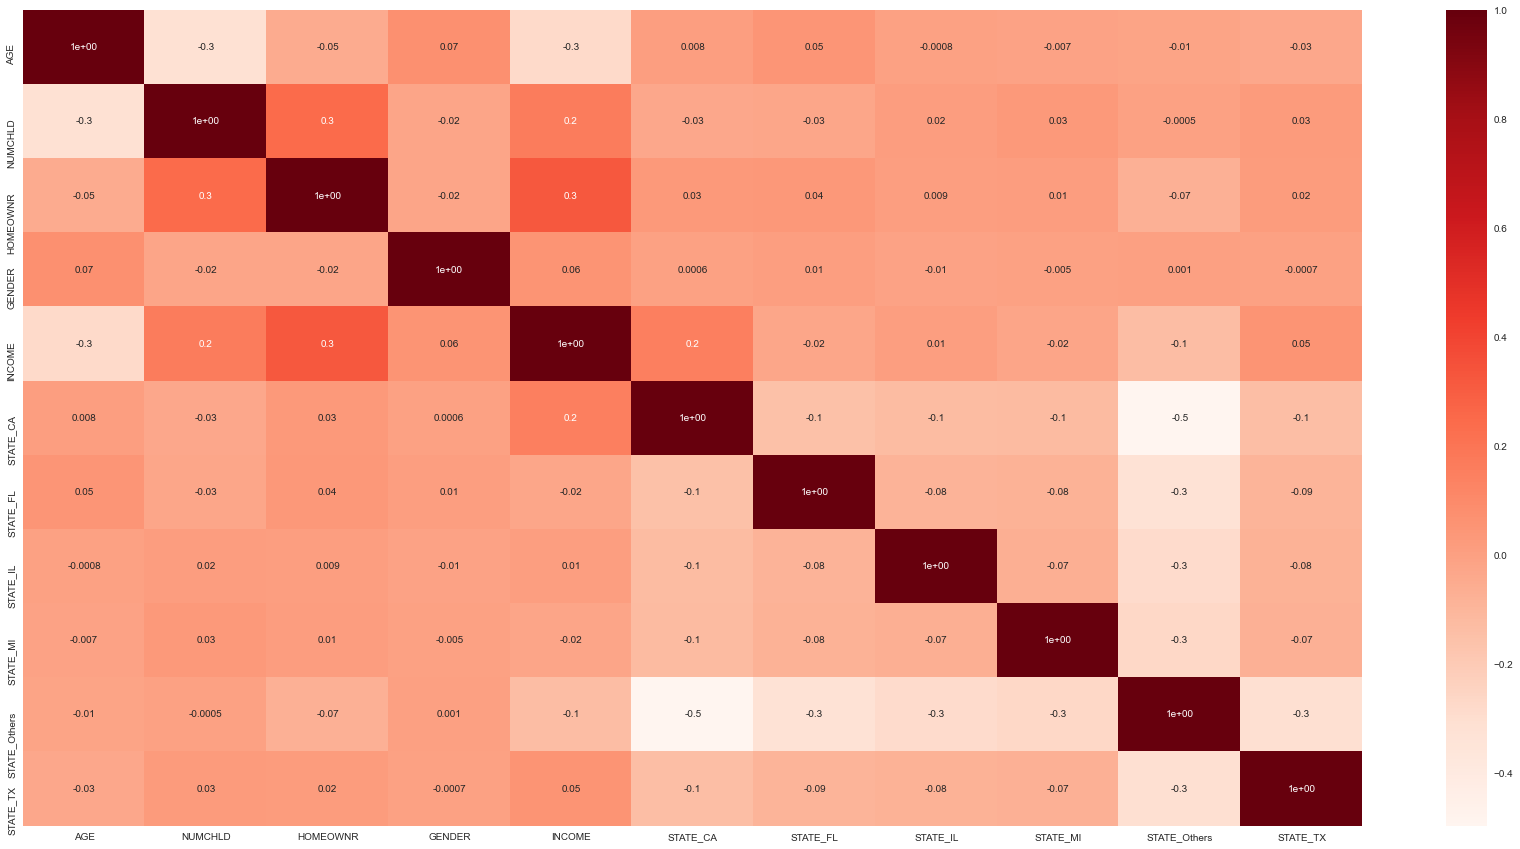

In [95]:
#Using Spearman correlation
%matplotlib inline

def cor_heatmap(cor):
    plt.figure(figsize=(30,15))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

cor_spearman = df_dem.corr(method ='spearman')
cor_heatmap(cor_spearman)

In [96]:
#gender corr really low, drop?

In [97]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

def corr_rf(df):
    feature_table = pd.DataFrame(index=df.columns)
    i=0
    for col in df:
        embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100), max_features=len(df.columns)-1)
        embeded_rf_selector.fit(df.drop(col,axis=1), df[col])
        embeded_rf_support = embeded_rf_selector.get_support()
        embeded_rf_support = list(embeded_rf_support)
        embeded_rf_support.insert(i,True)
        i+=1

        feature_table[col]=embeded_rf_support
    feature_table['Total'] = np.sum(feature_table, axis=1)
    feature_table = feature_table.sort_values(['Total'] , ascending=False)
    return feature_table

corr_rf(df_dem)

AGE  NUMCHLD  HOMEOWNR  GENDER  INCOME  STATE_CA  STATE_FL  \
STATE_IL      False    False     False   False   False      True      True   
STATE_MI      False    False     False   False   False      True      True   
STATE_TX      False    False     False   False   False      True      True   
AGE            True     True      True    True    True     False     False   
INCOME         True     True      True    True    True     False     False   
STATE_FL      False    False     False   False   False      True      True   
HOMEOWNR      False     True      True    True    True     False     False   
STATE_CA      False    False     False   False   False      True      True   
STATE_Others  False    False     False   False   False      True      True   
NUMCHLD        True     True     False   False   False     False     False   
GENDER        False    False     False    True   False     False     False   

              STATE_IL  STATE_MI  STATE_Others  STATE_TX  Total  
STATE_IL          True      True          True      True      6  
STATE_MI          True      True          True      True      6  
STATE_TX          True      True          True      True      6  
AGE              False     False         False     False      5  
INCOME           False     False         False     False      5  
STATE_FL          True     False          True      True      5  
HOMEOWNR         False     False         False     False      4  
STATE_CA         False     False          True      True      4  
STATE_Others     False     False          True     False      3  
NUMCHLD          False     False         False     False      2  
GENDER           False     False         False     False      1

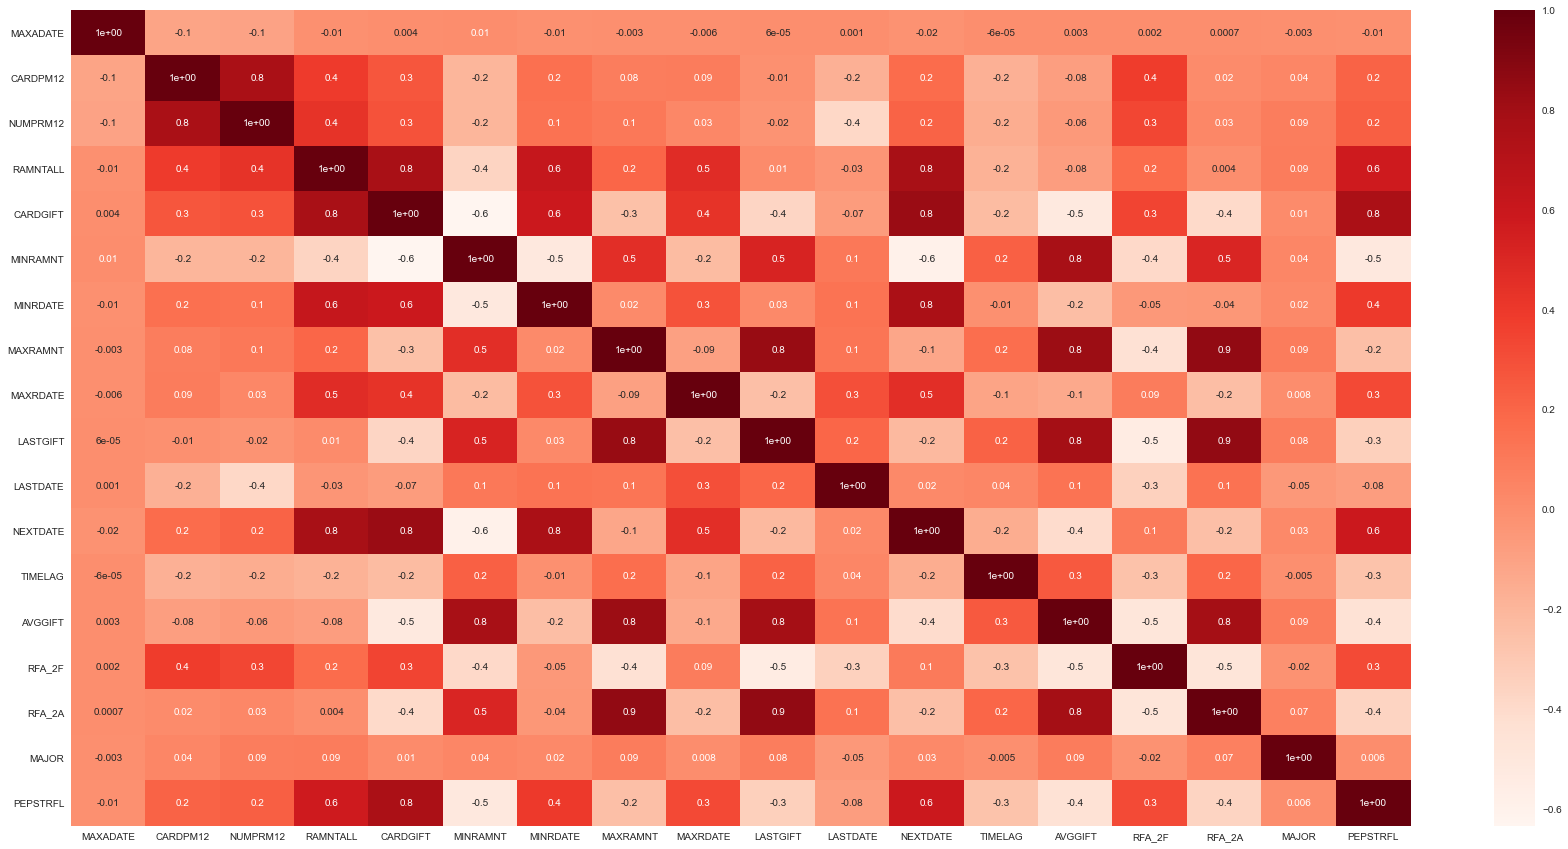

In [98]:
#Using Spearman correlation
%matplotlib inline

def cor_heatmap(cor):
    plt.figure(figsize=(30,15))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

cor_spearman = df_sum.corr(method ='spearman')
cor_heatmap(cor_spearman)

In [34]:
df_sum.drop(['MAXADATE', 'MAJOR'], axis=1, inplace=True)  #no correlation

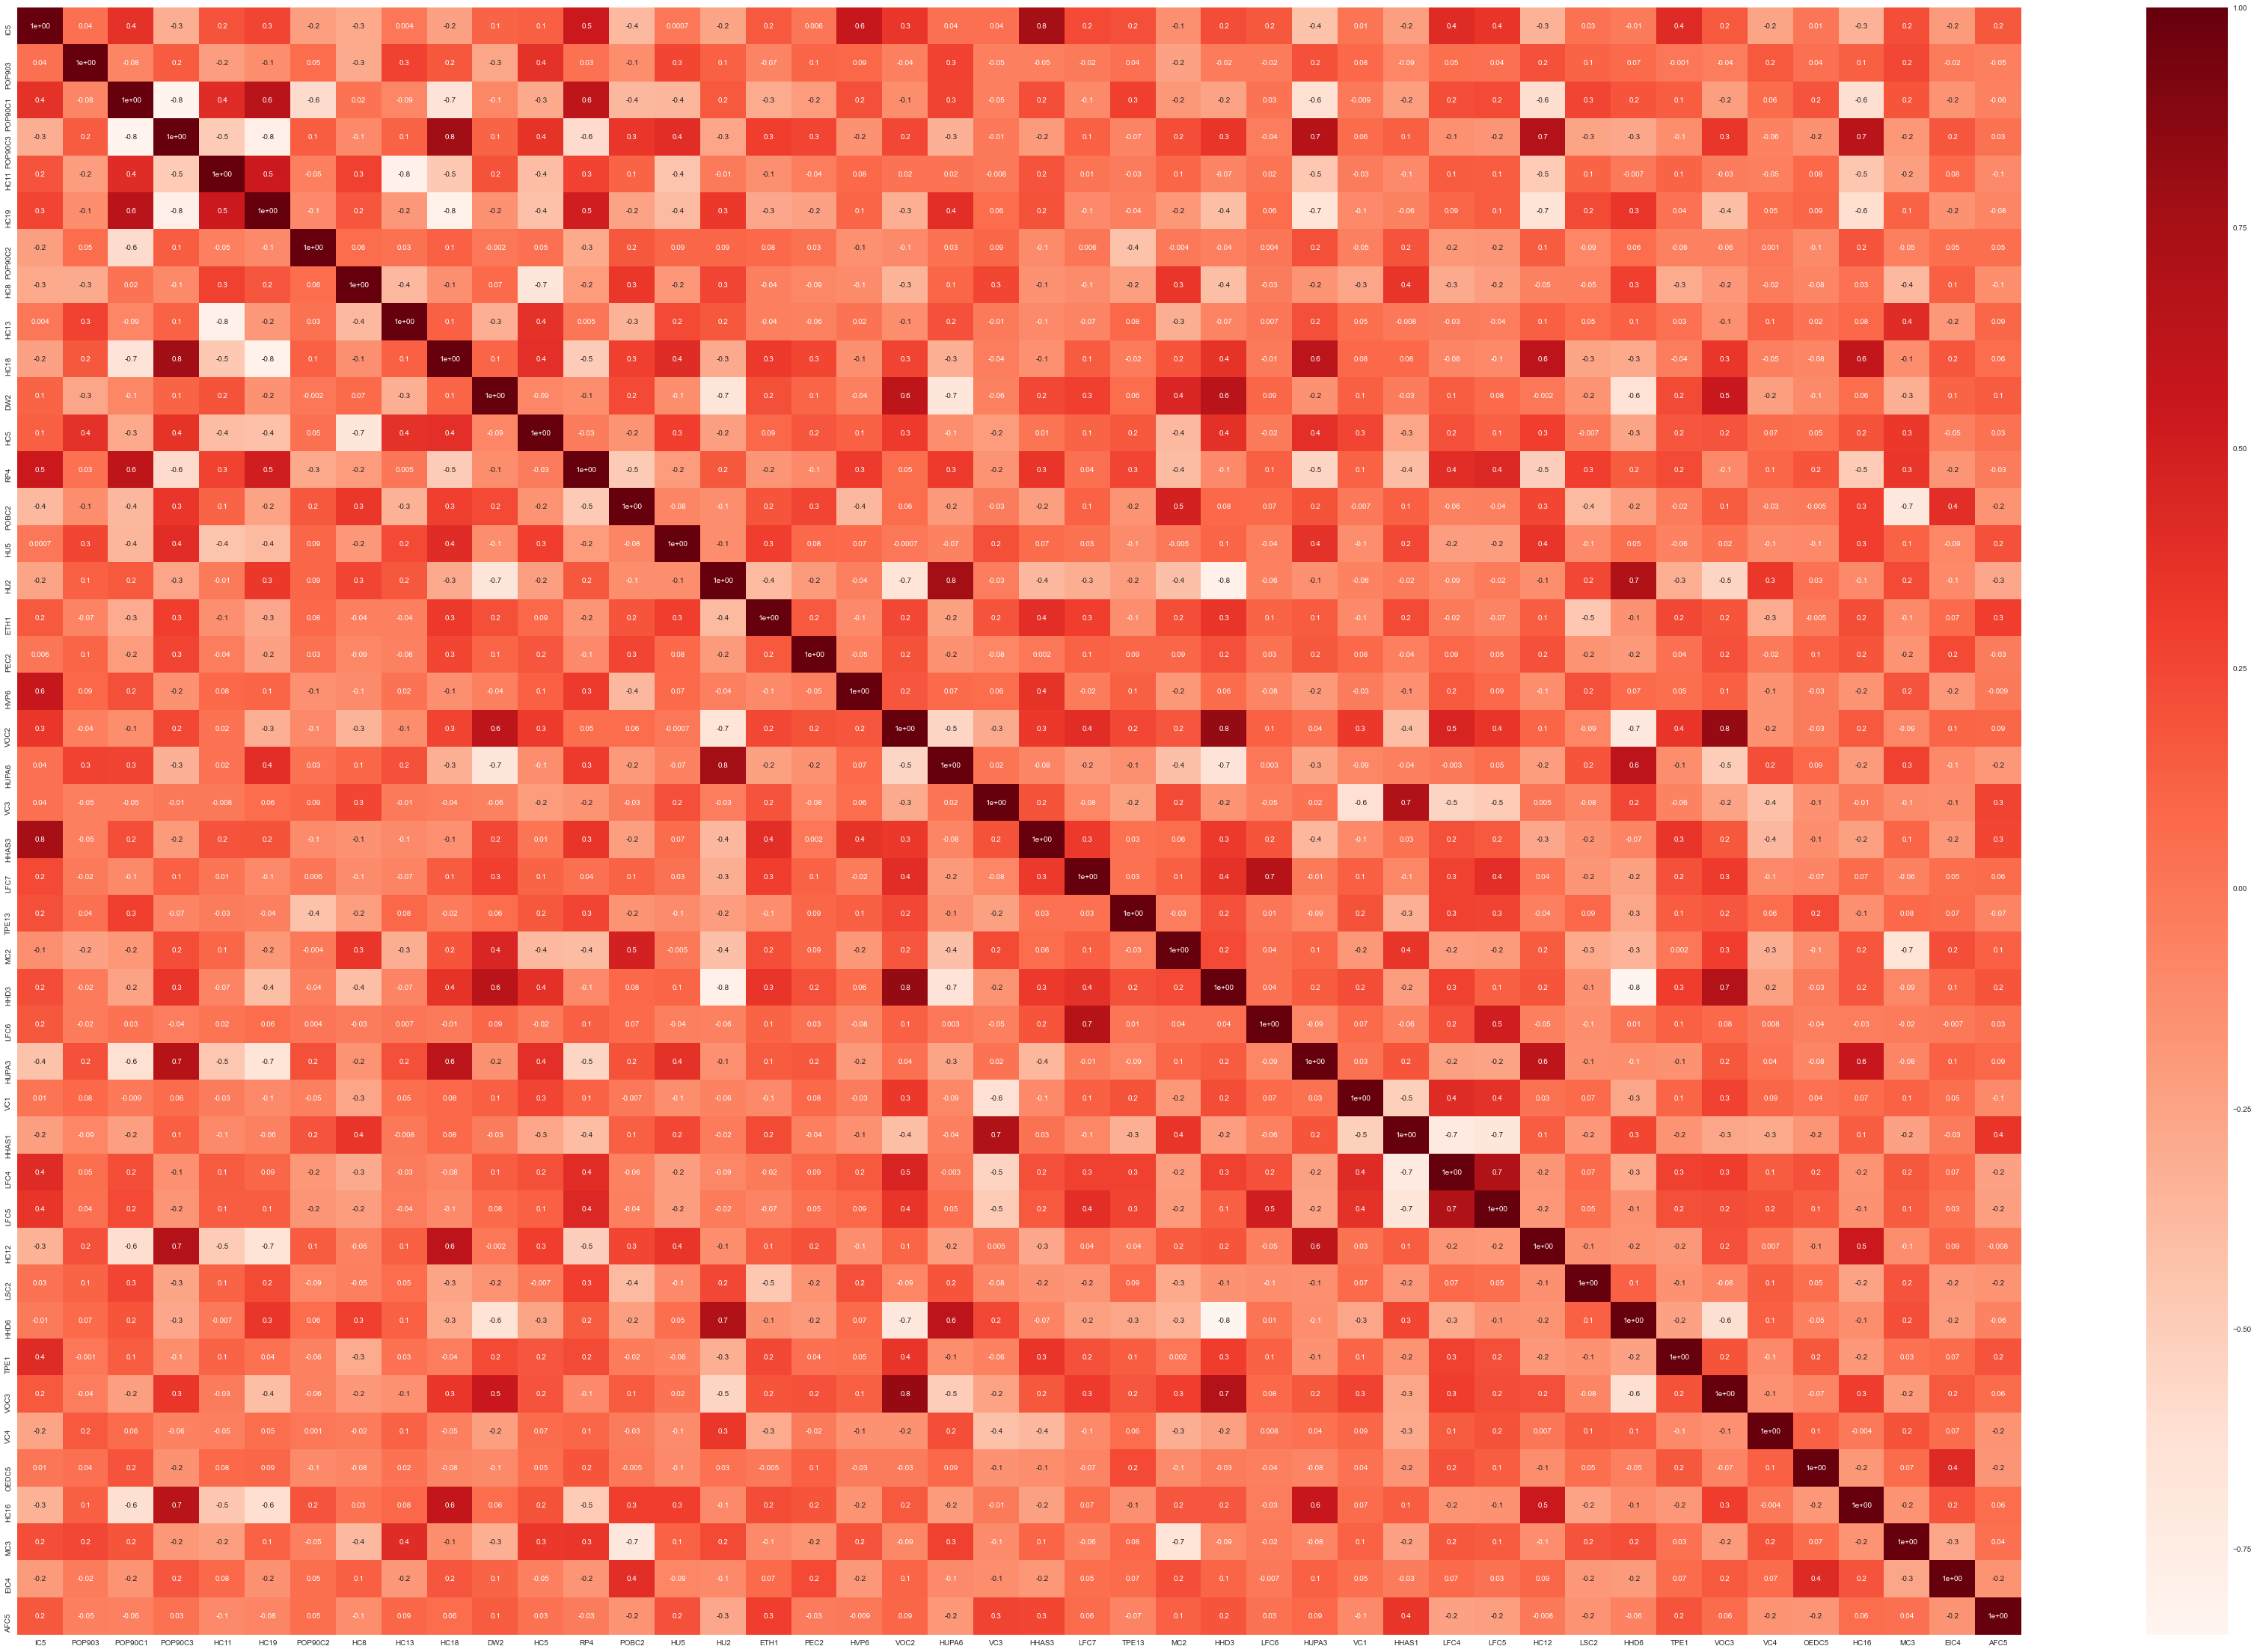

In [100]:
#Using Spearman correlation
%matplotlib inline

def cor_heatmap(cor):
    plt.figure(figsize=(60,40))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

cor_spearman = df_cen.corr(method ='spearman')
cor_heatmap(cor_spearman)

<a class="anchor" id="pca_census">
    
<font size="6"><span style='color: LightSkyBlue'> **3.4. PCA for census category**  </span></font>
    
</a>


In [103]:
#It was a try to see if it was good for the project. But as can be seen below, it was not good as using all of them 

In [38]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df_cen)
pca_feat  

# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

Eigenvalue  Difference  Proportion  Cumulative
1     7.930050    0.000000    0.180226    0.180226
2     5.968452   -1.961598    0.135645    0.315872
3     4.199581   -1.768871    0.095444    0.411316
4     3.936314   -0.263267    0.089461    0.500776
5     2.112007   -1.824307    0.048000    0.548776
6     1.885011   -0.226996    0.042841    0.591617
7     1.680892   -0.204119    0.038202    0.629818
8     1.396154   -0.284738    0.031730    0.661549
9     1.114004   -0.282150    0.025318    0.686867
10    1.018702   -0.095302    0.023152    0.710019
11    0.953656   -0.065047    0.021674    0.731693
12    0.889711   -0.063945    0.020220    0.751913
13    0.834277   -0.055434    0.018961    0.770874
14    0.811094   -0.023183    0.018434    0.789307
15    0.775624   -0.035470    0.017628    0.806935
16    0.700457   -0.075167    0.015919    0.822854
17    0.598996   -0.101461    0.013613    0.836468
18    0.595664   -0.003332    0.013538    0.850005
19    0.549836   -0.045828    0.012496    0.862502
20    0.521459   -0.028376    0.011851    0.874353
21    0.484757   -0.036702    0.011017    0.885370
22    0.465491   -0.019266    0.010579    0.895949
23    0.438950   -0.026541    0.009976    0.905925
24    0.393082   -0.045868    0.008934    0.914859
25    0.380921   -0.012161    0.008657    0.923516
26    0.375881   -0.005040    0.008543    0.932059
27    0.317300   -0.058581    0.007211    0.939270
28    0.286600   -0.030699    0.006514    0.945783
29    0.278411   -0.008189    0.006327    0.952111
30    0.263066   -0.015345    0.005979    0.958090
31    0.237694   -0.025372    0.005402    0.963492
32    0.203644   -0.034049    0.004628    0.968120
33    0.195524   -0.008121    0.004444    0.972564
34    0.188166   -0.007358    0.004276    0.976840
35    0.180877   -0.007288    0.004111    0.980951
36    0.165599   -0.015278    0.003764    0.984714
37    0.150104   -0.015495    0.003411    0.988126
38    0.136746   -0.013358    0.003108    0.991234
39    0.121830   -0.014916    0.002769    0.994002
40    0.094837   -0.026993    0.002155    0.996158
41    0.076077   -0.018759    0.001729    0.997887
42    0.055136   -0.020941    0.001253    0.999140
43    0.036982   -0.018153    0.000841    0.999980
44    0.000863   -0.036120    0.000020    1.000000

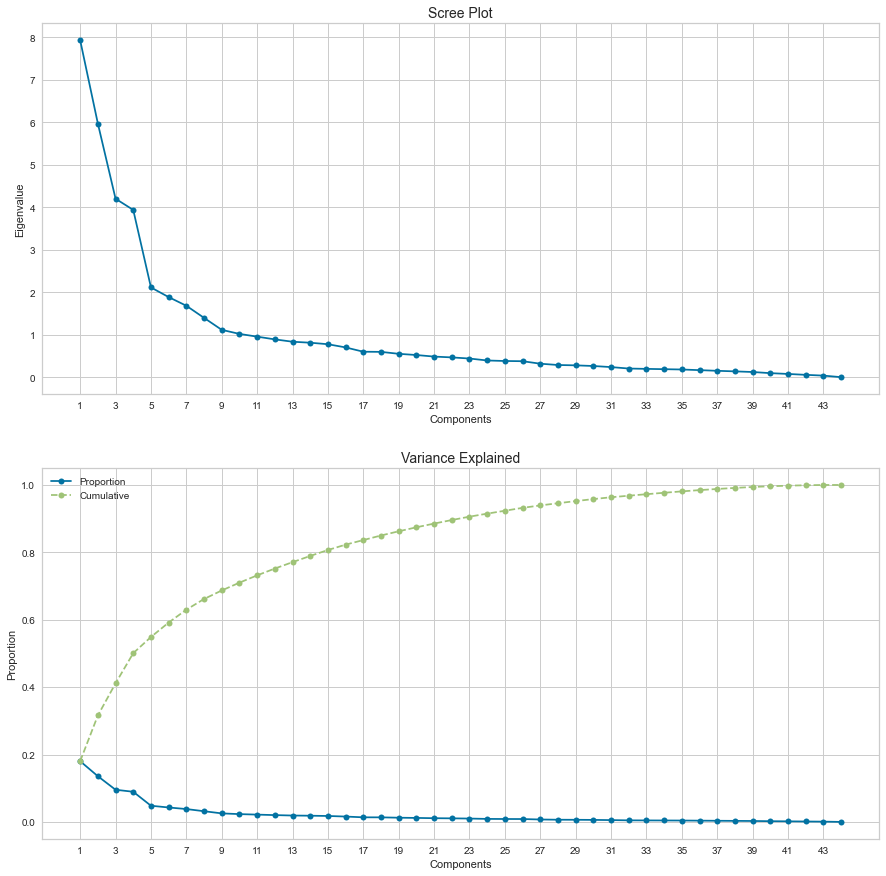

In [39]:
%matplotlib inline
# figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_, 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_, 2))
ax2.set_xticklabels(range(1, pca.n_components_ + 1, 2))

plt.show()

In [40]:
pca = PCA(n_components=7)
pca_feat = pca.fit_transform(df_cen)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df_cen.index, columns=pca_feat_names)  
pca_df

PC0       PC1       PC2       PC3       PC4       PC5       PC6
CONTROLN                                                                      
95515    -2.416894  0.100956 -1.335709 -1.296008  0.433015 -1.057703 -0.823682
148535   -1.300778 -5.846999 -0.857458  0.902125 -2.468821  1.803897  3.191956
15078    -3.654638  1.691508  1.359768 -1.470303  0.661126  1.173049 -1.276908
172556   -1.133200  3.392083  0.816619 -2.458679 -2.501914  0.899900  1.870799
7112      0.462240  1.964456 -1.198965 -1.139436 -1.925224 -0.442901  0.994274
...            ...       ...       ...       ...       ...       ...       ...
184568    2.174103 -2.910161  1.942480  0.552434  0.581684 -0.024596  1.468409
122706   -0.839530 -3.791973  1.896235  1.400333 -1.335254 -1.510087  1.646748
189641    1.560455 -0.866618 -1.589611 -3.243347  0.049865  0.161754  0.795699
4693     -0.938199 -3.137172 -1.640300 -0.675690 -0.449341 -0.452520  0.519192
185114   -0.698782 -2.900113  1.854399  2.294144 -0.262697 -1.658649  0.313714

[92127 rows x 7 columns]

In [41]:
# Reassigning df to contain pca variables
df_pca_cen = pd.concat([df_cen, pca_df], axis=1)  #df_pca1 em vez disto se calhar devia ser df_[numerical_data] - para nao incluir a normalizacao
df_pca_cen.head()

IC5    POP903   POP90C1   POP90C3      HC11      HC19  \
CONTROLN                                                               
95515    -0.352131 -0.425015 -1.247725  0.960055  1.063288 -0.925030   
148535    2.413813 -0.111200  0.844207 -0.658154  1.232530  0.754891   
15078    -0.507339  0.676165 -1.247725  1.781607 -1.475329 -1.579914   
172556   -0.085298 -0.478260 -1.247725  1.632234 -0.206020 -1.437548   
7112     -0.713965 -0.222873  0.844207 -0.658154 -1.221467 -1.466021   

           POP90C2       HC8      HC13      HC18       DW2       HC5  \
CONTROLN                                                               
95515     0.681037  0.306352 -0.717659  1.854784  1.103980 -0.372544   
148535   -0.437968 -1.170944 -0.932649 -0.571779  1.260258  1.388997   
15078    -0.374025 -0.175375  0.178132  2.302765  0.088178  0.004929   
172556   -0.182196  0.595388 -0.466838  2.302765  0.635149 -0.162837   
7112     -0.437968  0.980770  1.503903 -0.534447  1.221188 -0.833900   

               RP4     POBC2       HU5       HU2      ETH1      PEC2  \
CONTROLN                                                               
95515    -0.182175  0.774178 -0.326083 -0.754811  0.326676 -0.289669   
148535    0.720671 -0.879574 -0.230812 -1.240196 -0.952605 -0.866024   
15078    -1.428963  1.246678  0.197909 -0.366504  0.531360  0.129499   
172556   -1.858890  0.443427 -0.373719  1.089649 -1.259632 -0.080085   
7112      0.247751  0.348927 -0.659533 -0.948965 -4.278735 -0.918420   

              HVP6      VOC2     HUPA6       VC3     HHAS3      LFC7  \
CONTROLN                                                               
95515    -0.358402  0.893588 -0.622877 -0.937297  0.461809  0.223108   
148535    4.835858  1.731285 -0.622877 -1.356722  1.366651  0.464541   
15078    -0.358402  0.223431 -0.453071 -0.098448 -0.744646  0.766333   
172556    0.194179 -1.005191 -0.622877 -0.158366 -1.046260 -1.104774   
7112     -0.358402 -0.893498 -0.622877  1.159826 -1.951101 -1.104774   

             TPE13       MC2      HHD3      LFC6     HUPA3       VC1  \
CONTROLN                                                               
95515    -0.947356  0.179835  0.700145 -0.182829 -0.599072  0.219268   
148535    0.629687 -0.474052  1.879412 -0.050379 -0.599072  1.702375   
15078     0.023132  0.702945  0.372571  0.876773  1.068720 -0.204476   
172556   -1.068667  0.179835  0.110512 -2.103358  0.026350 -1.193214   
7112      0.932964  1.879941 -0.675666  1.009223 -0.599072 -1.546334   

             HHAS1      LFC4      LFC5      HC12      LSC2      HHD6  \
CONTROLN                                                               
95515     0.076193 -0.480441 -0.740720 -0.575166  0.165323 -0.107999   
148535   -1.543389  0.784186  0.275719 -0.575166  0.082122 -1.041681   
15078     0.076193 -0.034102  0.197532 -0.078110 -0.250680 -0.277760   
172556   -0.365511 -0.182881 -0.662532  1.247372  2.910945 -0.107999   
7112      0.591514 -0.406051 -0.349782  0.584631 -0.500282 -0.787040   

              TPE1      VOC3       VC4     OEDC5      HC16       MC3  \
CONTROLN                                                               
95515     1.000752 -0.116098  0.443213  0.749248 -0.513096 -0.926014   
148535    0.285078  3.069641 -1.085294 -0.111722 -0.513096 -0.329154   
15078    -0.251676  0.820884 -0.321041  0.366595  0.922448 -0.428631   
172556   -1.683023  0.633488  0.443213  1.610218  1.018151 -0.926014   
7112     -0.341136 -0.209796  0.825339 -2.024988 -0.513096 -0.826538   

              EIC4      AFC5       PC0       PC1       PC2       PC3  \
CONTROLN                                                               
95515     2.375502  0.745280 -2.416894  0.100956 -1.335709 -1.296008   
148535   -0.411850 -1.653841 -1.300778 -5.846999 -0.857458  0.902125   
15078     1.579115 -1.054060 -3.654638  1.691508  1.359768 -1.470303   
172556   -1.407333 -0.854134 -1.133200  3.392083  0.816619 -2.458679   
7112     -1.606430 -0.354317  0.462240  1.964456

In [42]:
metric_features = df_cen.columns.tolist()

def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca_cen.corr().loc[metric_features, pca_feat_names]
loadings.style.applymap(_color_red_or_green)

In [43]:
df_pca_cen[pca_feat_names]

PC0       PC1       PC2       PC3       PC4       PC5       PC6
CONTROLN                                                                      
95515    -2.416894  0.100956 -1.335709 -1.296008  0.433015 -1.057703 -0.823682
148535   -1.300778 -5.846999 -0.857458  0.902125 -2.468821  1.803897  3.191956
15078    -3.654638  1.691508  1.359768 -1.470303  0.661126  1.173049 -1.276908
172556   -1.133200  3.392083  0.816619 -2.458679 -2.501914  0.899900  1.870799
7112      0.462240  1.964456 -1.198965 -1.139436 -1.925224 -0.442901  0.994274
...            ...       ...       ...       ...       ...       ...       ...
184568    2.174103 -2.910161  1.942480  0.552434  0.581684 -0.024596  1.468409
122706   -0.839530 -3.791973  1.896235  1.400333 -1.335254 -1.510087  1.646748
189641    1.560455 -0.866618 -1.589611 -3.243347  0.049865  0.161754  0.795699
4693     -0.938199 -3.137172 -1.640300 -0.675690 -0.449341 -0.452520  0.519192
185114   -0.698782 -2.900113  1.854399  2.294144 -0.262697 -1.658649  0.313714

[92127 rows x 7 columns]

In [44]:
df_pca_cen[metric_features]

IC5    POP903   POP90C1   POP90C3      HC11      HC19  \
CONTROLN                                                               
95515    -0.352131 -0.425015 -1.247725  0.960055  1.063288 -0.925030   
148535    2.413813 -0.111200  0.844207 -0.658154  1.232530  0.754891   
15078    -0.507339  0.676165 -1.247725  1.781607 -1.475329 -1.579914   
172556   -0.085298 -0.478260 -1.247725  1.632234 -0.206020 -1.437548   
7112     -0.713965 -0.222873  0.844207 -0.658154 -1.221467 -1.466021   
...            ...       ...       ...       ...       ...       ...   
184568    0.351348  4.147923  0.844207 -0.658154  0.950461  0.726418   
122706    1.269411 -0.411350  0.780815 -0.558572  0.837634 -0.156252   
189641   -0.435851 -0.484856  0.844207 -0.658154  1.260737  0.754891   
4693      0.011840 -0.342085  0.844207 -0.658154  1.317150  0.754891   
185114    0.101022  0.050891  0.844207 -0.658154 -1.475329  0.470159   

           POP90C2       HC8      HC13      HC18       DW2       HC5  \
CONTROLN                                                               
95515     0.681037  0.306352 -0.717659  1.854784  1.103980 -0.372544   
148535   -0.437968 -1.170944 -0.932649 -0.571779  1.260258  1.388997   
15078    -0.374025 -0.175375  0.178132  2.302765  0.088178  0.004929   
172556   -0.182196  0.595388 -0.466838  2.302765  0.635149 -0.162837   
7112     -0.437968  0.980770  1.503903 -0.534447  1.221188 -0.833900   
...            ...       ...       ...       ...       ...       ...   
184568   -0.437968 -0.881908 -0.645996 -0.310457 -1.122970  0.382402   
122706   -0.437968 -0.978253 -0.502669  0.585505  0.830495  2.815007   
189641   -0.437968  2.008454 -1.075976 -0.571779  1.103980 -0.959725   
4693     -0.437968 -1.138829 -1.040144 -0.571779  1.260258 -0.708076   
185114   -0.437968 -1.138829  2.292199 -0.347788  1.064911  1.556763   

               RP4     POBC2       HU5       HU2      ETH1      PEC2  \
CONTROLN                                                               
95515    -0.182175  0.774178 -0.326083 -0.754811  0.326676 -0.289669   
148535    0.720671 -0.879574 -0.230812 -1.240196 -0.952605 -0.866024   
15078    -1.428963  1.246678  0.197909 -0.366504  0.531360  0.129499   
172556   -1.858890  0.443427 -0.373719  1.089649 -1.259632 -0.080085   
7112      0.247751  0.348927 -0.659533 -0.948965 -4.278735 -0.918420   
...            ...       ...       ...       ...       ...       ...   
184568    0.849649 -1.493824 -0.516626  0.701342 -0.389722 -0.866024   
122706    0.075781 -0.312573 -0.659533 -0.851888  0.275504 -0.813628   
189641    0.591693  1.152178 -0.183176  0.215958 -0.185037  0.339083   
4693      0.591693 -0.359823 -0.659533 -0.851888  0.326676  0.286687   
185114    0.677678 -0.454323 -0.183176 -0.997504  0.019648 -0.499252   

              HVP6      VOC2     HUPA6       VC3     HHAS3      LFC7  \
CONTROLN                                                               
95515    -0.358402  0.893588 -0.622877 -0.937297  0.461809  0.223108   
148535    4.835858  1.731285 -0.622877 -1.356722  1.366651  0.464541   
15078    -0.358402  0.223431 -0.453071 -0.098448 -0.744646  0.766333   
172556    0.194179 -1.005191 -0.622877 -0.158366 -1.046260 -1.104774   
7112     -0.358402 -0.893498 -0.622877  1.159826 -1.951101 -1.104774   
...            ...       ...       ...       ...       ...       ...   
184568   -0.358402 -0.055802  0.056350 -1.356722  1.607942  0.464541   
122706   -0.082111  1.284513 -0.622877 -0.877379  1.065037 -0.380475   
189641   -0.358402 -1.061038 -0.622877 -0.817462 -1.046260 -1.527282   
4693      0.138921  1.340359 -0.622877 -0.817462  0.160195  0.283466   
185114   -0.303144  1.116974 -0.622877 -0.398037  0.642778  0.645616   

             TPE13       MC2      HHD3      LFC6     HUPA3       VC1  \
CONTROLN                                                               
95515    -0.947356  0.179835  0.700145 -0.182829 -0.599072  0.219268   
148535    0.629687 -0.474052  1.879412 -0.050379 -0

<hr>
<a class="anchor" id="clustering">
    
<font size="8"><span style='color: DarkTurquoise'> **4. Clustering**  </span></font>
    
</a>


In [30]:
def kelbowplots(clus_estim, data):
    """
    This function produces the k-elbow plot for a given clustering estimator according to 2 different clustering quality measures: "Distortion" and "Calinski Harabasz".
    """
    sns.set()
    fig, axes = plt.subplots(1, 2, figsize=(20,7))

    # Plot the data
    metrics = ["distortion", "calinski_harabasz"]
    ylabels = ["Distortion measure", "Calinski Harabasz measure"]
    titles = ["Distortion measure plot", "Calinski Harabasz measure plot"]
    for ax, m, yl, tl in zip(axes.flatten(), metrics, ylabels, titles):
        # KElbowVisualizer produces the elbow plot for several quality measures
        KElbowVisualizer(clus_estim, metric=m, timings=False, locate_elbow=False, ax=ax).fit(data)
        ax.invert_xaxis()
        ax.set_ylabel(yl, fontsize=13)
        ax.set_xlabel("Number of clusters", fontsize=13)
        ax.set_title(tl, fontsize=13)

    # Set figure
    plt.suptitle("K-Elbow Plots", fontsize=23)

    plt.show()

In [31]:
#K means Clustering 
def clus_Kmeans(df, nclust):
    model = KMeans(nclust, random_state=0)
    model.fit(df)
    clust_labels = model.predict(df)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [32]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust


# Set up the clusterers
kmeans = KMeans(
    init='k-means++',
    n_init=20,
    random_state=42
)

hierarchical = AgglomerativeClustering(
    affinity='euclidean'
)

In [33]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [34]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) #get cluster labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

In [35]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(s=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

<a class="anchor" id="sample">
    
<font size="6"><span style='color: LightSkyBlue'> **4.1. Dataframe Sample**  </span></font>
    
</a>


https://datascience.stackexchange.com/questions/47889/how-to-run-agglomerativeclustering-on-a-big-data-in-python

In [45]:
df_sample = df_.sample(n=20000)
df_dem_sample = df_dem.sample(n=20000)
df_sum_sample = df_sum.sample(n=20000)
df_cen_sample = df_cen.sample(n=20000)

df_pca_sample = df_pca_cen[pca_feat_names].sample(n=20000)

#we've runned this cell and the ones below 4x times we got the same final results




<a class="anchor" id="opt_clust">
    
<font size="6"><span style='color: LightSkyBlue'> **4.2. Optimal Clusterers**  </span></font>
    
</a>


<a class="anchor" id="oc_dem">
    
<font size="4"><span style='color: PowderBlue '> **4.2.1. Demographic Features**  </span></font>
    
</a>


In [120]:
# Obtaining the R² scores for each cluster solution on demographic variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_dem_sample, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:  #hierarchical
    r2_scores[linkage] = get_r2_scores(
        df_dem_sample, hierarchical.set_params(linkage=linkage)
    )
    
pd.DataFrame(r2_scores)

kmeans  complete   average    single      ward
2  0.231513  0.155711  0.042837  0.231004  0.198693
3  0.379785  0.168062  0.055668  0.231750  0.351263
4  0.470070  0.282686  0.204994  0.232691  0.440232
5  0.553966  0.294877  0.210368  0.232955  0.499407
6  0.603627  0.314717  0.210568  0.233663  0.553342
7  0.642709  0.342444  0.212017  0.234674  0.601947
8  0.670666  0.387612  0.212267  0.234894  0.633307
9  0.693843  0.388608  0.214183  0.251662  0.652459

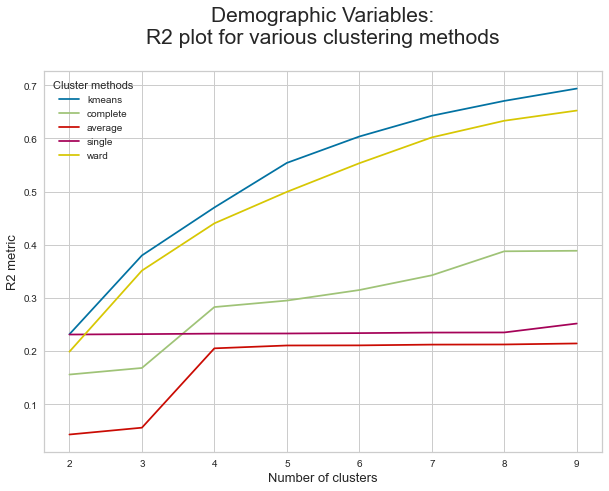

In [121]:
# Visualizing the R² scores for each cluster solution on demographic variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Demographic Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

#kmeans seems to be the best option, 5 clusters

<a class="anchor" id="oc_sum">
    
<font size="4"><span style='color: PowderBlue '> **4.2.2. Summary Features**  </span></font>
    
</a>

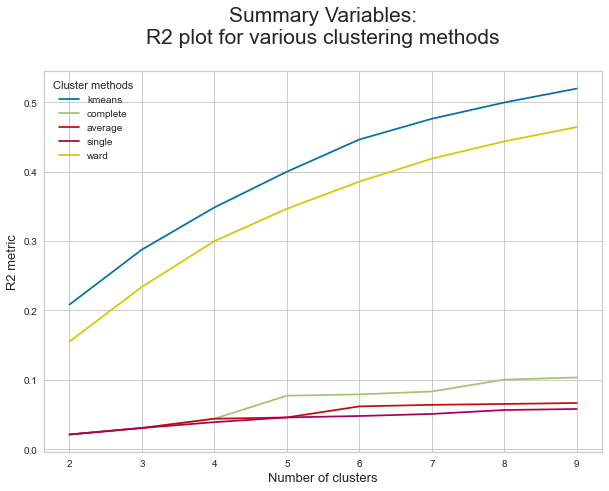

In [122]:
# Obtaining the R² scores for each cluster solution on product variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_sum_sample, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_sum_sample, hierarchical.set_params(linkage=linkage)
    )

# Visualizing the R² scores for each cluster solution on product variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Summary Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

# clusters, kmeans, elbow


#4 to 6

<a class="anchor" id="oc_cen">
   
<font size="4"><span style='color: PowderBlue '> **4.2.3. Census Features**  </span></font>
    
</a>

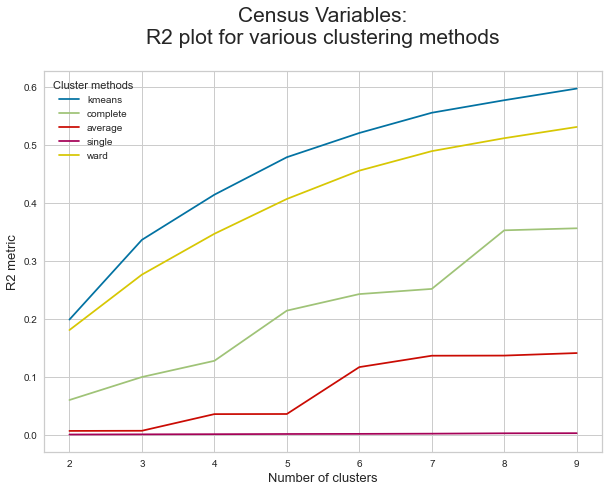

In [123]:
# Obtaining the R² scores for each cluster solution on product variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_pca_sample, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_pca_sample, hierarchical.set_params(linkage=linkage)
    )

# Visualizing the R² scores for each cluster solution on product variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Census Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

# clusters, kmeans, elbow

#5



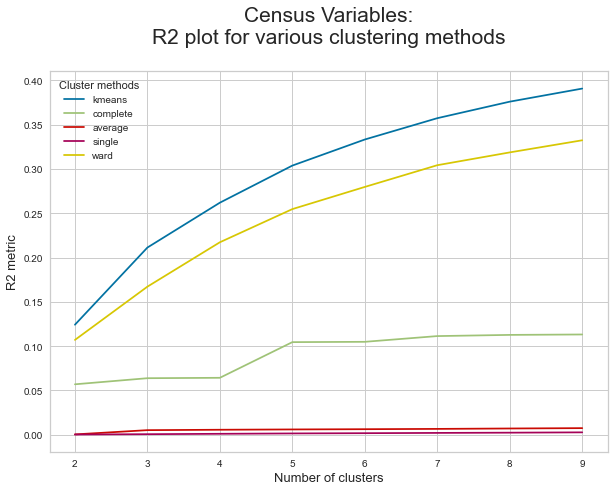

In [125]:
# Obtaining the R² scores for each cluster solution on product variables
r2_scores = {}
r2_scores['kmeans'] = get_r2_scores(df_cen_sample, kmeans)

for linkage in ['complete', 'average', 'single', 'ward']:
    r2_scores[linkage] = get_r2_scores(
        df_cen_sample, hierarchical.set_params(linkage=linkage)
    )

# Visualizing the R² scores for each cluster solution on product variables
pd.DataFrame(r2_scores).plot.line(figsize=(10,7))

plt.title("Census Variables:\nR2 plot for various clustering methods\n", fontsize=21)
plt.legend(title="Cluster methods", title_fontsize=11)
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)
plt.show()

# clusters, kmeans, elbow
#5

For our dataset, none of he hierarchical clusters seems to be as good as k-means, so we won't be testing with the hierarchical clustering.

<a class="anchor" id="num_clust">
   
<font size="6"><span style='color: LightSkyBlue'> **4.3. Defining the number of clusters**  </span></font>
    
</a>

In [27]:
range_clusters = range(1, 11)

<a class="anchor" id="nc_dem">
   
<font size="4"><span style='color: PowderBlue '> **4.3.1. Demographic Features**  </span></font>
    
</a>

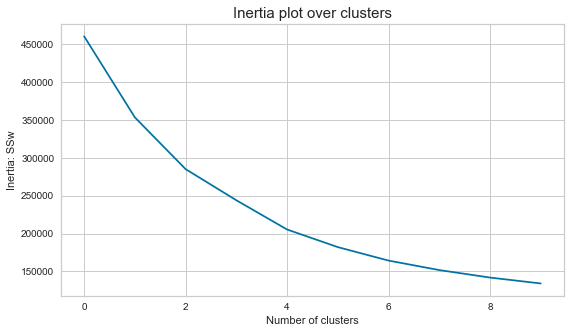

In [128]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_dem)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

#4

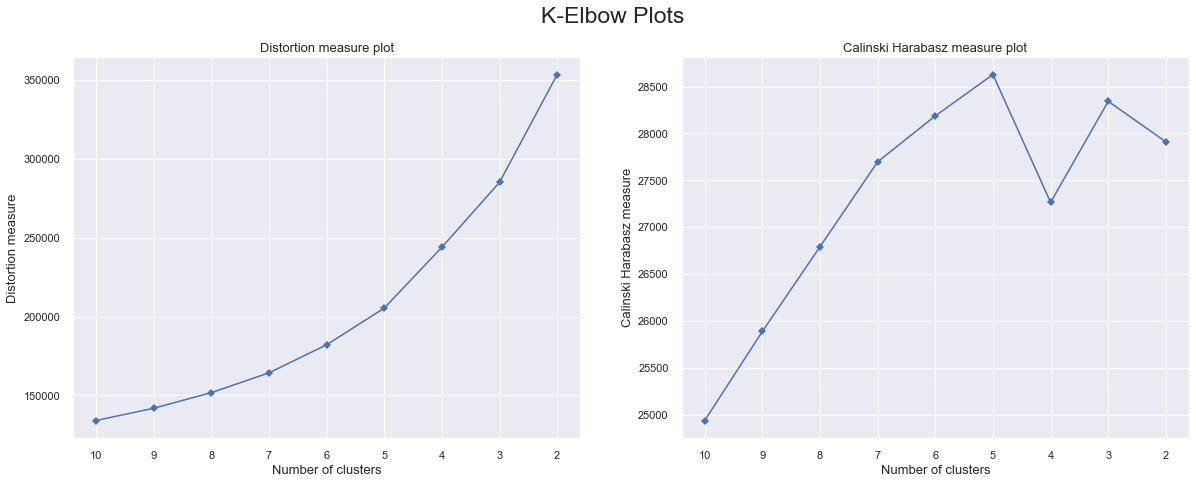

In [129]:
# Instantiate a scikit-learn K-Means model
clus_estim = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
# K-elbow plots
kelbowplots(clus_estim, df_dem)
#5 clusters

For n_clusters = 2, the average silhouette_score is : 0.26257640035731483
For n_clusters = 3, the average silhouette_score is : 0.2870766919825474
For n_clusters = 4, the average silhouette_score is : 0.2850637103051551
For n_clusters = 5, the average silhouette_score is : 0.30464791062796975
For n_clusters = 6, the average silhouette_score is : 0.3214209633044
For n_clusters = 7, the average silhouette_score is : 0.324771168952615
For n_clusters = 8, the average silhouette_score is : 0.3211969239679664
For n_clusters = 9, the average silhouette_score is : 0.33109014772534984
For n_clusters = 10, the average silhouette_score is : 0.33740529817956766


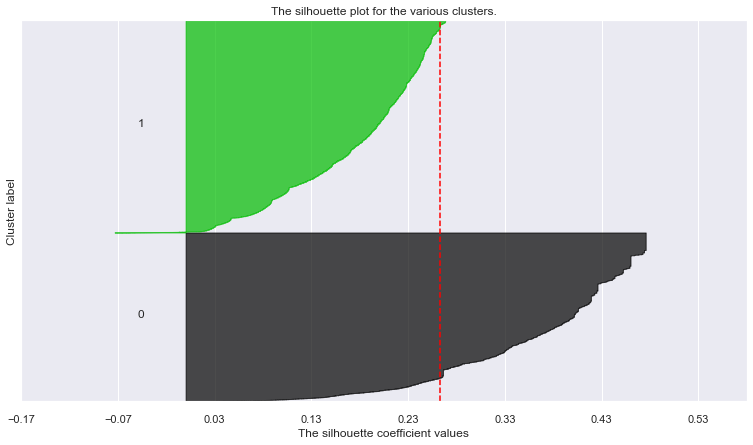

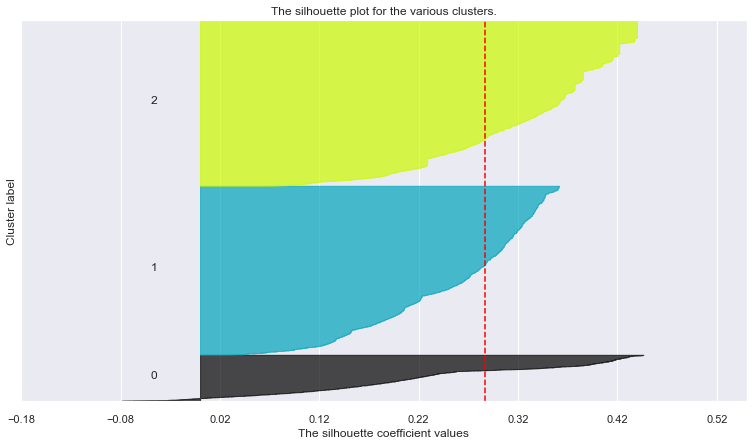

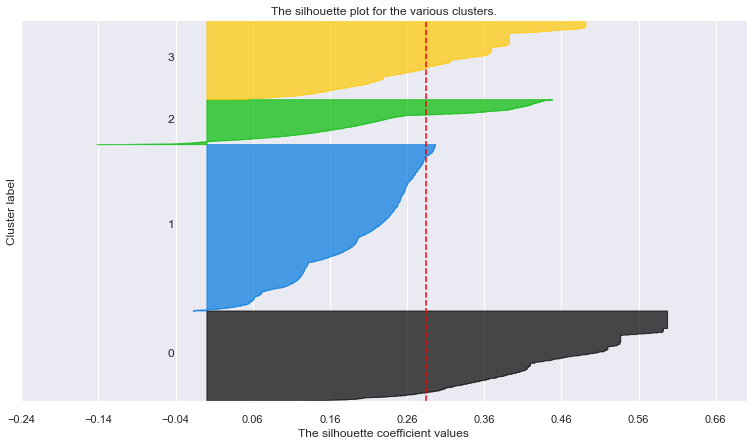

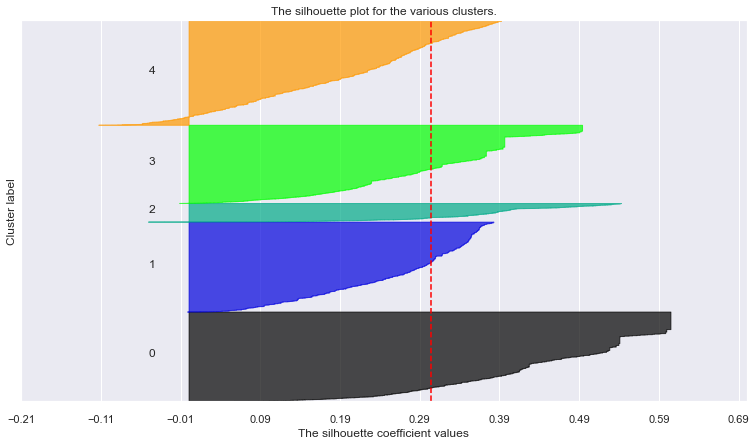

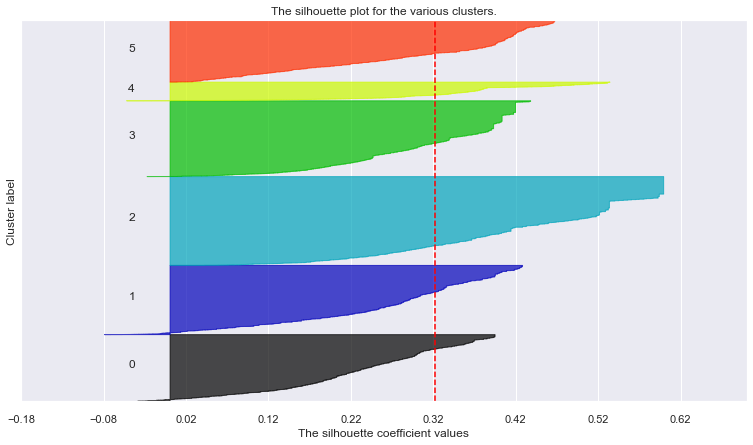

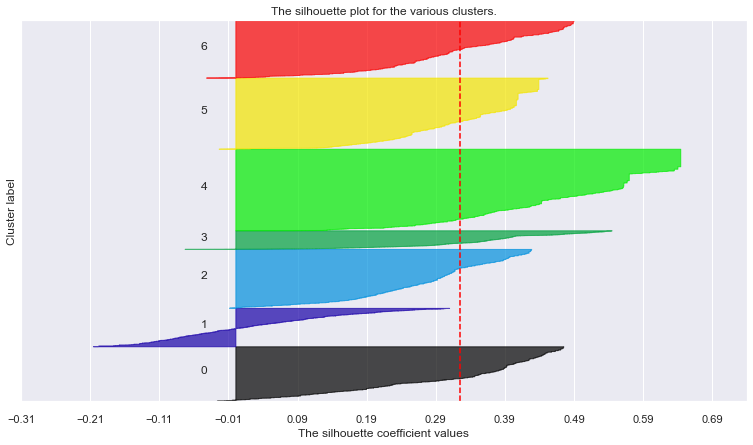

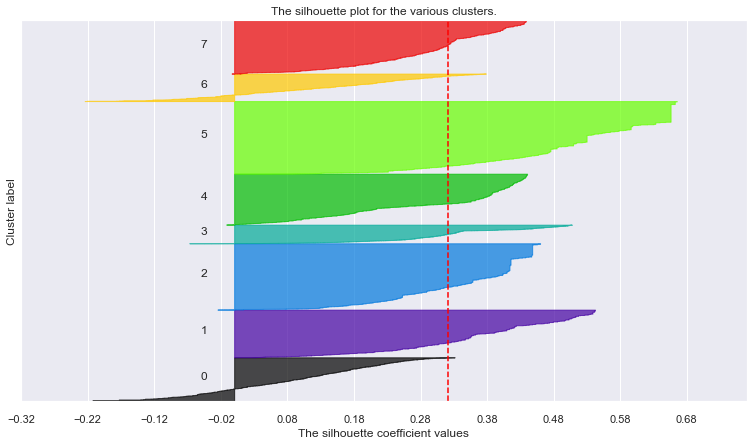

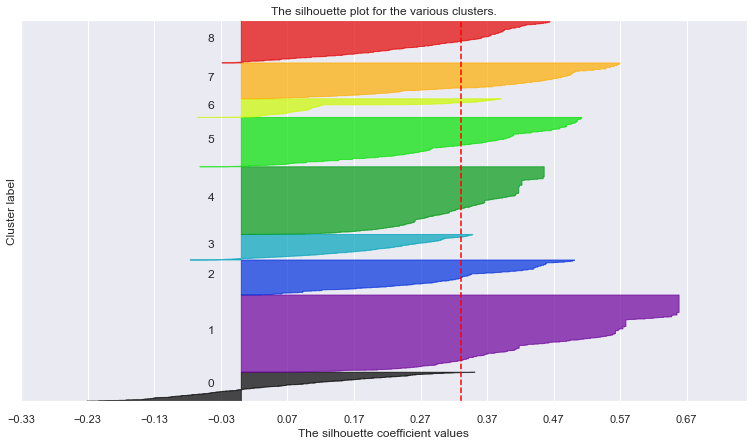

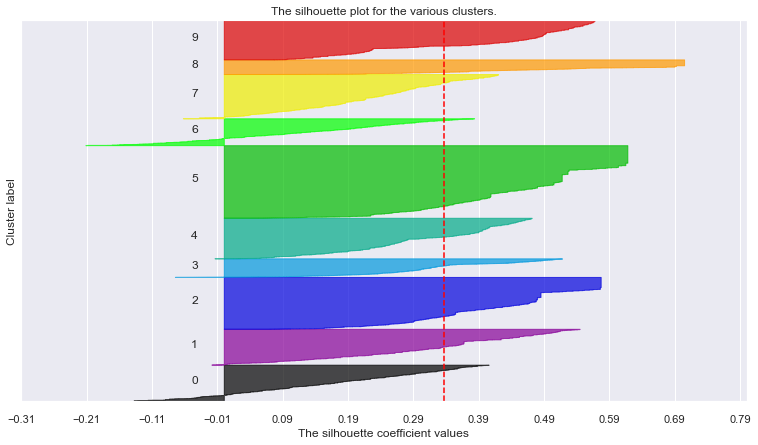

In [132]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_dem)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_dem, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_dem, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_dem) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

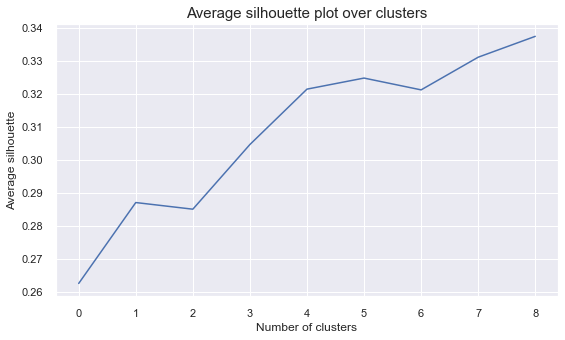

In [133]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

#devia ser 5?

From the graphs above, the optimal number of clusters for the demographic segmentation is 5.

In [57]:
# Performing kmeans and appending the cluster labels to a new dataframe that keeps the cluster labels
clust_labels, cent = clus_Kmeans(df_dem,5 )
kmeans_dem_df = df_dem.copy()
kmeans_dem_df["kmeans_dem_labels"] = clust_labels

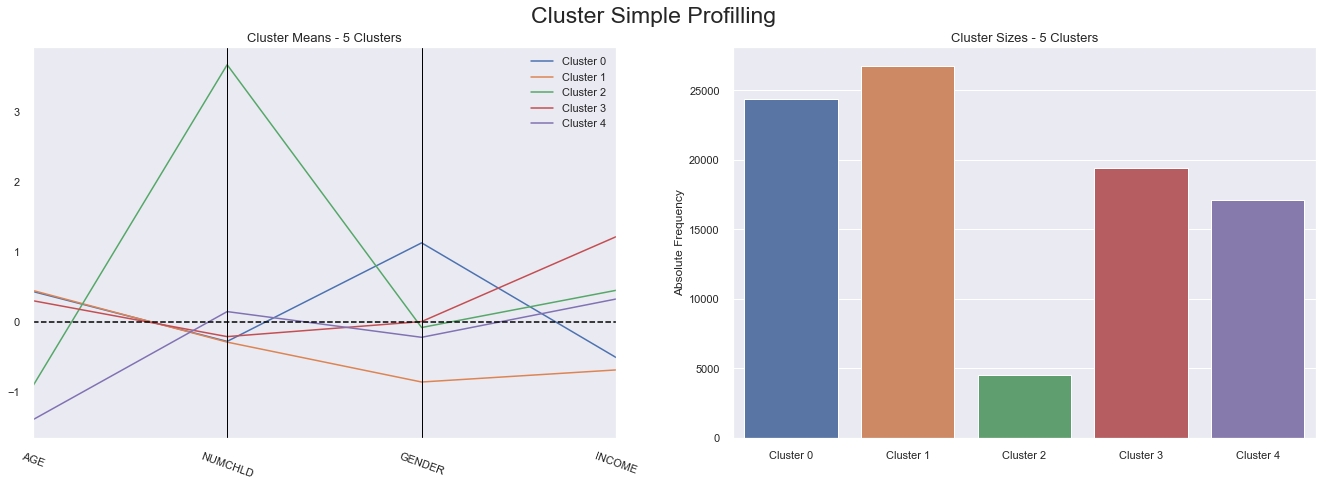

In [58]:
cluster_profiles(kmeans_dem_df, ["kmeans_dem_labels"], figsize=(23, 7))

In [59]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(kmeans_dem_df, ['kmeans_dem_labels']).drop('kmeans_dem_labels').sort_values()

AGE        0.531706
INCOME     0.546079
GENDER     0.559861
NUMCHLD    0.717029
dtype: float64

In [60]:
#R2 score

r2(kmeans_dem_df, ["kmeans_dem_labels"])

0.7364864817967436

<a class="anchor" id="nc_sum">
   
<font size="4"><span style='color: PowderBlue '> **4.3.2. Summary Features**  </span></font>
    
</a>

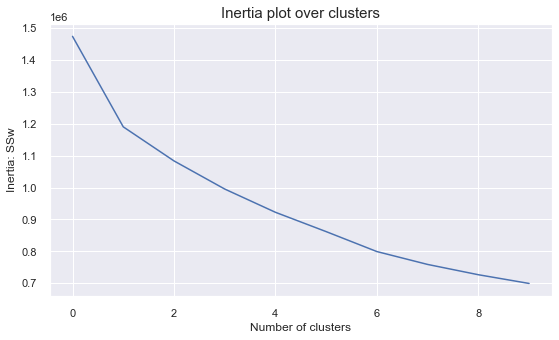

In [138]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_sum)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

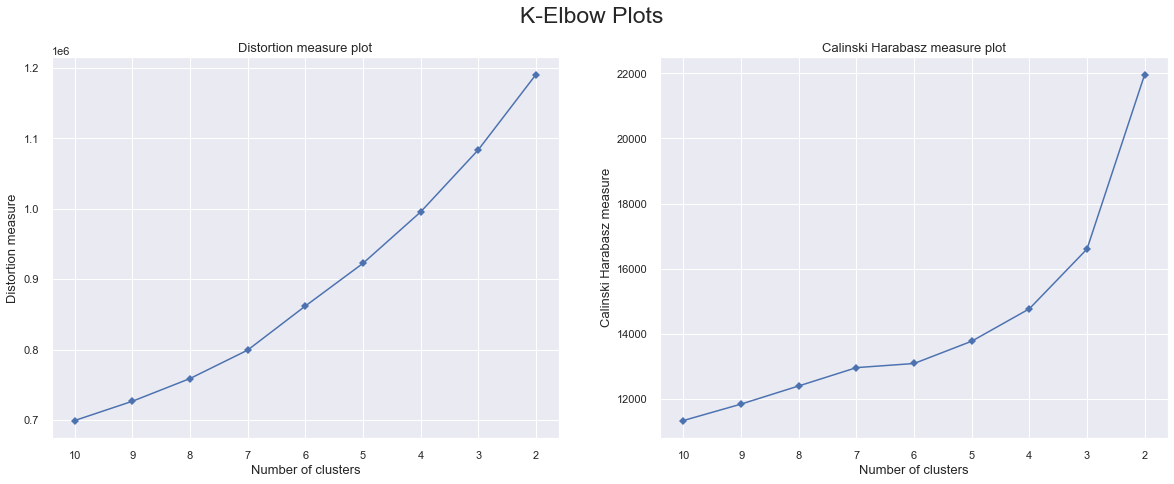

In [139]:
# Instantiate a scikit-learn K-Means model
clus_estim = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
# K-elbow plots
kelbowplots(clus_estim, df_sum)

For n_clusters = 2, the average silhouette_score is : 0.22740710341440676
For n_clusters = 3, the average silhouette_score is : 0.19725213182805373
For n_clusters = 4, the average silhouette_score is : 0.20753925291313655
For n_clusters = 5, the average silhouette_score is : 0.2058274771278054
For n_clusters = 6, the average silhouette_score is : 0.1915185528830975
For n_clusters = 7, the average silhouette_score is : 0.19171554189035284
For n_clusters = 8, the average silhouette_score is : 0.16623088275418263
For n_clusters = 9, the average silhouette_score is : 0.16532799219125893
For n_clusters = 10, the average silhouette_score is : 0.16487846871409145


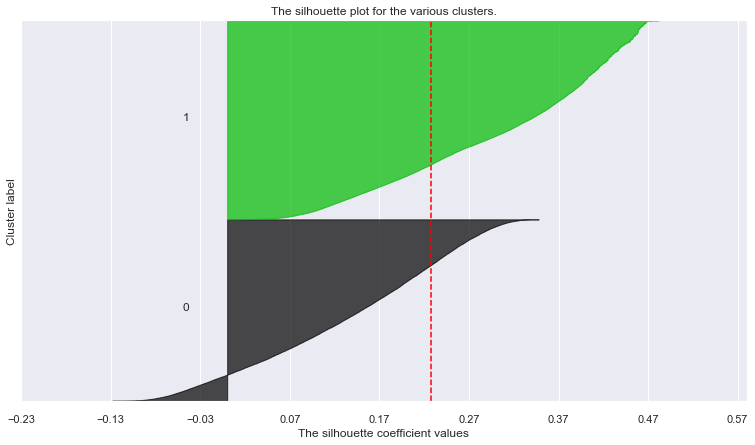

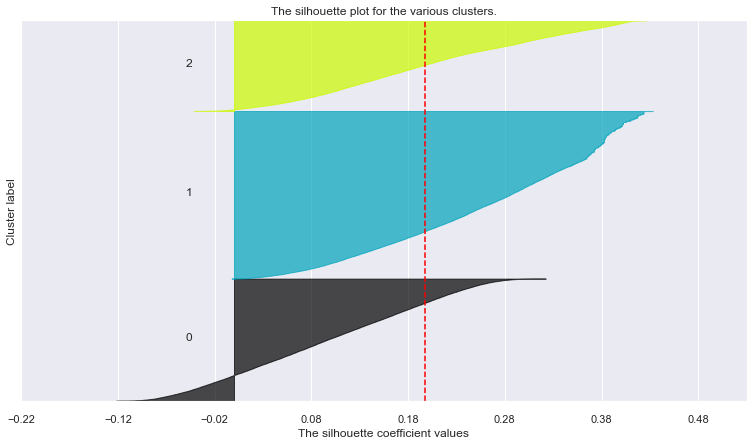

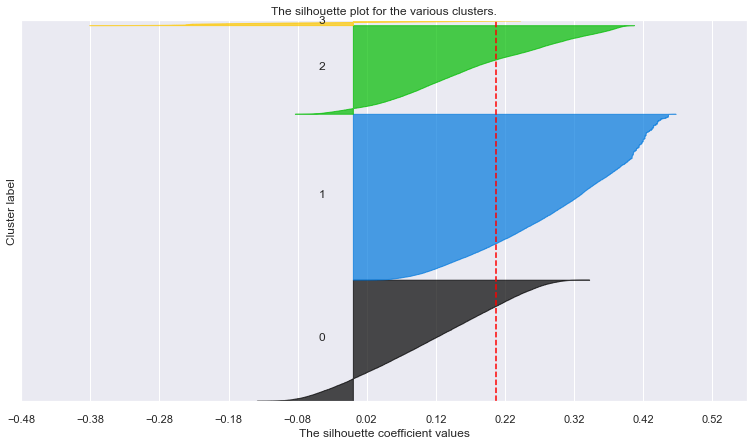

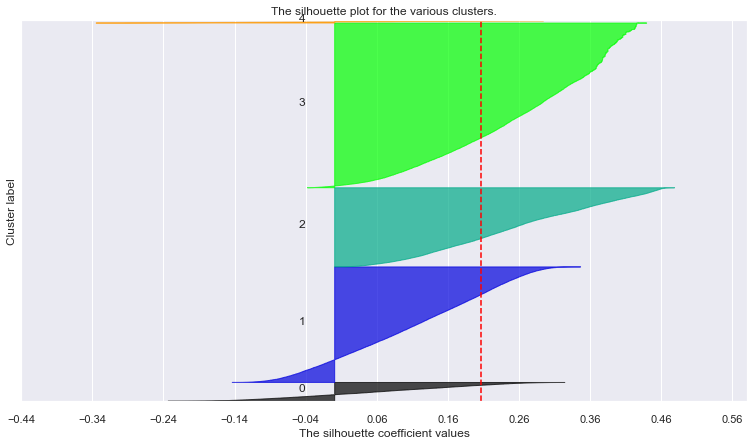

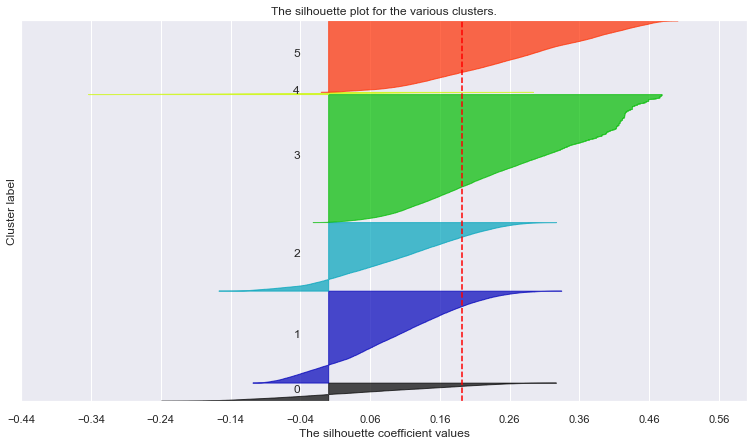

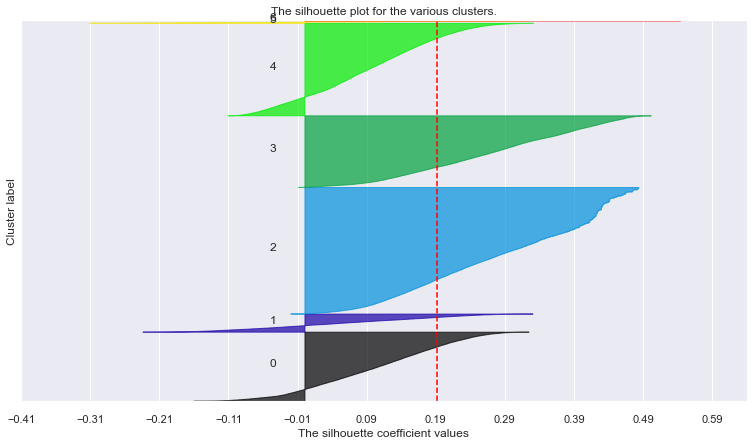

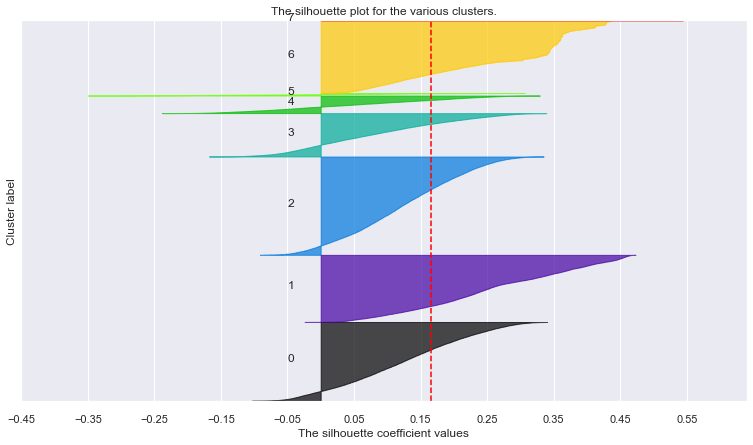

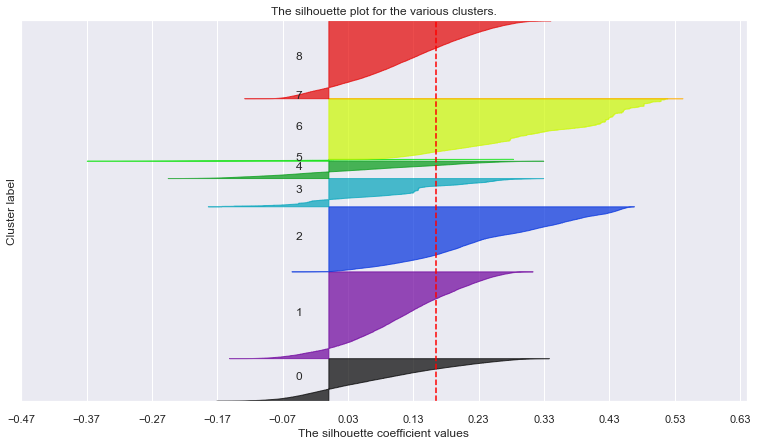

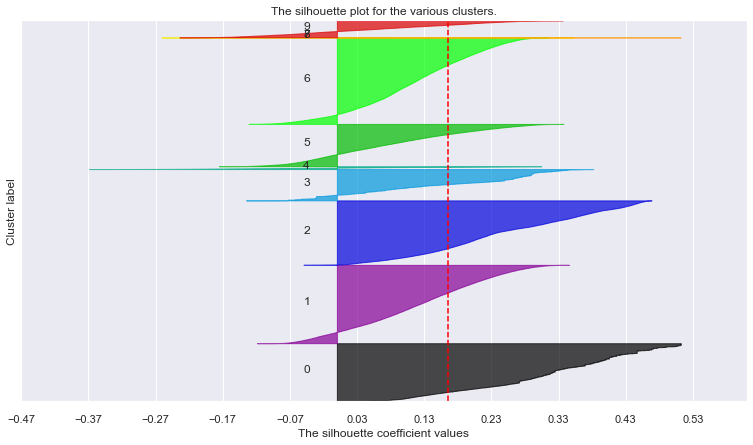

In [140]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_sum)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_sum, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_sum, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_sum) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

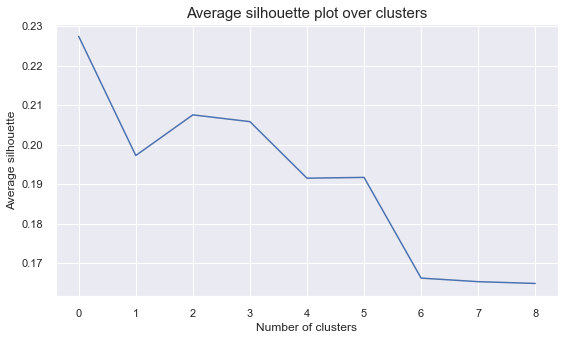

In [141]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

#4 to 6

From the graphs above, the optimal number of clusters for the demographic segmentation is 3. However, we have negative silhouette samples and for this reason, the clustering approach can be improved.

In [61]:
# Performing kmeans and appending the cluster labels to a new dataframe that keeps the cluster labels
clust_labels, cent = clus_Kmeans(df_sum, 3)
kmeans_sum_df = df_sum.copy()
kmeans_sum_df["kmeans_sum_labels"] = clust_labels

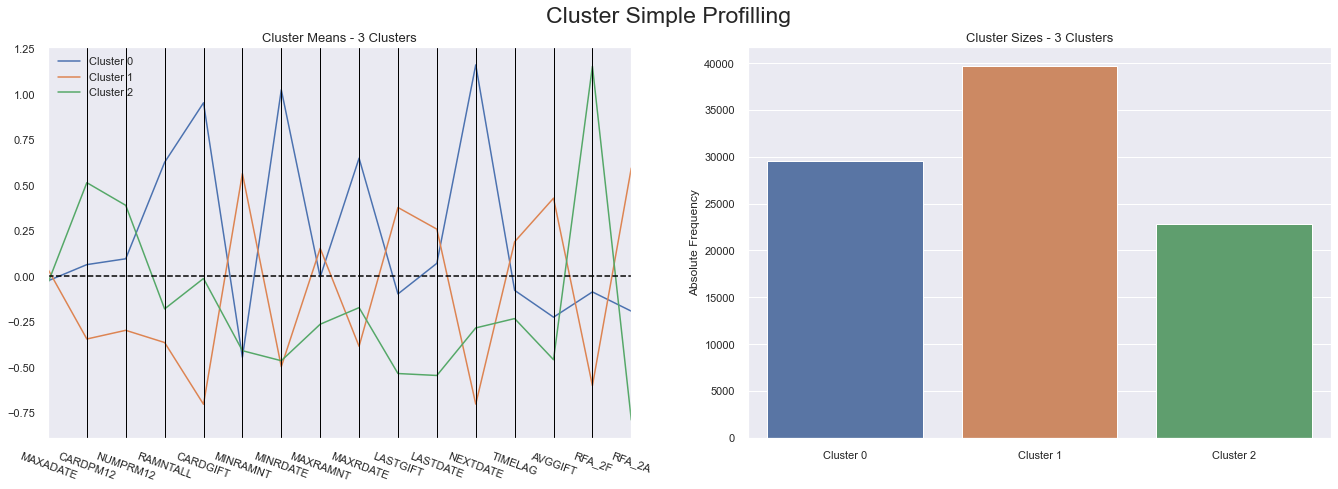

In [62]:
cluster_profiles(kmeans_sum_df, ["kmeans_sum_labels"], figsize=(23, 7))

In [63]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(kmeans_sum_df, ['kmeans_sum_labels']).drop('kmeans_sum_labels').sort_values()

#before

MAXADATE    0.001178
MAXRAMNT    0.027391
TIMELAG     0.030831
NUMPRM12    0.078715
LASTDATE    0.104284
CARDPM12    0.118228
LASTGIFT    0.135532
AVGGIFT     0.147832
RAMNTALL    0.191088
MAXRDATE    0.206477
MINRAMNT    0.242453
RFA_2A      0.319305
RFA_2F      0.488762
MINRDATE    0.496988
CARDGIFT    0.505239
NEXTDATE    0.666002
dtype: float64

In [64]:
#R2 score

r2(kmeans_sum_df, ["kmeans_sum_labels"])

0.26103828513125116

With this cluster we were able to see the most important variables for summary segmentation. We will only keep the variables that have an R2 score above 0.30. In the chapter "Clustering with the most important features" we will proceed our exploration.

In [67]:
summ = r2_variables(kmeans_sum_df, ['kmeans_sum_labels']).drop('kmeans_sum_labels').sort_values().tail(7).index.to_list()

#it was 8 before, number outliers decreased

In [68]:
summ

['MAXRDATE',
 'MINRAMNT',
 'RFA_2A',
 'RFA_2F',
 'MINRDATE',
 'CARDGIFT',
 'NEXTDATE']

<a class="anchor" id="nc_cen_pca">
   
<font size="4"><span style='color: PowderBlue '> **4.3.3. Census Features with pca**  </span></font>
    
</a>

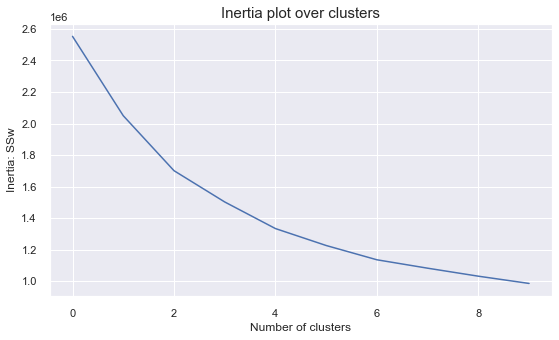

In [148]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_pca_cen[pca_feat_names])
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

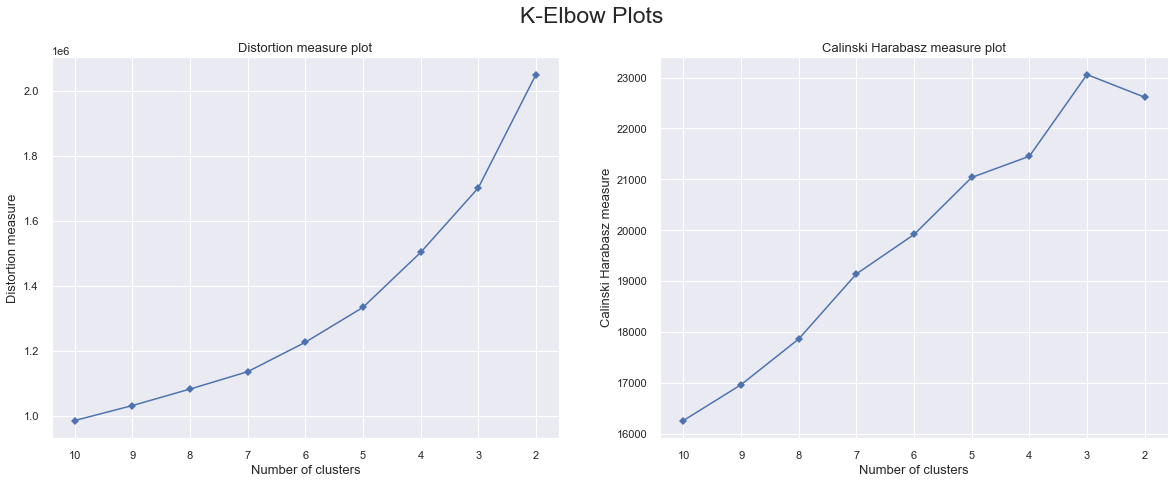

In [149]:
# Instantiate a scikit-learn K-Means model
clus_estim = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
# K-elbow plots
kelbowplots(clus_estim, df_pca_cen[pca_feat_names])

For n_clusters = 2, the average silhouette_score is : 0.20403763828281843
For n_clusters = 3, the average silhouette_score is : 0.20998732927634167
For n_clusters = 4, the average silhouette_score is : 0.20726195575023906
For n_clusters = 5, the average silhouette_score is : 0.21818525290849966
For n_clusters = 6, the average silhouette_score is : 0.2071206696375697
For n_clusters = 7, the average silhouette_score is : 0.2139799530227037
For n_clusters = 8, the average silhouette_score is : 0.20156450012751748
For n_clusters = 9, the average silhouette_score is : 0.176061742503682
For n_clusters = 10, the average silhouette_score is : 0.17613194214440595


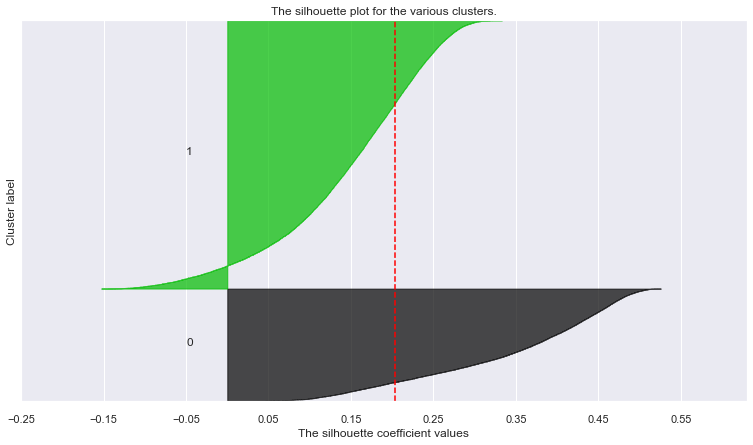

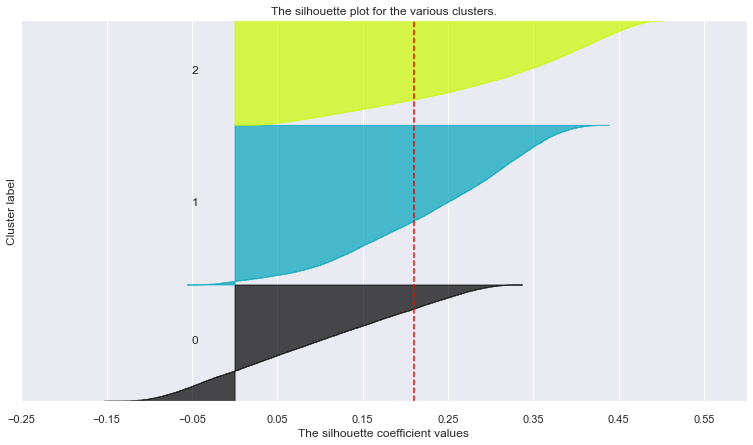

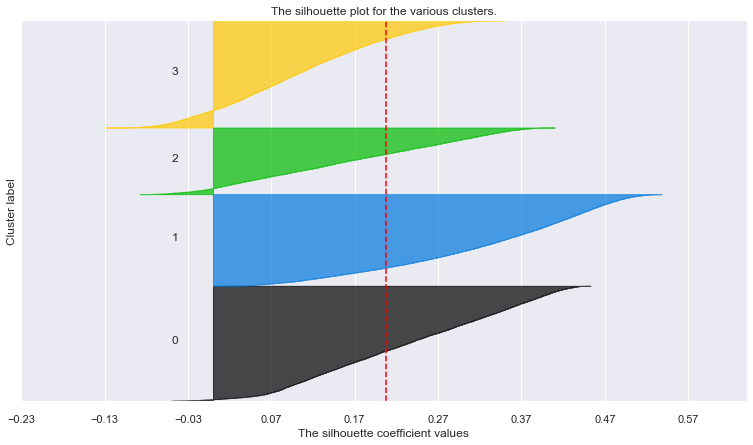

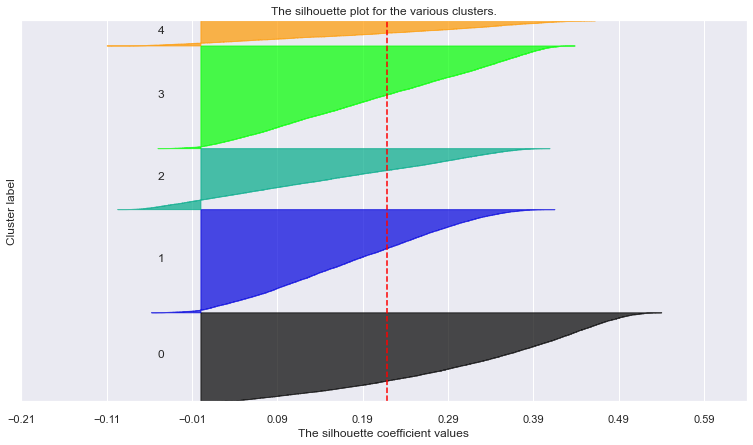

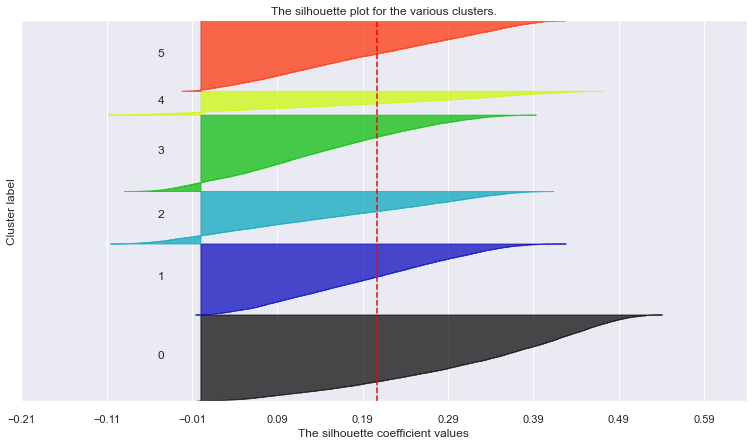

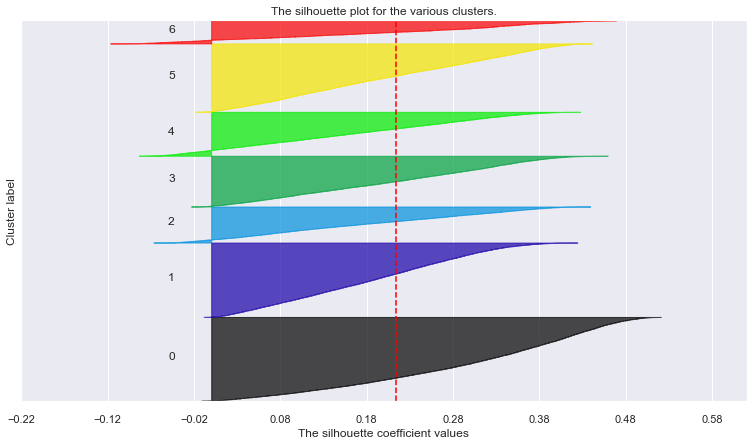

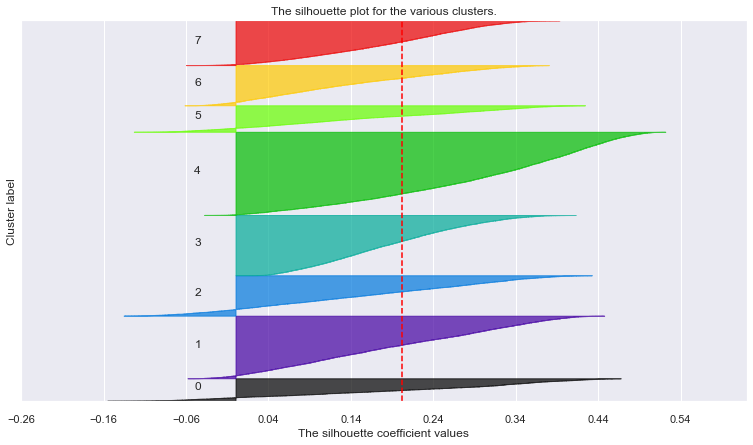

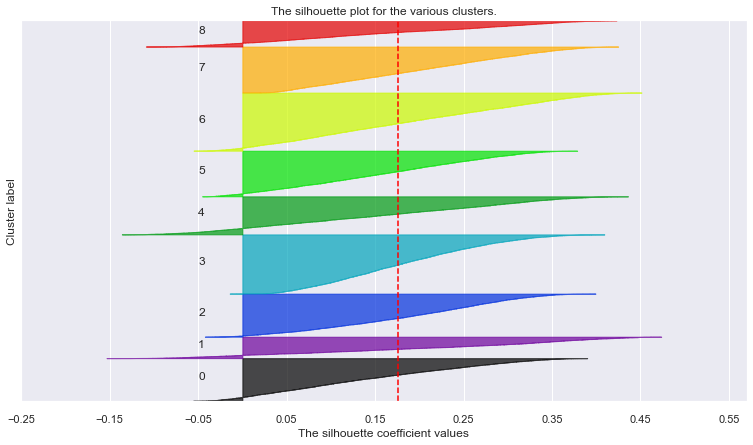

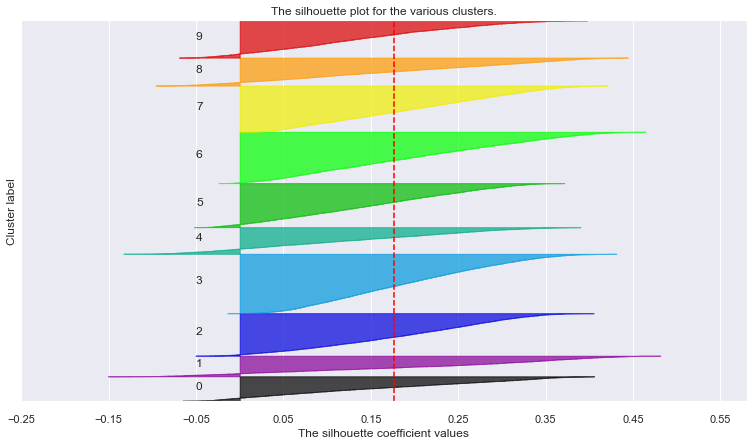

In [150]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_pca_cen[pca_feat_names])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_pca_cen[pca_feat_names], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca_cen[pca_feat_names], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_pca_cen[pca_feat_names]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

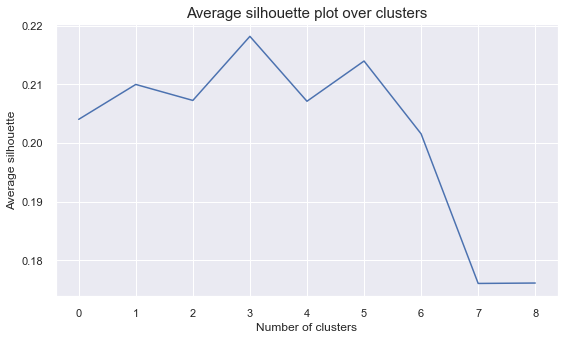

In [151]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [75]:
# Performing kmeans and appending the cluster labels to a new dataframe that keeps the cluster labels
clust_labels, cent = clus_Kmeans(df_pca_cen[pca_feat_names], 4)
kmeans_cen_df = df_pca_cen[pca_feat_names].copy()
kmeans_cen_df["kmeans_cen_labels"] = clust_labels

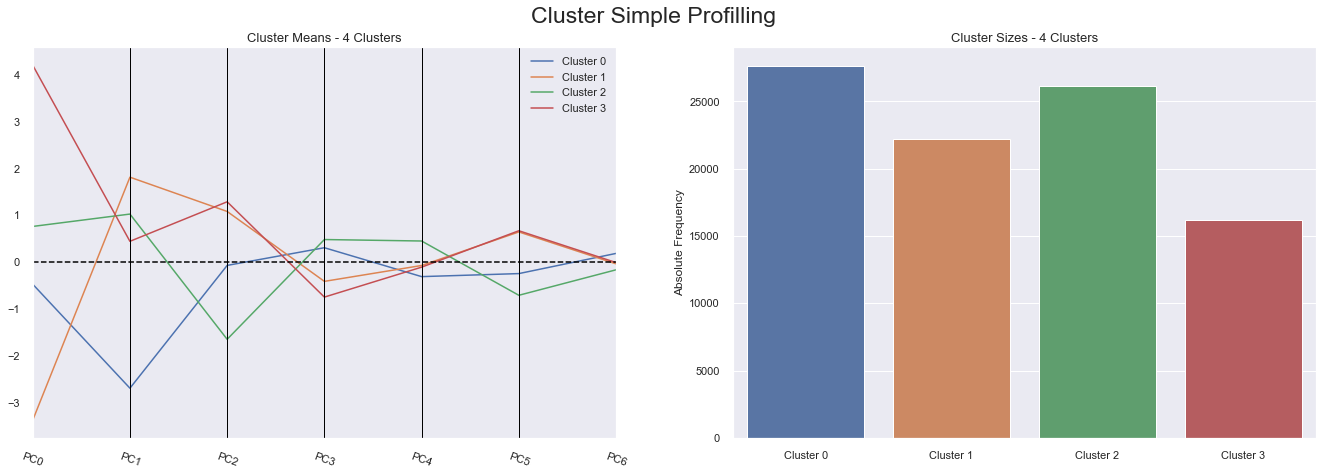

In [76]:
cluster_profiles(kmeans_cen_df, ["kmeans_cen_labels"], figsize=(23, 7))

In [77]:
#only PC0 AND PC1 worth keepin

In [78]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(kmeans_cen_df, ['kmeans_cen_labels']).drop('kmeans_cen_labels').sort_values()

PC6    0.010905
PC4    0.042396
PC3    0.059106
PC5    0.179685
PC2    0.319867
PC1    0.552318
PC0    0.766510
dtype: float64

<a class="anchor" id="nc_cen">
   
<font size="4"><span style='color: PowderBlue '> **4.3.4. Census Features**  </span></font>
    
</a>

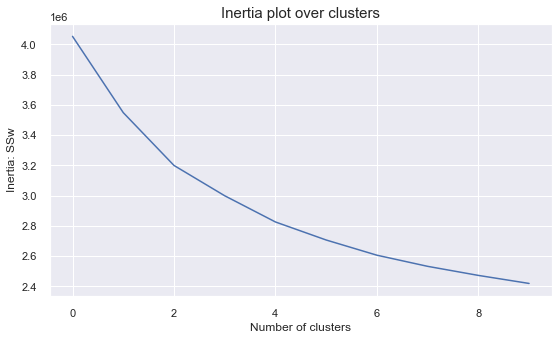

In [156]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_cen)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

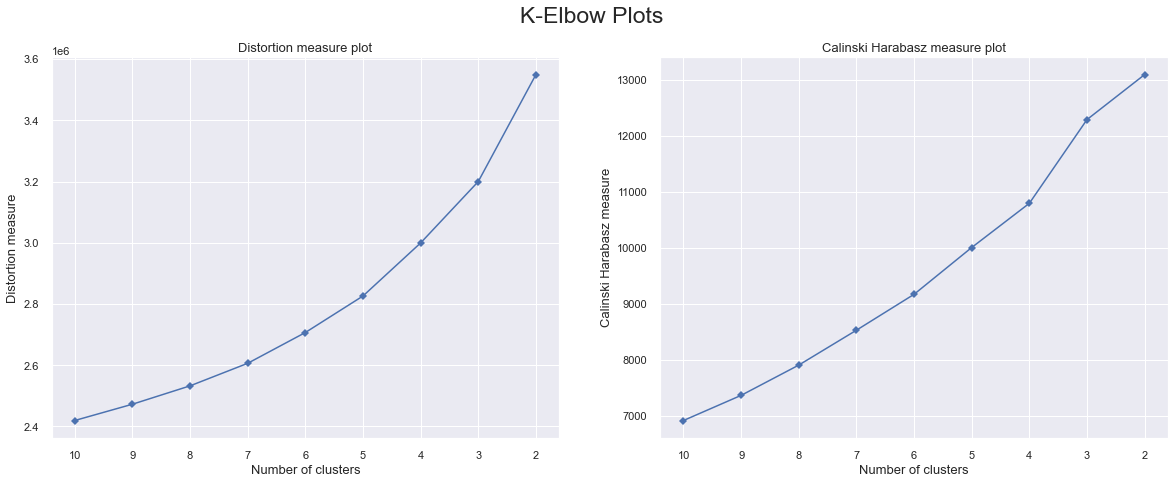

In [157]:
# Instantiate a scikit-learn K-Means model
clus_estim = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
# K-elbow plots
kelbowplots(clus_estim, df_cen)

For n_clusters = 2, the average silhouette_score is : 0.12695676909633075
For n_clusters = 3, the average silhouette_score is : 0.12308934042588256
For n_clusters = 4, the average silhouette_score is : 0.11821960757835286
For n_clusters = 5, the average silhouette_score is : 0.12151124407718887
For n_clusters = 6, the average silhouette_score is : 0.11510609196028412
For n_clusters = 7, the average silhouette_score is : 0.11757129332740825
For n_clusters = 8, the average silhouette_score is : 0.11615524089096287
For n_clusters = 9, the average silhouette_score is : 0.10156502747513733
For n_clusters = 10, the average silhouette_score is : 0.09317971487450764


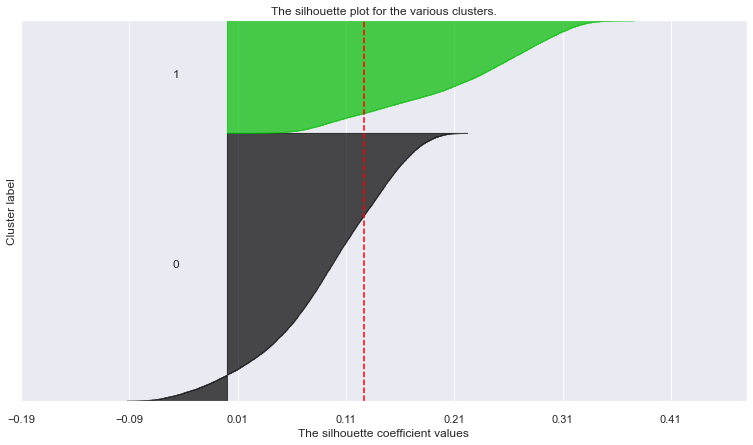

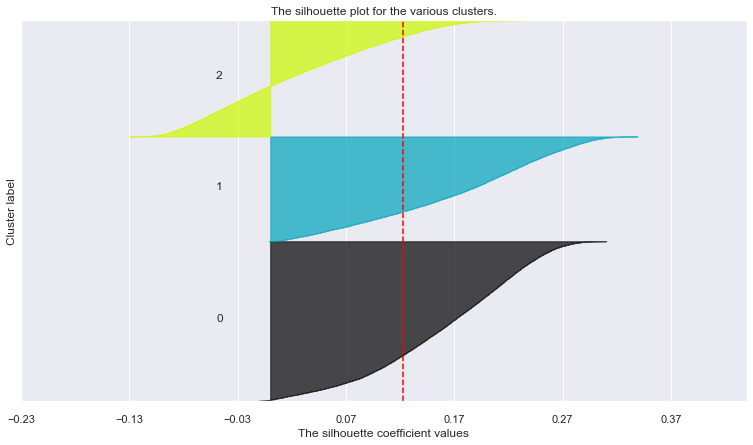

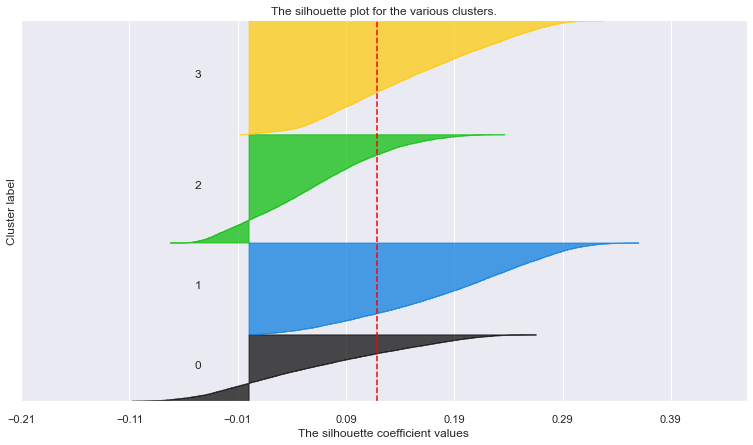

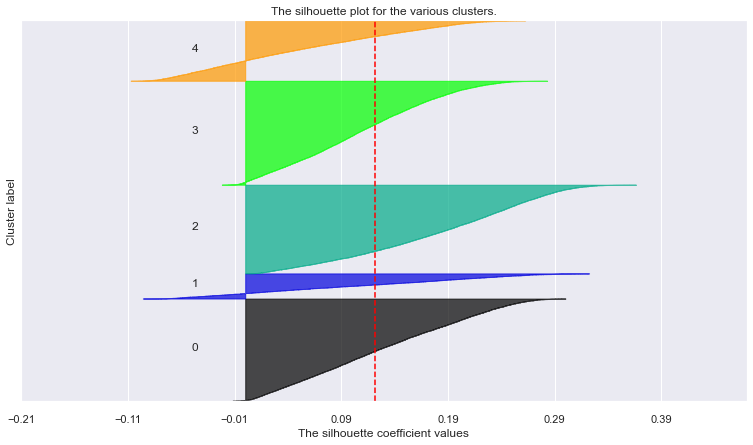

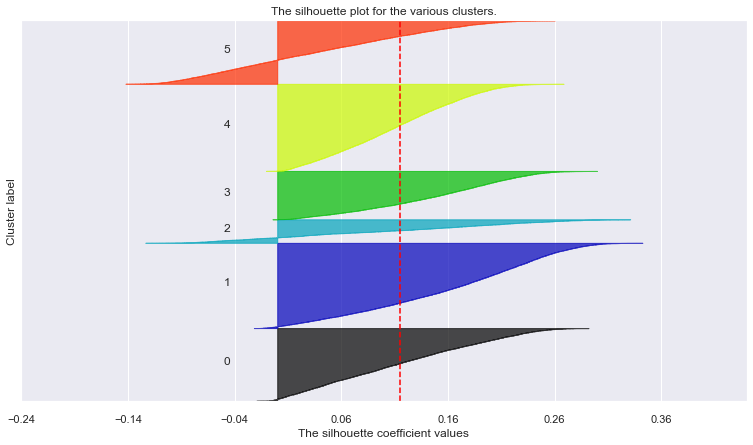

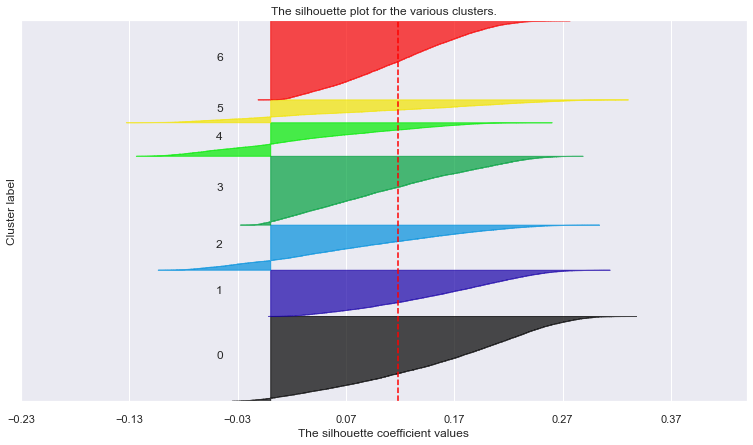

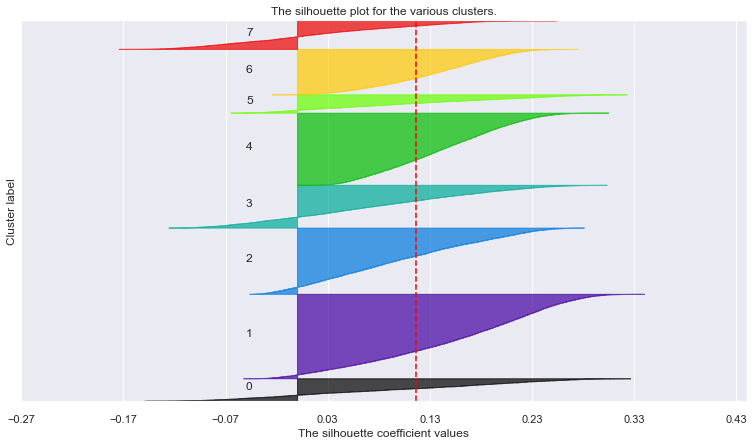

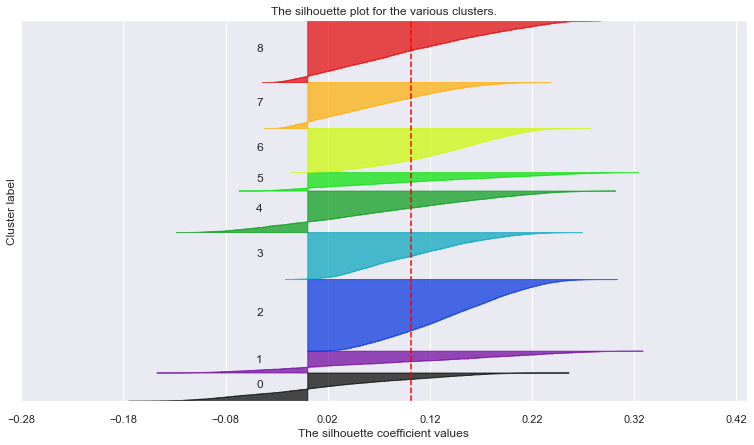

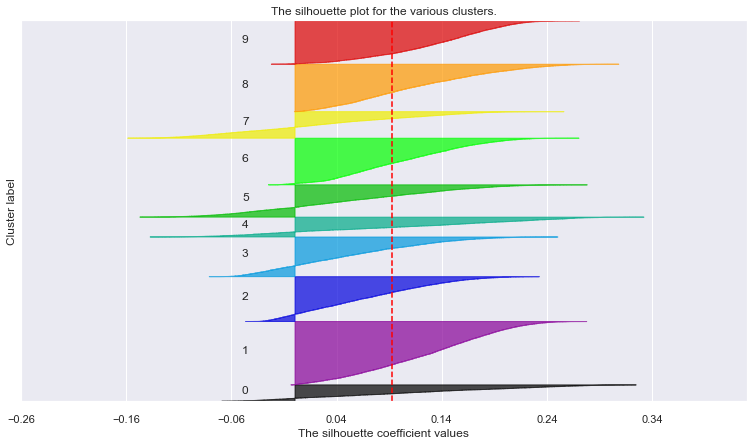

In [158]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_cen)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_cen, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_cen, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_cen) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

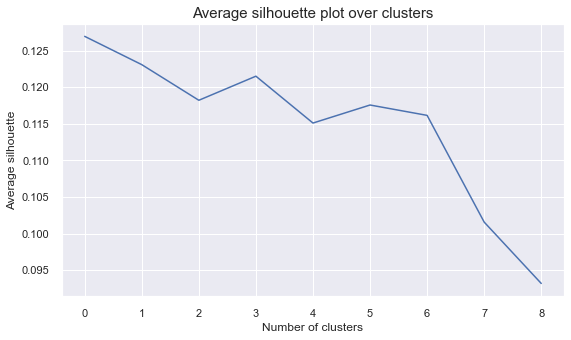

In [159]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

#3-5

In [81]:
# Performing kmeans and appending the cluster labels to a new dataframe that keeps the cluster labels
clust_labels, cent = clus_Kmeans(df_cen,5)
kmeans_cen_df = df_cen.copy()
kmeans_cen_df["kmeans_cen_labels"] = clust_labels

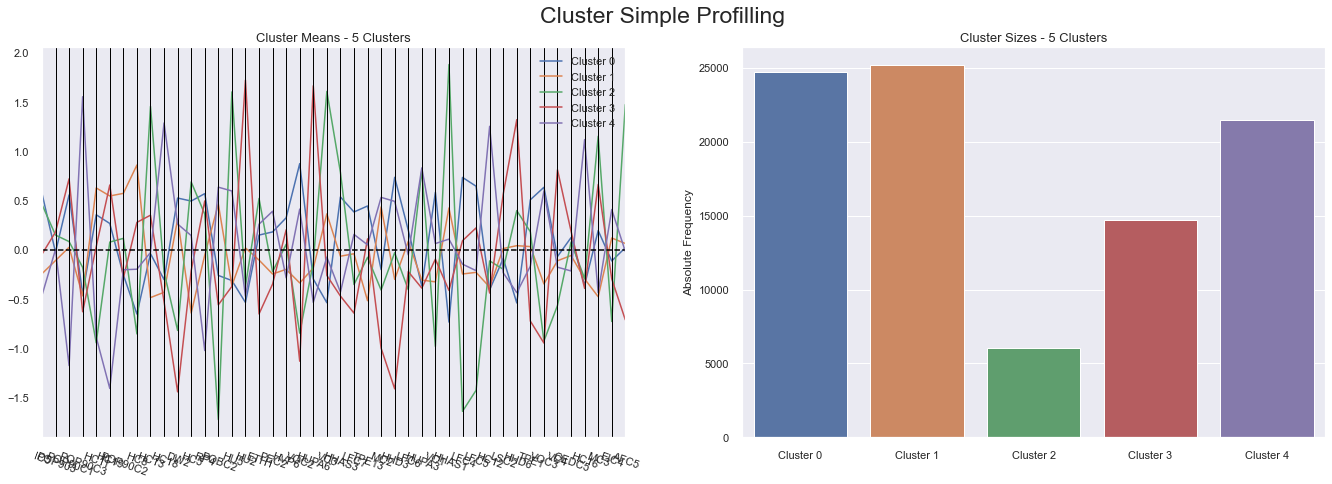

In [82]:
cluster_profiles(kmeans_cen_df, ["kmeans_cen_labels"], figsize=(23, 7))

In [83]:
#R2 score

r2(kmeans_cen_df, ["kmeans_cen_labels"])

0.3389349577090659

In [84]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(kmeans_cen_df, ['kmeans_cen_labels']).drop('kmeans_cen_labels').sort_values()

POP903     0.010112
OEDC5      0.021870
LFC6       0.031892
HVP6       0.064724
LSC2       0.068364
PEC2       0.083649
EIC4       0.095168
ETH1       0.110432
LFC7       0.119896
TPE13      0.128843
POP90C2    0.130705
VC4        0.138424
TPE1       0.161880
IC5        0.168940
VC1        0.186073
HHAS3      0.197412
HC5        0.221481
HC13       0.224301
AFC5       0.225260
MC3        0.274078
LFC5       0.278408
HUPA3      0.290296
VC3        0.296202
MC2        0.298982
HU5        0.336678
LFC4       0.344655
RP4        0.379926
HC16       0.380396
HC11       0.384381
HC8        0.385770
HHD6       0.411860
POBC2      0.417100
VOC3       0.423570
HHAS1      0.456494
HC12       0.481738
POP90C1    0.489116
DW2        0.492751
HC18       0.509771
VOC2       0.527412
HUPA6      0.543416
HHD3       0.544417
HU2        0.611709
HC19       0.632604
POP90C3    0.742265
dtype: float64

With this cluster we were able to see the most important variables for census segmentation. We will only keep the variables that have an R2 score above 0.50. In the chapter "Clustering with the most important features" we will proceed our exploration.

In [100]:
census = r2_variables(kmeans_cen_df, ['kmeans_cen_labels']).drop('kmeans_cen_labels').sort_values().tail(8).index.to_list()

In [101]:
census    

['DW2', 'HC18', 'VOC2', 'HUPA6', 'HHD3', 'HU2', 'HC19', 'POP90C3']


<a class="anchor" id="most_imp_cl">
   
<font size="6"><span style='color: LightSkyBlue  '> **4.4. Clustering with the most important features**  </span></font>
    
</a>

In [96]:
df_dem

AGE   NUMCHLD    GENDER    INCOME
CONTROLN                                        
95515     0.063799 -0.360567 -0.863103 -0.480446
148535   -0.961543  1.301660  0.821539  1.319946
15078     0.132155 -0.360567  0.821539 -0.480446
172556    0.679004 -0.360567 -0.863103 -1.680707
7112      1.225853  1.301660 -0.863103 -0.480446
...            ...       ...       ...       ...
184568    0.132155 -0.360567  0.821539 -0.480446
122706   -0.824831  1.301660  0.821539  1.920077
189641   -0.004557 -0.360567  0.821539 -0.480446
4693     -0.141269 -0.360567 -0.863103  1.920077
185114    1.362565 -0.360567 -0.863103  0.719816

[92127 rows x 4 columns]

In [102]:
#will only keep the most interesting variables for our analysis
#census = ['POP90C1', 'HU2','HHD3','POP90C3']
df_cen2 = df_cen[census] 
df_cen2

DW2      HC18      VOC2     HUPA6      HHD3       HU2  \
CONTROLN                                                               
95515     1.103980  1.854784  0.893588 -0.622877  0.700145 -0.754811   
148535    1.260258 -0.571779  1.731285 -0.622877  1.879412 -1.240196   
15078     0.088178  2.302765  0.223431 -0.453071  0.372571 -0.366504   
172556    0.635149  2.302765 -1.005191 -0.622877  0.110512  1.089649   
7112      1.221188 -0.534447 -0.893498 -0.622877 -0.675666 -0.948965   
...            ...       ...       ...       ...       ...       ...   
184568   -1.122970 -0.310457 -0.055802  0.056350 -0.217062  0.701342   
122706    0.830495  0.585505  1.284513 -0.622877  1.682867 -0.851888   
189641    1.103980 -0.571779 -1.061038 -0.622877 -1.068755  0.215958   
4693      1.260258 -0.571779  1.340359 -0.622877  0.765660 -0.851888   
185114    1.064911 -0.347788  1.116974 -0.622877  1.355293 -0.997504   

              HC19   POP90C3  
CONTROLN                      
95515    -0.925030  0.960055  
148535    0.754891 -0.658154  
15078    -1.579914  1.781607  
172556   -1.437548  1.632234  
7112     -1.466021 -0.658154  
...            ...       ...  
184568    0.726418 -0.658154  
122706   -0.156252 -0.558572  
189641    0.754891 -0.658154  
4693      0.754891 -0.658154  
185114    0.470159 -0.658154  

[92127 rows x 8 columns]

In [103]:
df_sum2= df_sum[summ]
df_sum2

MAXRDATE  MINRAMNT    RFA_2A    RFA_2F  MINRDATE  CARDGIFT  NEXTDATE
CONTROLN                                                                      
95515     0.448061 -0.361010 -0.976371  1.958852  0.123641  1.991554  0.713713
148535   -0.628340  0.256561  1.404899  0.088903 -0.315937 -0.895798 -0.983982
15078     1.382661 -0.731552 -0.976371  1.958852  0.406374  1.991554  0.433963
172556    0.008155 -0.731552 -0.976371  1.958852  1.913940  0.436826  1.491708
7112     -0.678293 -0.608038  0.214264  0.088903 -0.315937  0.658930  3.996653
...            ...       ...       ...       ...       ...       ...       ...
184568   -0.728246  2.109274  1.404899 -0.846072 -1.196124 -1.117902 -1.247275
122706   -0.774976  1.491703  0.214264 -0.846072 -1.226048 -1.117902 -1.160425
189641   -0.090140 -0.608038 -0.976371  1.023878 -1.226048 -0.229486 -0.901702
4693     -1.021517 -0.361010  0.214264  1.958852  0.783008  2.879970  1.687350
185114    0.547966  0.256561  1.404899 -0.846072  1.505318  1.325242  1.212873

[92127 rows x 7 columns]

<hr>
<a class="anchor" id="k_means">
    
<font size="6"><span style='color: LightSkyBlue'> **4.5. K-Means**  </span></font>
    
</a>


<a class="anchor" id="k_dem">
   
<font size="4"><span style='color: PowderBlue '> **4.5.1. Demographic Features**  </span></font>
    
</a>

In [105]:
# Performing kmeans and appending the cluster labels to a new dataframe that keeps the cluster labels
clust_labels, cent = clus_Kmeans(df_dem, 5)
kmeans_dem2_df = df_dem.copy()
kmeans_dem2_df["kmeans_dem2_labels"] = clust_labels

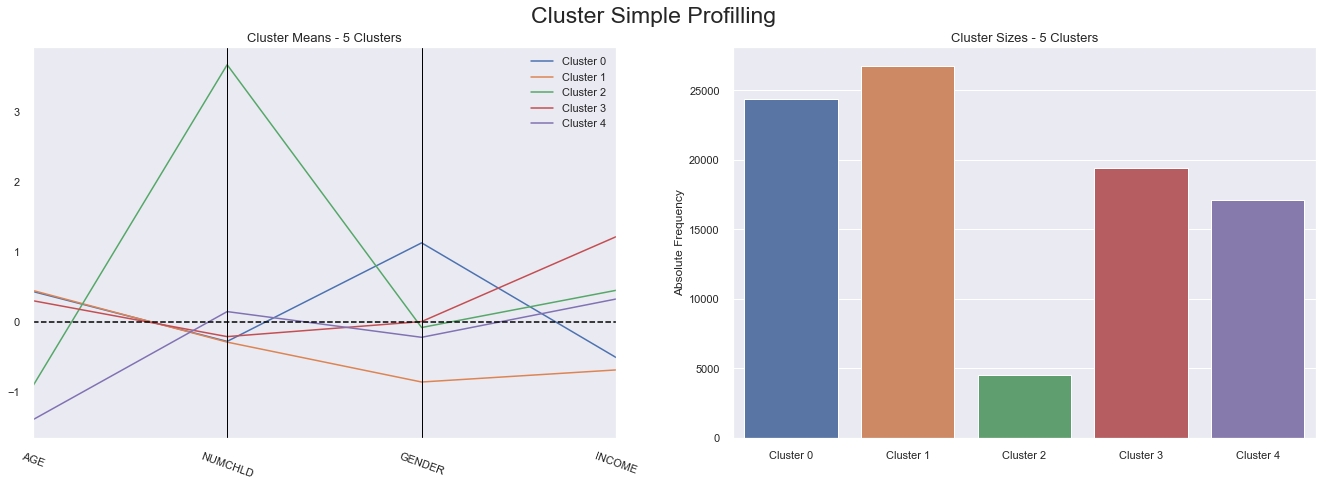

In [106]:
cluster_profiles(kmeans_dem2_df, ["kmeans_dem2_labels"], figsize=(23, 7))

Cluster 0 -> young group of people, highest number of children, homeowner, mixed group of female and male people and highest bound of income 

Cluster 1 -> middle group in terms of age, no kids, not a homeowner, male, slightly above the lower boundary of income

Cluster 2 -> youngest group, with a big number of children, is a homeowner, mixed group of female and male people and has the second highest income.

Cluster 3 -> oldest group, a few number of kids, is a homeowner, mixed group of female and male people and the lower bound of income

Cluster 4 -> middle group in terms of age, no kids, not a homeowner, female and the lower bound of income


In [107]:
#R2 score

r2(kmeans_dem2_df, ["kmeans_dem2_labels"])

0.7364864817967436

In [108]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(kmeans_dem2_df, ['kmeans_dem2_labels']).drop('kmeans_dem2_labels').sort_values()

AGE        0.531706
INCOME     0.546079
GENDER     0.559861
NUMCHLD    0.717029
dtype: float64

<a class="anchor" id="k_cen">
   
<font size="4"><span style='color: PowderBlue '> **4.5.2. Census Features**  </span></font>
    
</a>

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0.
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.335
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold

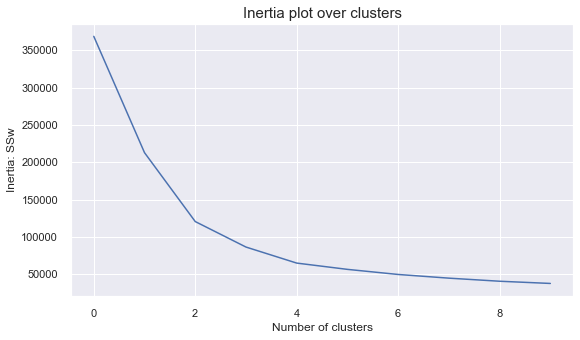

In [58]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_cen2)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

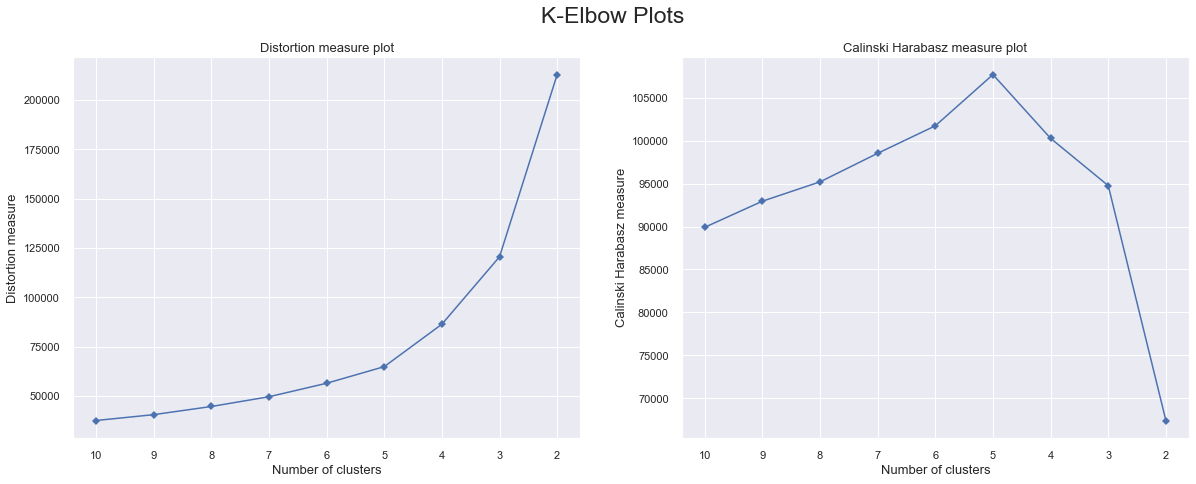

In [59]:
# Instantiate a scikit-learn K-Means model
clus_estim = KMeans(n_clusters=10, init='k-means++', n_init=15, random_state=1)
# K-elbow plots
kelbowplots(clus_estim, df_cen2)

For n_clusters = 2, the average silhouette_score is : 0.4301097323691215
For n_clusters = 3, the average silhouette_score is : 0.468008371552062
For n_clusters = 4, the average silhouette_score is : 0.5003045902272547
For n_clusters = 5, the average silhouette_score is : 0.46616100074417727


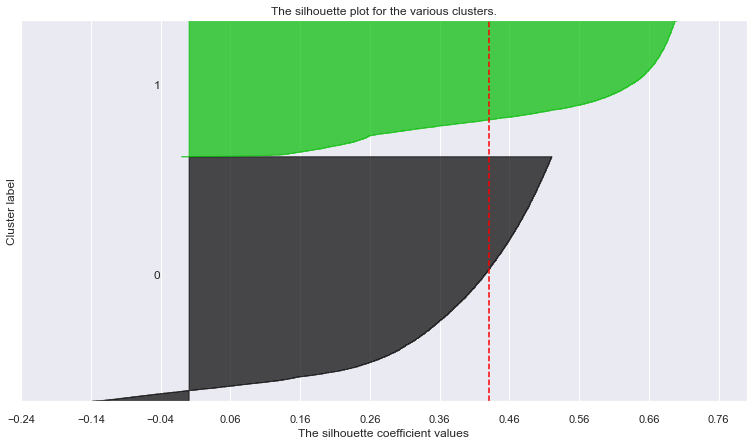

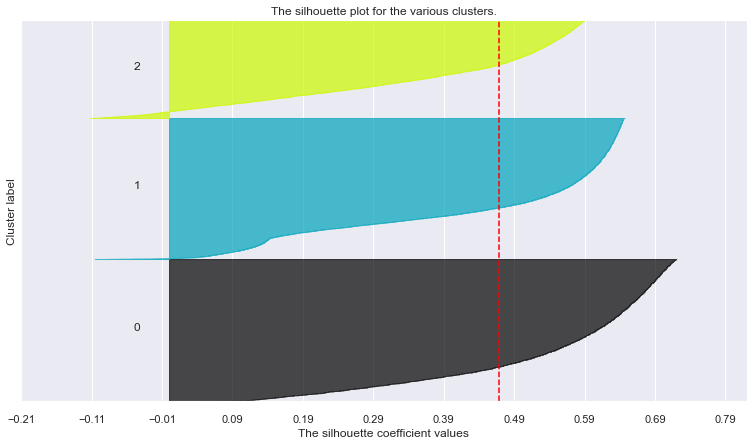

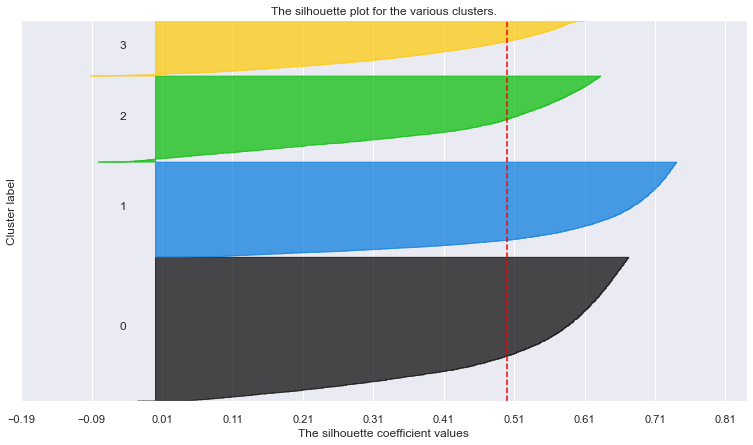

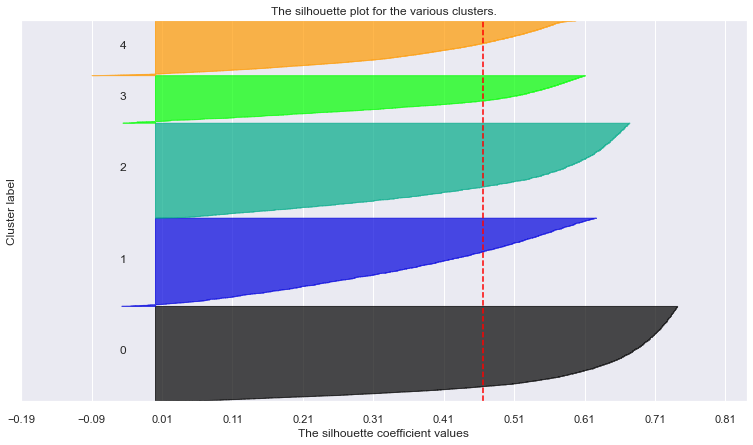

In [187]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range(1,6):
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_cen2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_cen2, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_cen2, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_cen2) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))
    
#

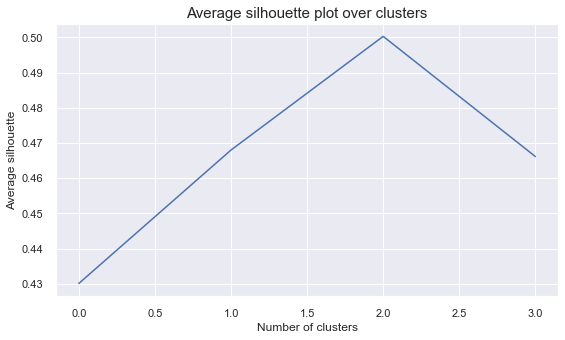

In [188]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [113]:
# Performing kmeans and appending the cluster labels to a new dataframe that keeps the cluster labels
clust_labels, cent = clus_Kmeans(df_cen2, 3)
kmeans_cen2_df = df_cen2.copy()
kmeans_cen2_df["kmeans_cen2_labels"] = clust_labels

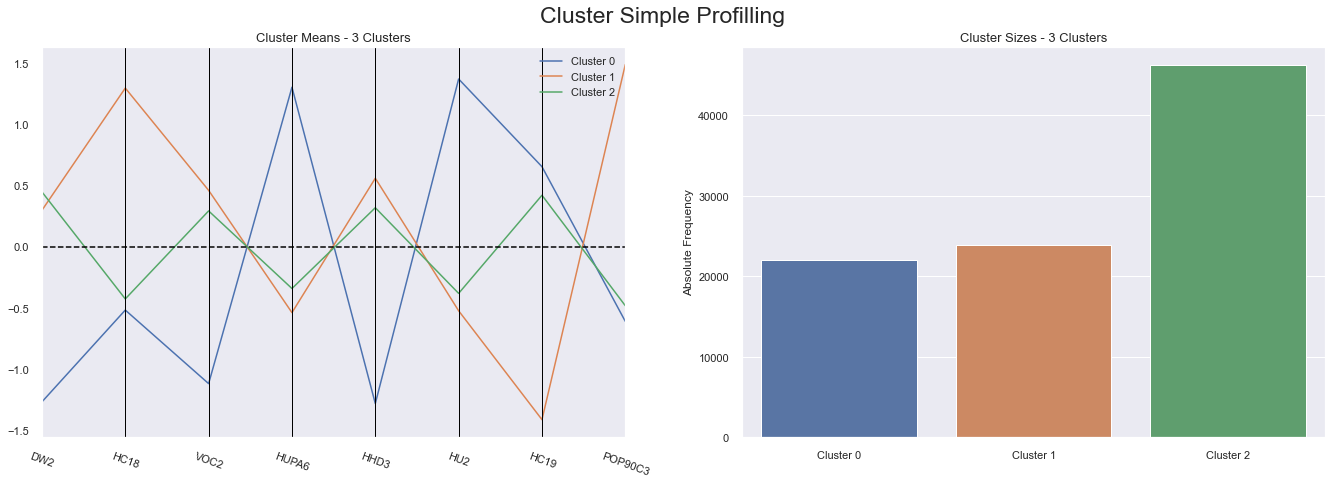

In [114]:
cluster_profiles(kmeans_cen2_df, ["kmeans_cen2_labels"], figsize=(23, 7))


Cluster 0 -> urban area, high percentage of renter occupied units, almost no Married Couple Families, non Rural Area 

Cluster 1 -> urban area, very low percentage of renter occupied units, a lot of Married Couple Families, male, non rural area

Cluster 2 -> non urban area, very low percentage of renter occupied units, great number of Married Couple Families, Rural Area

Cluster 3 -> non urban area, a slightly significant percentage of renter occupied units, some Married Couple Families, group with a few people in a rural area



In [115]:
#R2 score

r2(kmeans_cen2_df, ["kmeans_cen2_labels"])

0.6142689074165884

In [116]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(kmeans_cen2_df, ['kmeans_cen2_labels']).drop('kmeans_cen2_labels').sort_values()

VOC2       0.397709
DW2        0.508402
HHD3       0.525456
HUPA6      0.540615
HC18       0.593728
HU2        0.593862
HC19       0.711795
POP90C3    0.783806
dtype: float64

<a class="anchor" id="k_sum">
   
<font size="4"><span style='color: PowderBlue '> **4.5.3. Summary Features**  </span></font>
    
</a>

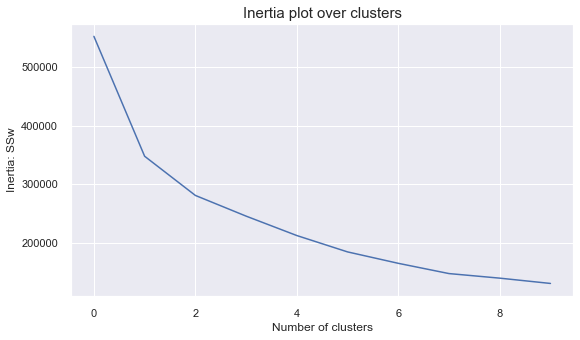

In [63]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_sum2)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

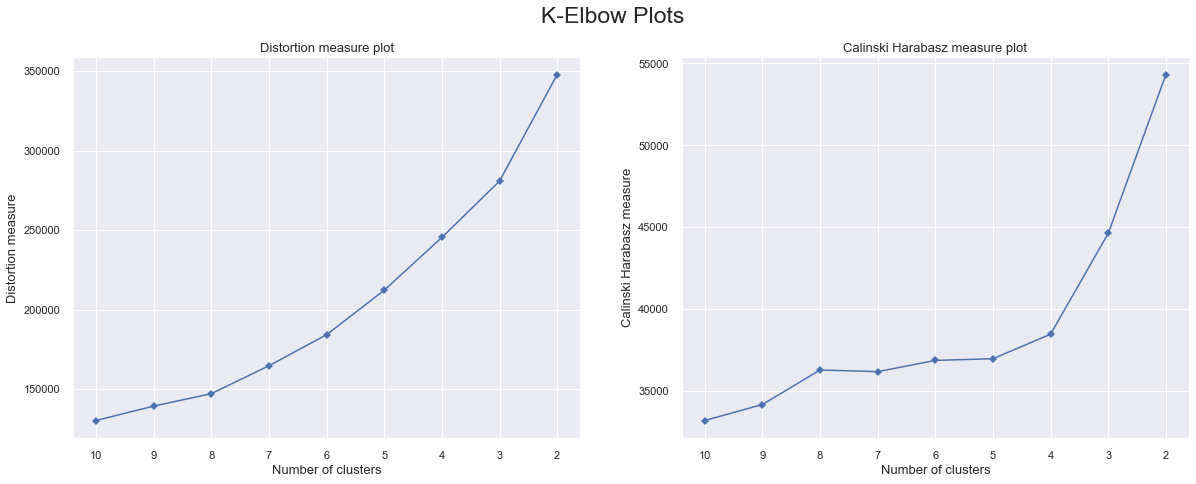

In [64]:
# Instantiate a scikit-learn K-Means model
clus_estim = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
# K-elbow plots
kelbowplots(clus_estim, df_sum2)

For n_clusters = 2, the average silhouette_score is : 0.3681781646971131
For n_clusters = 3, the average silhouette_score is : 0.36407139515462694
For n_clusters = 4, the average silhouette_score is : 0.3343852990537593
For n_clusters = 5, the average silhouette_score is : 0.31830629200398625


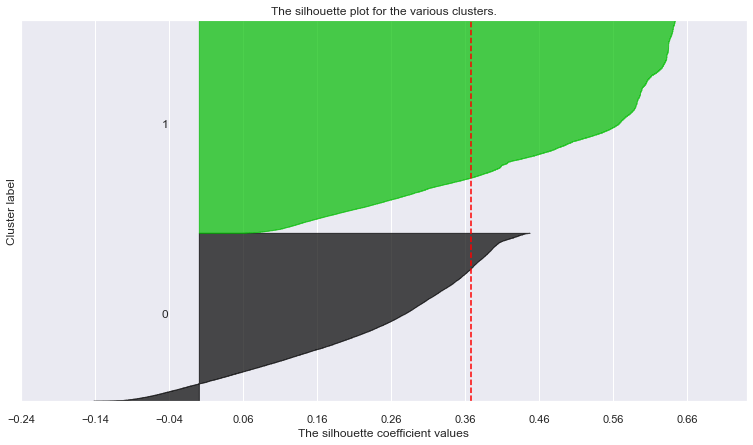

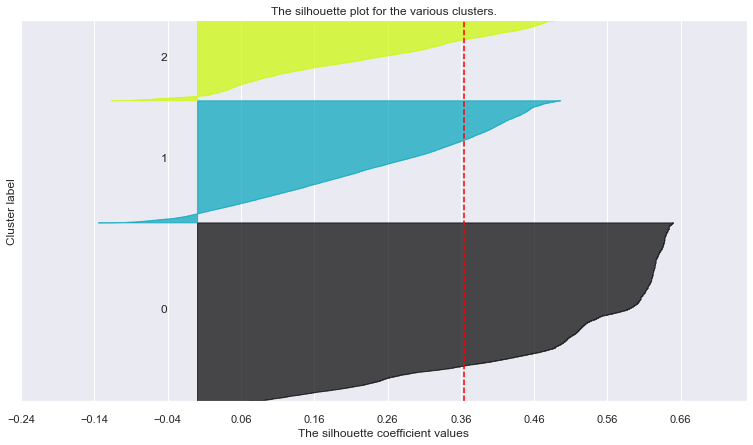

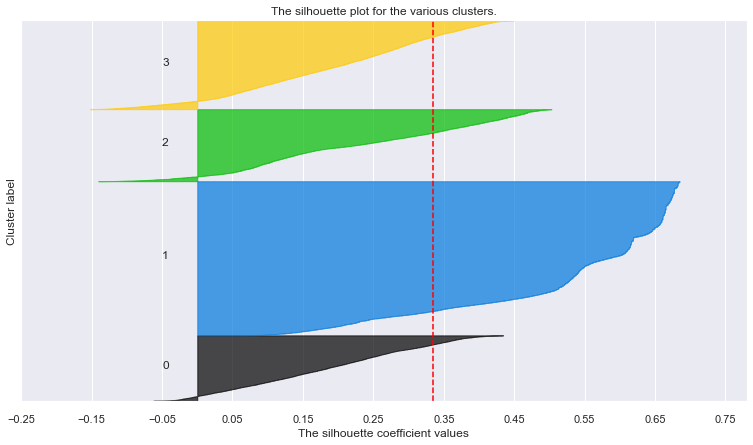

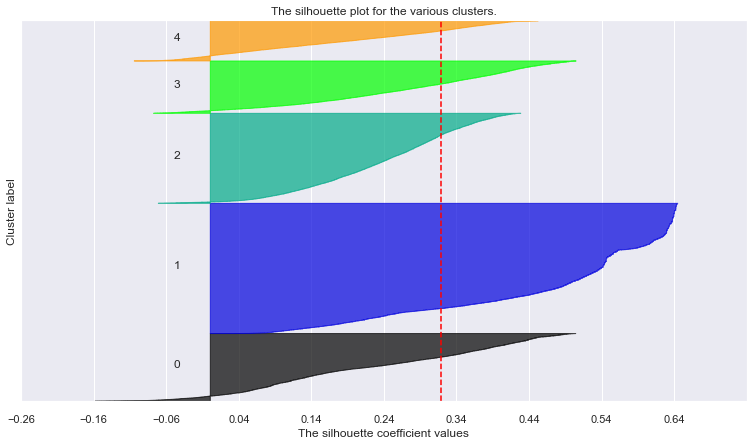

In [195]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range(1,6):
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_sum2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_sum2, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_sum2, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_sum2) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

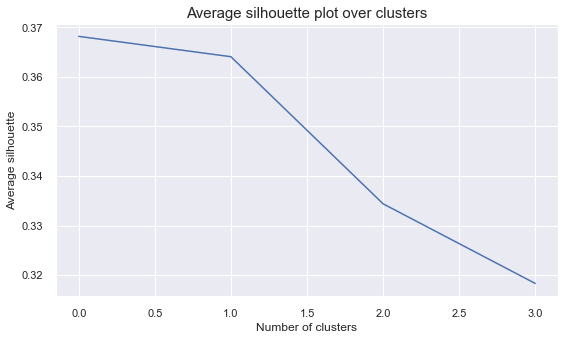

In [196]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

#3 ou 4

In [119]:
# Performing kmeans and appending the cluster labels to a new dataframe that keeps the cluster labels
clust_labels, cent = clus_Kmeans(df_sum2, 4)
kmeans_sum2_df = df_sum2.copy()
kmeans_sum2_df["kmeans_sum2_labels"] = clust_labels

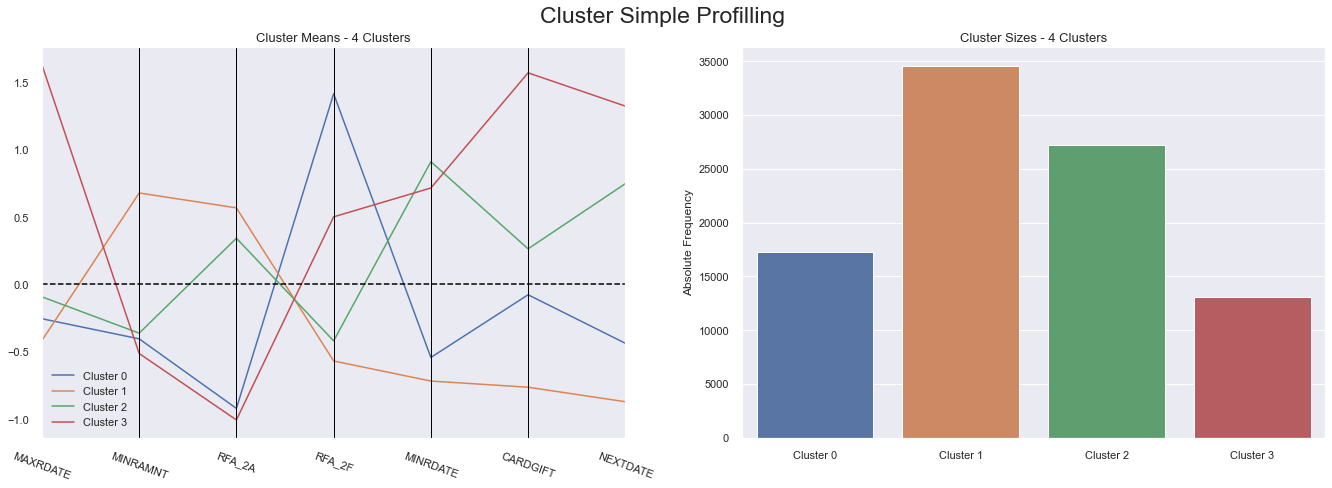

In [120]:
cluster_profiles(kmeans_sum2_df, ["kmeans_sum2_labels"], figsize=(23, 7))

Cluster 0 -> spent the least in the largest gift to date, spent the least money in the most recent gift, lowest average dollar amount of gifts to date, upper group of date of second gift (did it the most recent time), first position with the highest number of lifetime gifts to card promotions to date, group with PEP star RFA status

out:'middle group of money spent in all the lifetime gifts to date, spent the least money in the last promotion (RFA_2), '

Cluster 1 -> middle group of money spent in the largest gift to date, middle group of money spent in the most recent gift, middle group in the average dollar amount of gifts to date, date of second gift took in the last place in this dataset, last position with the highest number of lifetime gifts to card promotions to date, group with no PEP star RFA status

out:'spent the least money in all the lifetime gifts to date, middle group of money spent in the last promotion (RFA_2), '

Cluster 2 -> spent the most in the largest gift to date, spent the most money in the most recent gift, highest average dollar amount of gifts to date, middle group of date of second gift, second position with the highest number of lifetime gifts to card promotions to date, mixed group with PEP star RFA status

out:'spent the most money in all the lifetime gifts to date, spent the most money in the last promotion (RFA_2), '

In [121]:
#R2 score

r2(kmeans_sum2_df, ["kmeans_sum2_labels"])

0.5777825035912171

In [122]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(kmeans_sum2_df, ['kmeans_sum2_labels']).drop('kmeans_sum2_labels').sort_values()

MINRAMNT    0.279474
MAXRDATE    0.455327
RFA_2A      0.458062
MINRDATE    0.565972
RFA_2F      0.584575
CARDGIFT    0.589194
NEXTDATE    0.733376
dtype: float64

<a class="anchor" id="final_cat">
   
<font size="4"><span style='color: PowderBlue '> **4.5.4. Visualize Category Final Dataframes**  </span></font>
    
</a>

In [126]:
df_dem

AGE   NUMCHLD    GENDER    INCOME
CONTROLN                                        
95515     0.063799 -0.360567 -0.863103 -0.480446
148535   -0.961543  1.301660  0.821539  1.319946
15078     0.132155 -0.360567  0.821539 -0.480446
172556    0.679004 -0.360567 -0.863103 -1.680707
7112      1.225853  1.301660 -0.863103 -0.480446
...            ...       ...       ...       ...
184568    0.132155 -0.360567  0.821539 -0.480446
122706   -0.824831  1.301660  0.821539  1.920077
189641   -0.004557 -0.360567  0.821539 -0.480446
4693     -0.141269 -0.360567 -0.863103  1.920077
185114    1.362565 -0.360567 -0.863103  0.719816

[92127 rows x 4 columns]

In [127]:
df_sum2

MAXRDATE  MINRAMNT    RFA_2A    RFA_2F  MINRDATE  CARDGIFT  NEXTDATE
CONTROLN                                                                      
95515     0.448061 -0.361010 -0.976371  1.958852  0.123641  1.991554  0.713713
148535   -0.628340  0.256561  1.404899  0.088903 -0.315937 -0.895798 -0.983982
15078     1.382661 -0.731552 -0.976371  1.958852  0.406374  1.991554  0.433963
172556    0.008155 -0.731552 -0.976371  1.958852  1.913940  0.436826  1.491708
7112     -0.678293 -0.608038  0.214264  0.088903 -0.315937  0.658930  3.996653
...            ...       ...       ...       ...       ...       ...       ...
184568   -0.728246  2.109274  1.404899 -0.846072 -1.196124 -1.117902 -1.247275
122706   -0.774976  1.491703  0.214264 -0.846072 -1.226048 -1.117902 -1.160425
189641   -0.090140 -0.608038 -0.976371  1.023878 -1.226048 -0.229486 -0.901702
4693     -1.021517 -0.361010  0.214264  1.958852  0.783008  2.879970  1.687350
185114    0.547966  0.256561  1.404899 -0.846072  1.505318  1.325242  1.212873

[92127 rows x 7 columns]

In [128]:
df_cen2

DW2      HC18      VOC2     HUPA6      HHD3       HU2  \
CONTROLN                                                               
95515     1.103980  1.854784  0.893588 -0.622877  0.700145 -0.754811   
148535    1.260258 -0.571779  1.731285 -0.622877  1.879412 -1.240196   
15078     0.088178  2.302765  0.223431 -0.453071  0.372571 -0.366504   
172556    0.635149  2.302765 -1.005191 -0.622877  0.110512  1.089649   
7112      1.221188 -0.534447 -0.893498 -0.622877 -0.675666 -0.948965   
...            ...       ...       ...       ...       ...       ...   
184568   -1.122970 -0.310457 -0.055802  0.056350 -0.217062  0.701342   
122706    0.830495  0.585505  1.284513 -0.622877  1.682867 -0.851888   
189641    1.103980 -0.571779 -1.061038 -0.622877 -1.068755  0.215958   
4693      1.260258 -0.571779  1.340359 -0.622877  0.765660 -0.851888   
185114    1.064911 -0.347788  1.116974 -0.622877  1.355293 -0.997504   

              HC19   POP90C3  
CONTROLN                      
95515    -0.925030  0.960055  
148535    0.754891 -0.658154  
15078    -1.579914  1.781607  
172556   -1.437548  1.632234  
7112     -1.466021 -0.658154  
...            ...       ...  
184568    0.726418 -0.658154  
122706   -0.156252 -0.558572  
189641    0.754891 -0.658154  
4693      0.754891 -0.658154  
185114    0.470159 -0.658154  

[92127 rows x 8 columns]

<a class="anchor" id="merge_cat">
   
<font size="4"><span style='color: PowderBlue '> **4.5.5 Merge Categories**  </span></font>
    
</a>

In [130]:
dem_sum = df_dem.merge(df_sum2, on='CONTROLN') 
df_merged_ = dem_sum.merge(df_cen2, on='CONTROLN')
df_merged_



AGE   NUMCHLD    GENDER    INCOME  MAXRDATE  MINRAMNT  \
CONTROLN                                                               
95515     0.063799 -0.360567 -0.863103 -0.480446  0.448061 -0.361010   
148535   -0.961543  1.301660  0.821539  1.319946 -0.628340  0.256561   
15078     0.132155 -0.360567  0.821539 -0.480446  1.382661 -0.731552   
172556    0.679004 -0.360567 -0.863103 -1.680707  0.008155 -0.731552   
7112      1.225853  1.301660 -0.863103 -0.480446 -0.678293 -0.608038   
...            ...       ...       ...       ...       ...       ...   
184568    0.132155 -0.360567  0.821539 -0.480446 -0.728246  2.109274   
122706   -0.824831  1.301660  0.821539  1.920077 -0.774976  1.491703   
189641   -0.004557 -0.360567  0.821539 -0.480446 -0.090140 -0.608038   
4693     -0.141269 -0.360567 -0.863103  1.920077 -1.021517 -0.361010   
185114    1.362565 -0.360567 -0.863103  0.719816  0.547966  0.256561   

            RFA_2A    RFA_2F  MINRDATE  CARDGIFT  NEXTDATE       DW2  \
CONTROLN                                                               
95515    -0.976371  1.958852  0.123641  1.991554  0.713713  1.103980   
148535    1.404899  0.088903 -0.315937 -0.895798 -0.983982  1.260258   
15078    -0.976371  1.958852  0.406374  1.991554  0.433963  0.088178   
172556   -0.976371  1.958852  1.913940  0.436826  1.491708  0.635149   
7112      0.214264  0.088903 -0.315937  0.658930  3.996653  1.221188   
...            ...       ...       ...       ...       ...       ...   
184568    1.404899 -0.846072 -1.196124 -1.117902 -1.247275 -1.122970   
122706    0.214264 -0.846072 -1.226048 -1.117902 -1.160425  0.830495   
189641   -0.976371  1.023878 -1.226048 -0.229486 -0.901702  1.103980   
4693      0.214264  1.958852  0.783008  2.879970  1.687350  1.260258   
185114    1.404899 -0.846072  1.505318  1.325242  1.212873  1.064911   

              HC18      VOC2     HUPA6      HHD3       HU2      HC19   POP90C3  
CONTROLN                                                                        
95515     1.854784  0.893588 -0.622877  0.700145 -0.754811 -0.925030  0.960055  
148535   -0.571779  1.731285 -0.622877  1.879412 -1.240196  0.754891 -0.658154  
15078     2.302765  0.223431 -0.453071  0.372571 -0.366504 -1.579914  1.781607  
172556    2.302765 -1.005191 -0.622877  0.110512  1.089649 -1.437548  1.632234  
7112     -0.534447 -0.893498 -0.622877 -0.675666 -0.948965 -1.466021 -0.658154  
...            ...       ...       ...       ...       ...       ...       ...  
184568   -0.310457 -0.055802  0.056350 -0.217062  0.701342  0.726418 -0.658154  
122706    0.585505  1.284513 -0.622877  1.682867 -0.851888 -0.156252 -0.558572  
189641   -0.571779 -1.061038 -0.622877 -1.068755  0.215958  0.754891 -0.658154  
4693     -0.571779  1.340359 -0.622877  0.765660 -0.851888  0.754891 -0.658154  
185114   -0.347788  1.116974 -0.622877  1.355293 -0.997504  0.470159 -0.658154  

[92127 rows x 19 columns]

In [191]:
df_merged_.drop(['GENDER','PEPSTRFL'], axis=1, inplace=True) #gender low r2 and pepstrfl is a binomial

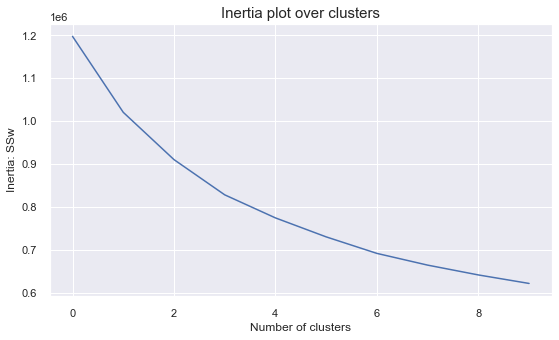

In [234]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df_merged_)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

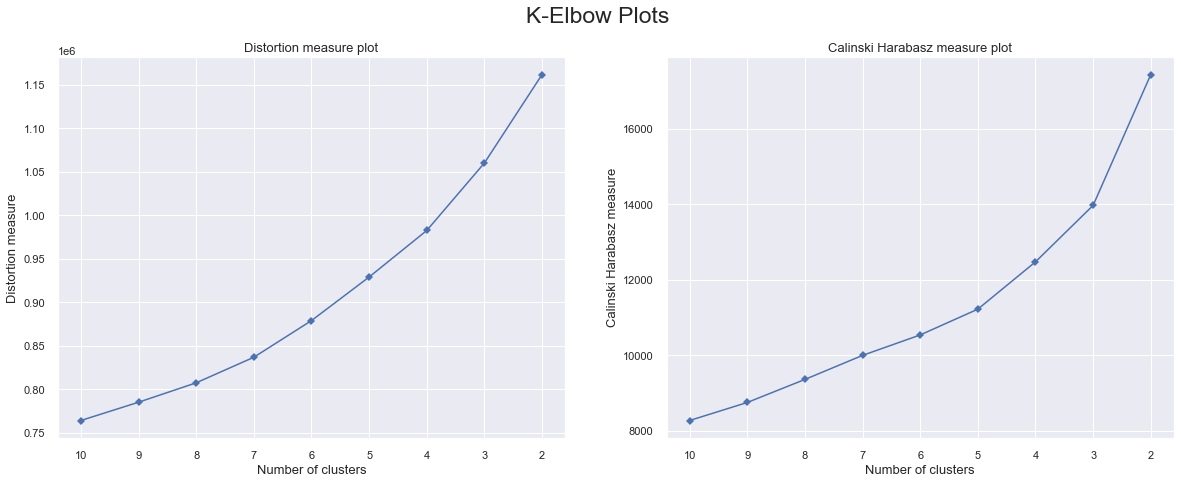

In [159]:
# Instantiate a scikit-learn K-Means model
clus_estim = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
# K-elbow plots
kelbowplots(clus_estim, df_merged_)

For n_clusters = 2, the average silhouette_score is : 0.1247691478741888
For n_clusters = 3, the average silhouette_score is : 0.1262343323269824
For n_clusters = 4, the average silhouette_score is : 0.10091493258198787
For n_clusters = 5, the average silhouette_score is : 0.10609167314496724


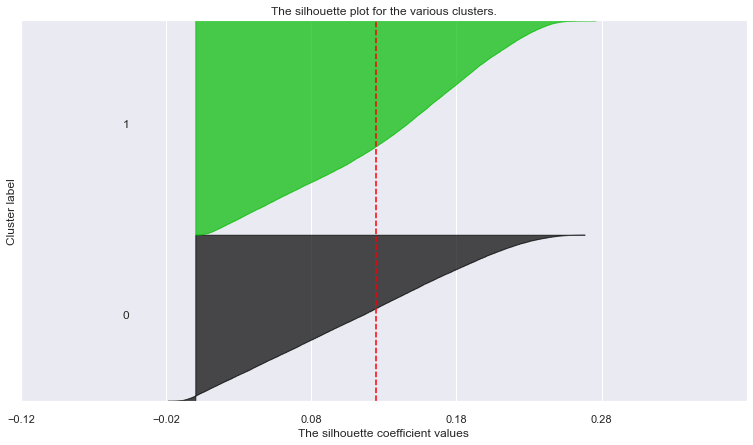

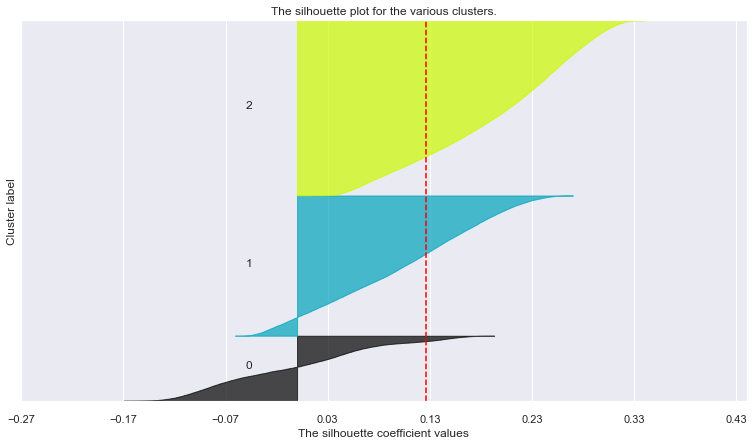

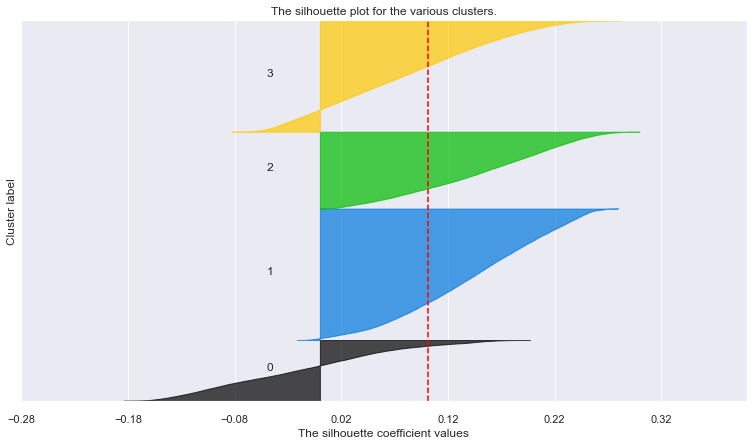

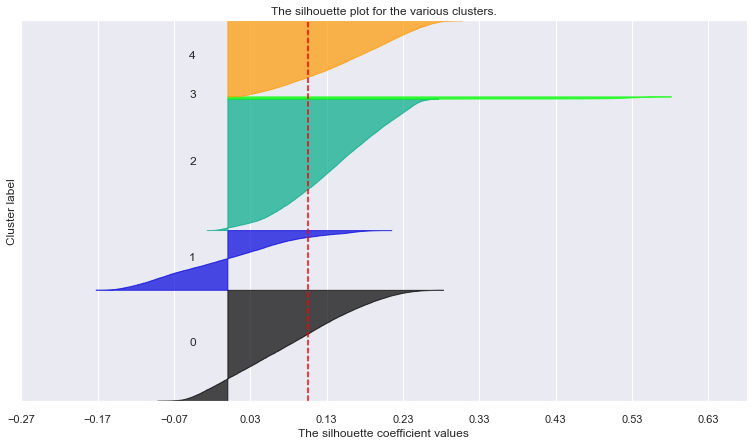

In [116]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

# Storing average silhouette metric
avg_silhouette = []
for nclus in range(1,6):
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df_merged_)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df_merged_, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_merged_, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df_merged_) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

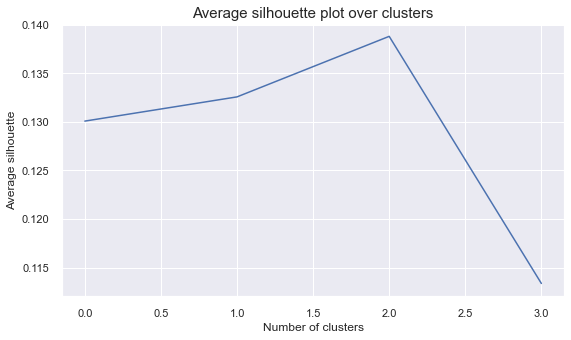

In [216]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [159]:
# Performing kmeans and appending the cluster labels to a new dataframe that keeps the cluster labels
clust_labels, cent = clus_Kmeans(df_merged_, 3)
kmeans_merged_df = df_merged_.copy()
kmeans_merged_df["kmeans_merged_labels"] = clust_labels

#com todos do summary segment

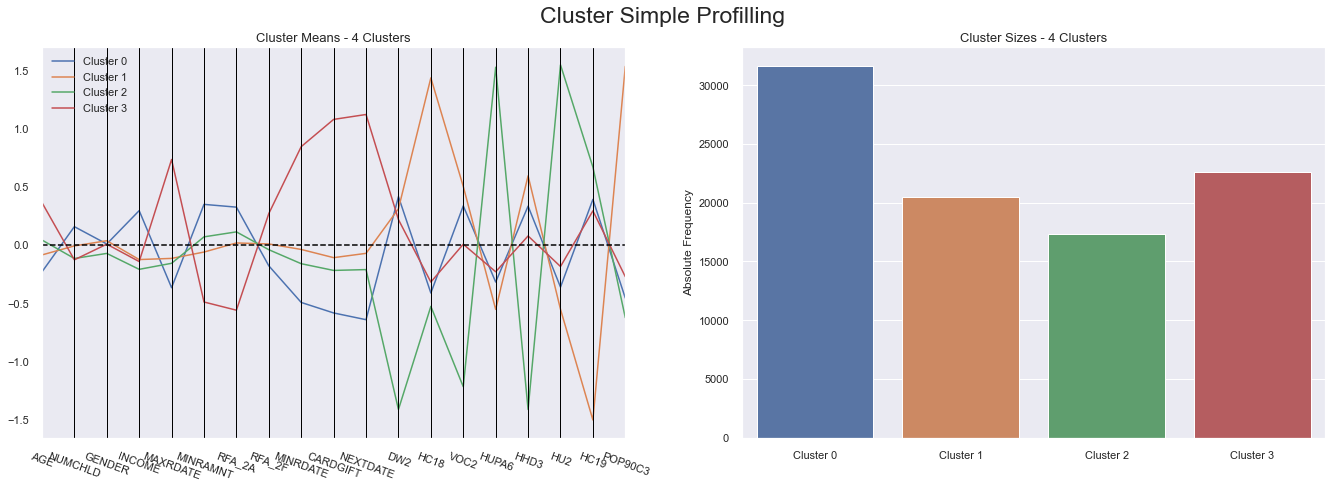

In [151]:
cluster_profiles(kmeans_merged_df, ["kmeans_merged_labels"], figsize=(23, 7))

escrever o novo

Cluster 0 -> slightly older group of people, with a bit less children, mixed group of people who are homeowners and who are not, slightly comparatively below income, spent the most in all the lifetime gifts to date but spent the least in the last promotion (RFA_2) and in the largest gift to date, leastamount of most recent gift, the least Average dollar amount of gifts to date,the second gift was done the most recent, highest number of lifetime gifts to card promotions to date, every person has PEP star RFA status, most live in an Urbanized Area, mixed people in renter occupied housing units and some live Inside Rural Area, in the neighborhood there is a low Percentage of Married Couple Families.


Cluster 1 -> younger group of people, slightly less people who are homeowners, slightly comparatively below income, spent the second least in all the lifetime gifts to date and spent second the least in the last promotion (RFA_2) and in the largest gift to date, few people have the PEP star RFA status, most do not live in an Urbanized Area, most people do not live in renter occupied housing units and most live Inside Rural Area, in the neighborhood there is a higher Percentage of Married Couple Families.


(least amount of most recent gift, the least Average dollar amount of gifts to date,the second gift was done the most recent, highest number of lifetime gifts to card promotions to date, )



Cluster 2 -> younger group of people, with a bit more children, slightly more people who are homeowners, slightly above income, spent least in all the lifetime gifts to date but spent the most in the last promotion (RFA_2) and in the largest gift to date, least amount of most recent gift, the highest Average dollar amount of gifts to date,the second gift was done the most time ago, lowest number of lifetime gifts to card promotions to date, few people have the PEP star RFA status, most live in an non Urbanized Area, more people live in renter occupied housing units and many people live Inside Rural Areas, in the neighborhood there is a lower Percentage of Married Couple Families.


In all the clusters there is a mix of people from both genders.

In [152]:
#R2 score

r2(kmeans_merged_df, ["kmeans_merged_labels"])



0.366977643692149

In [153]:
# We are essentially decomposing the R² into the R² for each variable
r2_variables(kmeans_merged_df, ['kmeans_merged_labels']).drop('kmeans_merged_labels').sort_values()

GENDER      0.001320
NUMCHLD     0.015032
RFA_2F      0.029227
INCOME      0.046541
AGE         0.052919
MINRAMNT    0.102384
RFA_2A      0.115744
MAXRDATE    0.186132
MINRDATE    0.264067
VOC2        0.373869
CARDGIFT    0.414274
NEXTDATE    0.459372
DW2         0.468167
HHD3        0.493675
HUPA6       0.554341
HU2         0.571606
HC18        0.592397
HC19        0.658731
POP90C3     0.685086
dtype: float64

In the rest of the notebook, we continued the exploration of the whole dataset with the most important variables. Although, there is a better r2 score with DBSCAN, this is due to having more clusters (5 instead of 3). From all the clusters explored, we found that kmeans is the best one for our dataset. 


GMM and DBSCAN both produce worse solutions since we obtain clusters with more similar average behaviour. For example, in the GMM clustering, in terms of Percentage of Population in Urbanized Area the 3 clusters lines are more near each other in the GMM than in the K-means solution. In the DBSCAN clustering, we can see that cluster 1 and cluster 3 don't appear to have any particular behaviour, since the cluster line overlap each other in many of the variables.


By analyzing the K-means solution, we can see that the variables that provide more discriminant behaviours across the clusters are Percentage of Population in Urbanized Area, Percent Population Inside Rural Area, PEP Star RFA Status and  Number of lifetime gifts to card promotions to date, suggesting that the customers differ mainly according to the historical behaviour with donations and where they live. 




# "
Furthermore, we can see (cluster 2) that there's a clear relationship between the year_salary and the product behaviour: people that earn less, invest mainly in the LOBs household, life and work_comp (and don't spend in motor). Besides, these customers are the ones that spend the highest proportion of their salary in premiums (t_premiums_salary) and the ones that have higher customer monetary value (cmv), making them a very important segment, despite their small size.

We can also identify a segment (cluster 1) of customers that spend a lot in motor and in nothing else. Finally, cluster 0 are the customers that spend the most in health, have the highest salary and are averse to spending money in motor."

<hr>
<a class="anchor" id="dt">
    
<font size="6"><span style='color: LightSkyBlue '> **4.6. Decision Tree**  </span></font>
    
</a>


In [156]:
# Preparing the data
X = kmeans_merged_df.drop(columns=['kmeans_merged_labels'])
y = kmeans_merged_df.kmeans_merged_labels

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 82.41% of the customers correctly


In [142]:
# Assessing feature importance
pd.Series(dt.feature_importances_, index=X_train.columns)

AGE         0.000000
NUMCHLD     0.000000
GENDER      0.000000
INCOME      0.000000
MAXRDATE    0.000000
MINRAMNT    0.000000
RFA_2A      0.000000
RFA_2F      0.000000
MINRDATE    0.000000
CARDGIFT    0.070438
NEXTDATE    0.430047
DW2         0.008254
HC18        0.000000
VOC2        0.000000
HUPA6       0.000000
HHD3        0.014565
HU2         0.476696
HC19        0.000000
POP90C3     0.000000
dtype: float64

run ['dot.bat', '-Tsvg']


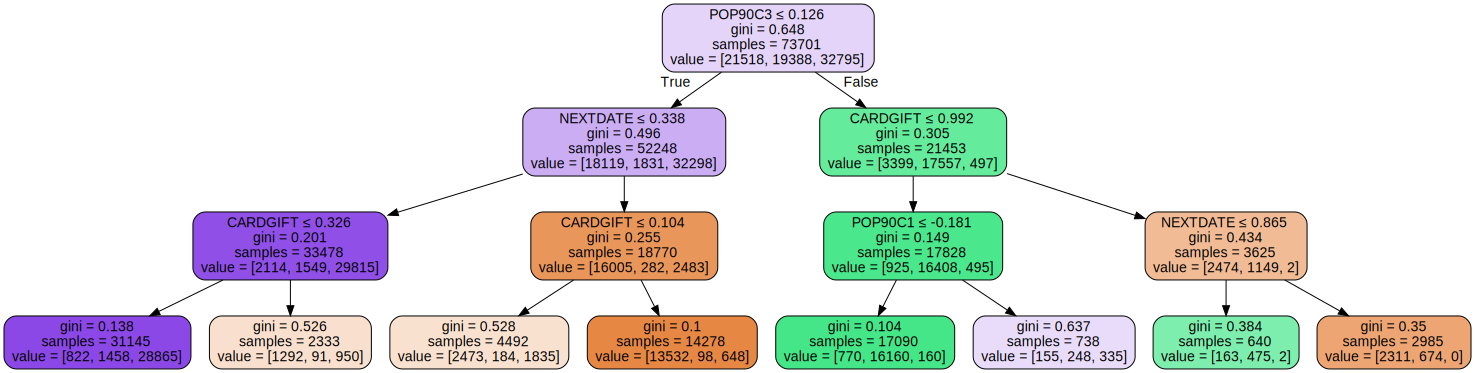

In [198]:
# Visualizing the decision tree
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns.to_list(),
                           filled=True,
                           rounded=True,
                           special_characters=True)  
graphviz.Source(dot_data)

<hr>
<a class="anchor" id="out_class">
    
<font size="6"><span style='color: LightSkyBlue '> **4.7. Classification of Outliers**  </span></font>
    
</a>
Even though we believe some of the outliers we spotted previously can be truly aberrant observations, we will proceed to classify them according to the final concatenated cluster. For this task we will resort to a simple decision tree which allows us to easily classify the outliers.

This classifier will also provide a useful tool for the future, as a set of rules can be extracted that helps understand why customers belong to a certain cluster. With this information, we can easily classify future customers by making simple queries to the database. This will allow a more personalized service to each future customer which can be dynamically adapted (a customer can belong to different clusters across time).

In [231]:
df_out= df_outliers[kmeans_merged_df.drop(columns=['kmeans_merged_labels']).columns]
df_out

#tem de se correr tudo duma vez

AGE  NUMCHLD  HOMEOWNR  INCOME  RFA_2A  MINRDATE  RFA_2F  CARDGIFT  \
CONTROLN                                                                        
190166     NaN      0.0         0     NaN       3    1491.0       1         2   
137726     NaN      0.0         0     2.0       2     730.0       1         1   
35239     44.0      2.0         0     5.0       0     761.0       4         4   
54795     37.0      0.0         1     4.0       0    1460.0       4         7   
87813      NaN      0.0         0     NaN       2     822.0       1         0   
...        ...      ...       ...     ...     ...       ...     ...       ...   
108257    56.0      0.0         1     5.0       2    1126.0       3         2   
6569      33.0      0.0         0     1.0       1    1825.0       3         7   
6648      71.0      0.0         1     6.0       3    2283.0       1         4   
151446     NaN      0.0         0     NaN       2     670.0       2         7   
98019     78.0      0.0         0     2.0       1    3561.0       3         5   

          PEPSTRFL  NEXTDATE  POP90C1  HU2  HHD3  POP90C3  STEREO  CDPLAY  \
CONTROLN                                                                    
190166           0    1491.0       34   27    73       66       0       0   
137726           0       NaN       99   99    86        0       0       0   
35239            0    1126.0       99   34    43        0       0       0   
54795            1    1370.0        0   17    59       34       1       1   
87813            0       NaN       99   30    40        0       0       0   
...            ...       ...      ...  ...   ...      ...     ...     ...   
108257           1    2191.0       99   15    51        0       0       0   
6569             1    1825.0       85   76    49       15       0       1   
6648             0    3286.0       99   99    96        0       0       0   
151446           1    2131.0       99   99    17        0       0       0   
98019            0    3286.0        0   92    10        0       0       0   

          PETS  HOMEE  PLATES  
CONTROLN                       
190166       0      0       0  
137726       0      0       0  
35239        0      0       0  
54795        1      0       0  
87813        0      0       0  
...        ...    ...     ...  
108257       0      0       0  
6569         0      0       0  
6648         0      0       0  
151446       0      0       0  
98019        0      0       0  

[773 rows x 19 columns]

In [232]:
#Firstly, to be able to predict the outliers, data needs to be imputed to the nan values and, 
#then, it needs to be standardized.

imp_mean = IterativeImputer(random_state=0)
df_complete = imp_mean.fit_transform(df_out[df_out.columns])
df_out[df_out.columns] = df_complete

df_out.reset_index(inplace=True)
out = df_out.columns.to_list()
out.remove('CONTROLN')

scaler = StandardScaler()
df_out[out] = pd.DataFrame(scaler.fit_transform(df_out[out]), columns = out)

df_out.set_index(['CONTROLN'],inplace=True) 

df_out

AGE   NUMCHLD  HOMEOWNR    INCOME    RFA_2A  MINRDATE  \
CONTROLN                                                               
190166   -0.259277 -0.325848 -0.890788  0.244480  1.340335 -0.280150   
137726   -0.801568 -0.325848 -0.890788 -0.809865  0.310436 -1.070559   
35239    -0.984406  3.411530 -0.890788  0.924460 -1.749364 -1.038361   
54795    -1.443968 -0.325848  1.122601  0.346352 -1.749364 -0.312348   
87813    -0.239195 -0.325848 -0.890788 -0.216100  0.310436 -0.975004   
...            ...       ...       ...       ...       ...       ...   
108257   -0.196585 -0.325848  1.122601  0.924460  0.310436 -0.659255   
6569     -1.706575 -0.325848 -0.890788 -1.387974 -0.719464  0.066758   
6648      0.788192 -0.325848  1.122601  1.502569  1.340335  0.542458   
151446   -0.028359 -0.325848 -0.890788 -0.912822  0.310436 -1.132878   
98019     1.247754 -0.325848 -0.890788 -0.809865 -0.719464  1.869848   

            RFA_2F  CARDGIFT  PEPSTRFL  NEXTDATE   POP90C1       HU2  \
CONTROLN                                                               
190166   -0.958338 -0.700617 -1.011712 -0.568789 -0.473889 -0.363770   
137726   -0.958338 -0.896698 -1.011712 -0.960879  0.879444  1.761121   
35239     1.491922 -0.308454 -1.011712 -0.912573  0.879444 -0.157183   
54795     1.491922  0.279790  0.988424 -0.682756 -1.181786 -0.658893   
87813    -0.958338 -1.092780 -1.011712 -0.926024  0.879444 -0.275232   
...            ...       ...       ...       ...       ...       ...   
108257    0.675169 -0.700617  0.988424  0.090521  0.879444 -0.717918   
6569      0.675169  0.279790  0.988424 -0.254204  0.587957  1.082337   
6648     -0.958338 -0.308454 -1.011712  1.121871  0.879444  1.761121   
151446   -0.141585  0.279790  0.988424  0.034009  0.879444  1.761121   
98019     0.675169 -0.112373 -1.011712  1.121871 -1.181786  1.554535   

              HHD3   POP90C3    STEREO    CDPLAY      PETS     HOMEE    PLATES  
CONTROLN                                                                        
190166    0.684336  1.009873 -0.396466 -0.358423 -0.367553 -0.080687 -0.080687  
137726    1.215740 -0.604671 -0.396466 -0.358423 -0.367553 -0.080687 -0.080687  
35239    -0.541980 -0.604671 -0.396466 -0.358423 -0.367553 -0.080687 -0.080687  
54795     0.112055  0.227064  2.522282  2.789998  2.720694 -0.080687 -0.080687  
87813    -0.664612 -0.604671 -0.396466 -0.358423 -0.367553 -0.080687 -0.080687  
...            ...       ...       ...       ...       ...       ...       ...  
108257   -0.214962 -0.604671 -0.396466 -0.358423 -0.367553 -0.080687 -0.080687  
6569     -0.296717 -0.237729 -0.396466  2.789998 -0.367553 -0.080687 -0.080687  
6648      1.624512 -0.604671 -0.396466 -0.358423 -0.367553 -0.080687 -0.080687  
151446   -1.604787 -0.604671 -0.396466 -0.358423 -0.367553 -0.080687 -0.080687  
98019    -1.890928 -0.604671 -0.396466 -0.358423 -0.367553 -0.080687 -0.080687  

[773 rows x 19 columns]

In [233]:
# Predicting the cluster labels of the outliers
df_out['merged_labels'] = dt.predict(df_out)
df_out.head()


AGE   NUMCHLD  HOMEOWNR    INCOME    RFA_2A  MINRDATE  \
CONTROLN                                                               
190166   -0.259277 -0.325848 -0.890788  0.244480  1.340335 -0.280150   
137726   -0.801568 -0.325848 -0.890788 -0.809865  0.310436 -1.070559   
35239    -0.984406  3.411530 -0.890788  0.924460 -1.749364 -1.038361   
54795    -1.443968 -0.325848  1.122601  0.346352 -1.749364 -0.312348   
87813    -0.239195 -0.325848 -0.890788 -0.216100  0.310436 -0.975004   

            RFA_2F  CARDGIFT  PEPSTRFL  NEXTDATE   POP90C1       HU2  \
CONTROLN                                                               
190166   -0.958338 -0.700617 -1.011712 -0.568789 -0.473889 -0.363770   
137726   -0.958338 -0.896698 -1.011712 -0.960879  0.879444  1.761121   
35239     1.491922 -0.308454 -1.011712 -0.912573  0.879444 -0.157183   
54795     1.491922  0.279790  0.988424 -0.682756 -1.181786 -0.658893   
87813    -0.958338 -1.092780 -1.011712 -0.926024  0.879444 -0.275232   

              HHD3   POP90C3    STEREO    CDPLAY      PETS     HOMEE  \
CONTROLN                                                               
190166    0.684336  1.009873 -0.396466 -0.358423 -0.367553 -0.080687   
137726    1.215740 -0.604671 -0.396466 -0.358423 -0.367553 -0.080687   
35239    -0.541980 -0.604671 -0.396466 -0.358423 -0.367553 -0.080687   
54795     0.112055  0.227064  2.522282  2.789998  2.720694 -0.080687   
87813    -0.664612 -0.604671 -0.396466 -0.358423 -0.367553 -0.080687   

            PLATES  merged_labels  
CONTROLN                           
190166   -0.080687              1  
137726   -0.080687              2  
35239    -0.080687              2  
54795    -0.080687              0  
87813    -0.080687              2


<hr>
<a class="anchor" id="t_sne">
    
<font size="6"><span style='color: LightSkyBlue '> **4.8. Cluster visualization using t-SNE**  </span></font>
    
</a>

In [157]:
# This is step can be quite time consuming
two_dim = TSNE(random_state=42, n_jobs=-1).fit_transform(kmeans_merged_df.drop(columns=['kmeans_merged_labels']))   

#-1 mais rapido 

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f938a3894d0>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f938a3894d0> on colorbar
Setting pcolormesh
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


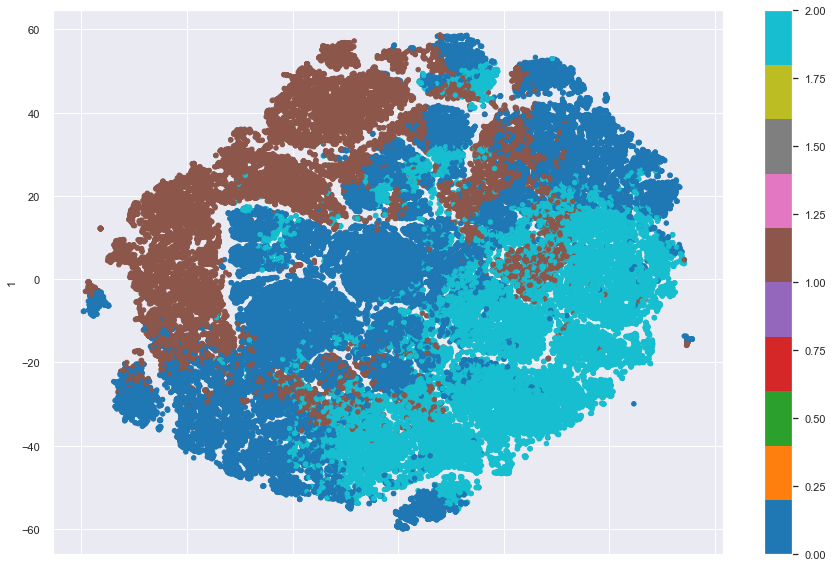

In [158]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_tsne['kmeans_merged_labels'], colormap='tab10', figsize=(15,10))
plt.show()

<hr>
<a class="anchor" id="dbscan_noise">
    
<font size="6"><span style='color: LightSkyBlue '> **4.9. DBSCAN (Density-based spatial clustering of applications with noise)**  </span></font>
    
</a>

We've tried with different parameters and the best results, with 7 clusters, can be seen below.

In [237]:
from sklearn.neighbors import NearestNeighbors

In [238]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=3, min_samples=20, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df_merged_final)

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

#43 com eps=2
#36 com eps=1
#10 com eps=3

Number of estimated clusters : 7


In [239]:
# Concatenating the labels to df_merged_final
dbscan_merged_df = pd.concat([df_merged_, pd.Series(dbscan_labels, index=df_merged_.index, name="dbscan_labels")], axis=1)
dbscan_merged_df.head()

AGE   NUMCHLD  HOMEOWNR    INCOME    RFA_2A  MINRDATE  \
CONTROLN                                                               
95515     0.063799 -0.360567 -1.117182 -0.480446 -0.976371  0.123641   
148535   -0.961543  1.301660  0.895109  1.319946  1.404899 -0.315937   
15078     0.132155 -0.360567 -1.117182 -0.480446 -0.976371  0.406374   
172556    0.679004 -0.360567 -1.117182 -1.680707 -0.976371  1.913940   
7112      1.225853  1.301660  0.895109 -0.480446  0.214264 -0.315937   

            RFA_2F  CARDGIFT  PEPSTRFL  NEXTDATE   POP90C1       HU2  \
CONTROLN                                                               
95515     1.958852  1.991554  1.055978  0.713713 -1.247725 -0.754811   
148535    0.088903 -0.895798 -0.946989 -0.983982  0.844207 -1.240196   
15078     1.958852  1.991554  1.055978  0.433963 -1.247725 -0.366504   
172556    1.958852  0.436826  1.055978  1.491708 -1.247725  1.089649   
7112      0.088903  0.658930 -0.946989  3.996653  0.844207 -0.948965   

              HHD3   POP90C3    STEREO    CDPLAY      PETS     HOMEE  \
CONTROLN                                                               
95515     0.700145  0.960055 -0.395200 -0.386045 -0.423243 -0.097129   
148535    1.879412 -0.658154 -0.395200 -0.386045 -0.423243 -0.097129   
15078     0.372571  1.781607 -0.395200 -0.386045 -0.423243 -0.097129   
172556    0.110512  1.632234 -0.395200 -0.386045 -0.423243 -0.097129   
7112     -0.675666 -0.658154  2.530362 -0.386045 -0.423243 -0.097129   

            PLATES  dbscan_labels  
CONTROLN                           
95515    -0.077071              0  
148535   -0.077071              0  
15078    -0.077071              0  
172556   -0.077071              0  
7112     -0.077071             -1

In [240]:
# Computing the R^2 of the cluster solution
df_nonoise = dbscan_merged_df.loc[dbscan_merged_df['dbscan_labels'] != -1]
sst = get_ss(df_merged_)  # get total sum of squares
ssw_labels = df_nonoise.groupby(by='dbscan_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

#60 com eps=2
#94 com eps=1
#21 com eps=3

Cluster solution with R^2 of 0.1328


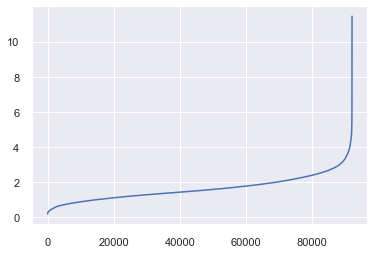

In [241]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20,n_jobs=-1)
neigh.fit(df_merged_)
distances, _ = neigh.kneighbors(df_merged_)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

findfont: Matching sans\-serif:style=normal:variant=normal:weight=heavy:stretch=normal:size=13.0.
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.43
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.145
findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.145
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>) = 10.145
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.43
findfont: score(<Fo

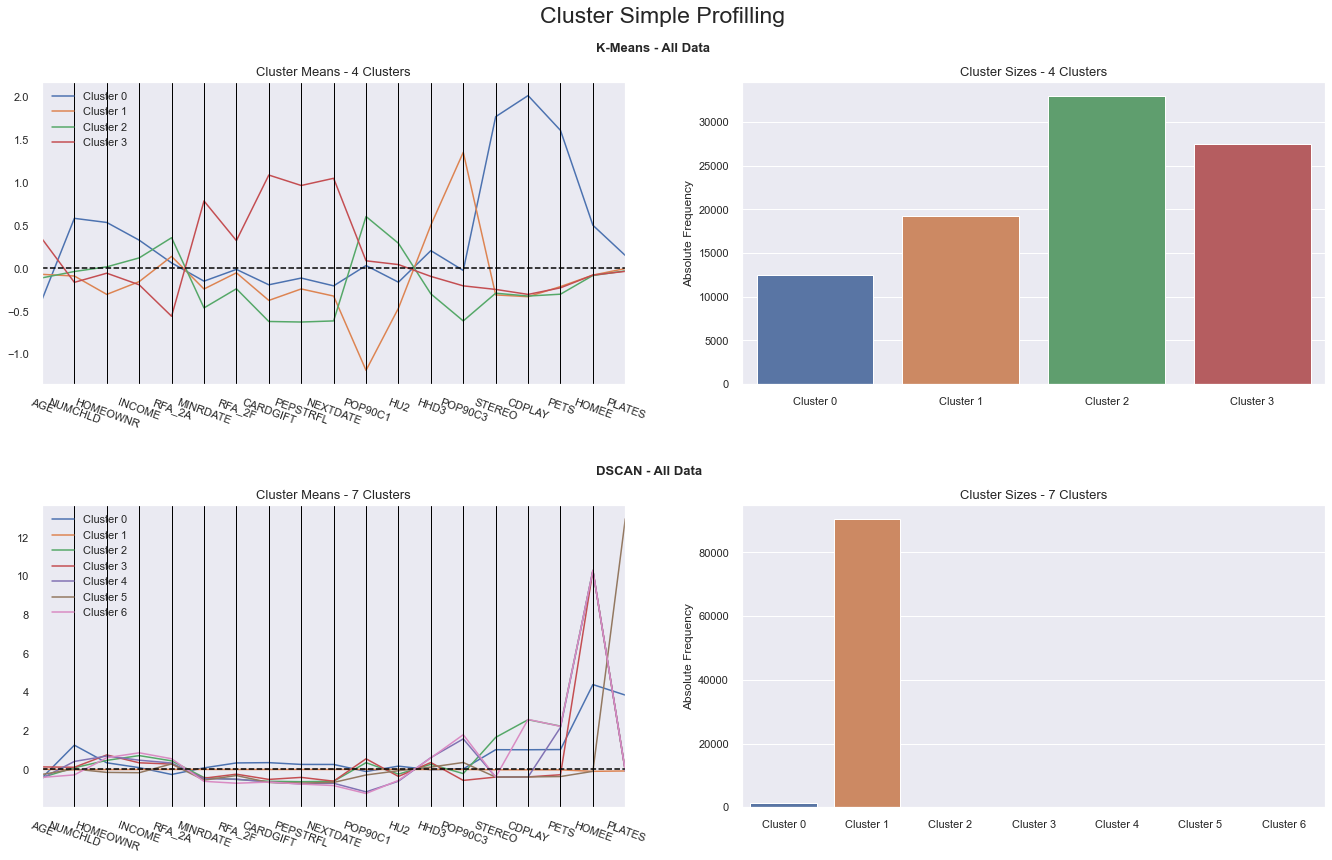

In [242]:
# Comparing both K-means and DBSCAN solutions
dbkm_complete_std_df = kmeans_merged_df.merge(dbscan_merged_df["dbscan_labels"], left_index=True, right_index=True)
cluster_profiles(dbkm_complete_std_df, ["kmeans_merged_labels", "dbscan_labels"], figsize=(23, 13), compar_titles=["K-Means - All Data", "DSCAN - All Data"])

<hr>
<a class="anchor" id="gmm">
    
<font size="6"><span style='color: LightSkyBlue '> **4.10. GMM (Gaussian Mixture Model )**  </span></font>
    
</a>

### Characteristics:
- Assumes the data is generated from a mixture of finite number of Gaussian distributions with unknown parameters
- Use the EM (Expectation Maximization algorithm) to estimate the parameters
- Provides a probability of each observation belonging to each cluster
- Advantages over K-Means:
    - Can deal with spherical and elipsoid cluster shapes
    - Number of components needs to be defined apriori



In [222]:
# GMM
from sklearn.mixture import GaussianMixture

In [223]:
def comp_gmm_models(df, max_nclus, min_nclus=2):
    """
    This function produces a bar plot for each quality criteria (AIC, BIC) to asses what is the best gmm configuration
    """
    # Data
    n_components_range = range(min_nclus, max_nclus+1)
    cv_types = ['spherical', 'tied', 'diag', 'full'] #values of the covariance type parameter
    bic = np.empty((4, len(n_components_range)))
    aic = np.empty((4, len(n_components_range)))
    for r, cv_type in enumerate(cv_types):
        for c, n_components in enumerate(n_components_range):
            # Fit a Gaussian mixture with EM
            gmm = GaussianMixture(n_components=n_components, covariance_type=cv_type)
            gmm.fit(df)
            # Save quality measure value
            bic[r, c] = gmm.bic(df)
            aic[r, c] = gmm.aic(df)

    # Traces
    bic = pd.DataFrame(bic, columns=n_components_range, index=cv_types)
    aic = pd.DataFrame(aic, columns=n_components_range, index=cv_types)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23,7))
    
    sns.barplot(data=bic.reset_index().melt(id_vars="index"),
                x="variable", y="value", hue="index", ax=ax1)
    
    sns.barplot(data=aic.reset_index().melt(id_vars="index"),
                x="variable", y="value", hue="index", ax=ax2)

    # Layout
    ax1.set_xlabel('Number of Components')
    ax2.set_xlabel('Number of Components')
    ax1.set_ylabel('BIC Criteria')
    ax2.set_ylabel('AIC Criteria')
    ax1.legend(title="Covariance Type")
    ax2.legend(title="Covariance Type")
    plt.suptitle('BIC and AIC Scores per Model', fontsize=23)

    plt.show()

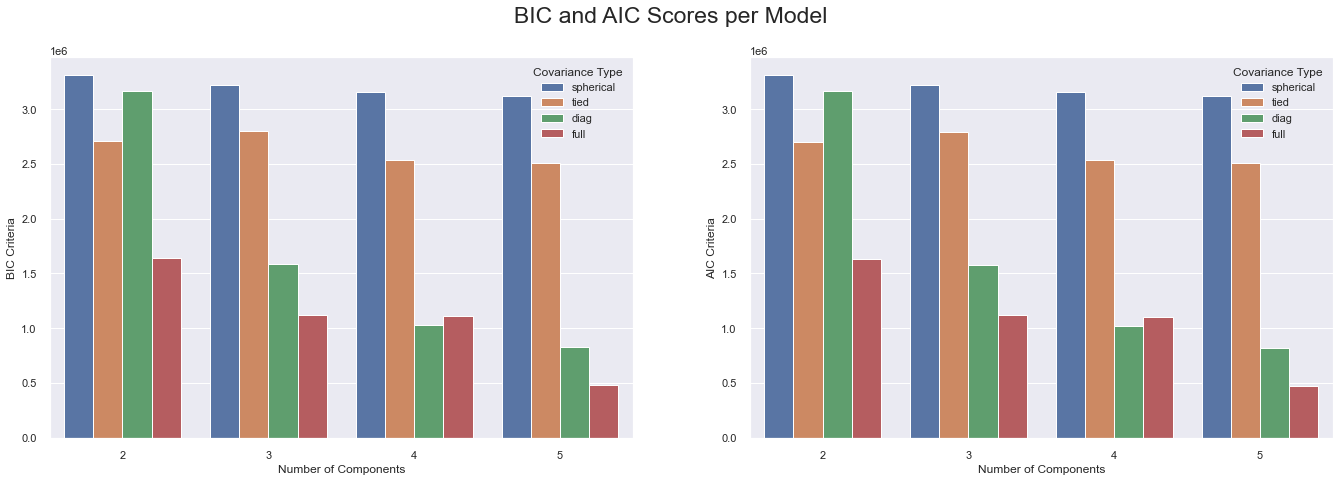

In [241]:
# Use the function built to choose the best GMM configuration
comp_gmm_models(df_merged_, 5)

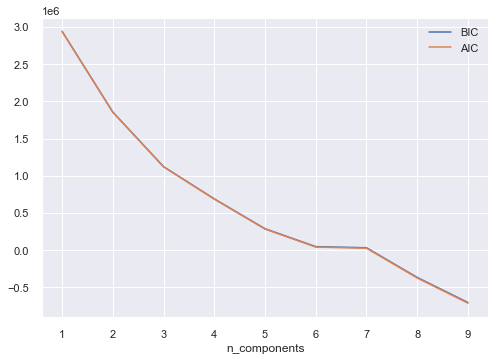

In [242]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df_merged_) #, n_jobs=4
          for n in n_components]

bic_values = [m.bic(df_merged_) for m in models]
aic_values = [m.aic(df_merged_) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

The first step in GMM is to define the parameters to use, such as the number of clusters to retain and the covariancy type to use. In this case, we will do with 3 clusters, following to the graph above.

From the plot above, the covariance type "full" is the best one to use, both in terms of AIC and BIC information criteria (the lower the better), which are measures of the cluster quality. Therefore, from the plot above we conclude that we want to use the "full" Covariance Type in our GMM.

Besides, it is also possible to see how the quality varies according to the number of clusters retained. One can conclude that with more clusters, the quality increases overall, independently of the covariance type (as it would be expected). Therefore, we will perform some further investigation on how many clusters to retain.

In [226]:
#the gmm method was aggregated on a function
def doGMM(df, nclust):
    model=GaussianMixture(n_components=nclust, init_params='kmeans', random_state=0)
    model.fit(df)
    clust_labels = model.predict(df)
    return(clust_labels)

In [231]:
# Performing gmm and appending the cluster labels to a new dataframe that keeps the cluster labels
clust_labels = doGMM(df_merged_, 3)
gmm_df = df_merged_.copy()
gmm_df["gmm_labels"] = clust_labels

In [232]:
# Computing the R^2 of the cluster solution
sst = get_ss(df_merged_)  # get total sum of squares
ssw_labels = gmm_df.groupby(by='gmm_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.1498


findfont: Matching sans\-serif:style=normal:variant=normal:weight=heavy:stretch=normal:size=13.0.
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.145
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.43
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 2.145
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.145
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.43
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldO

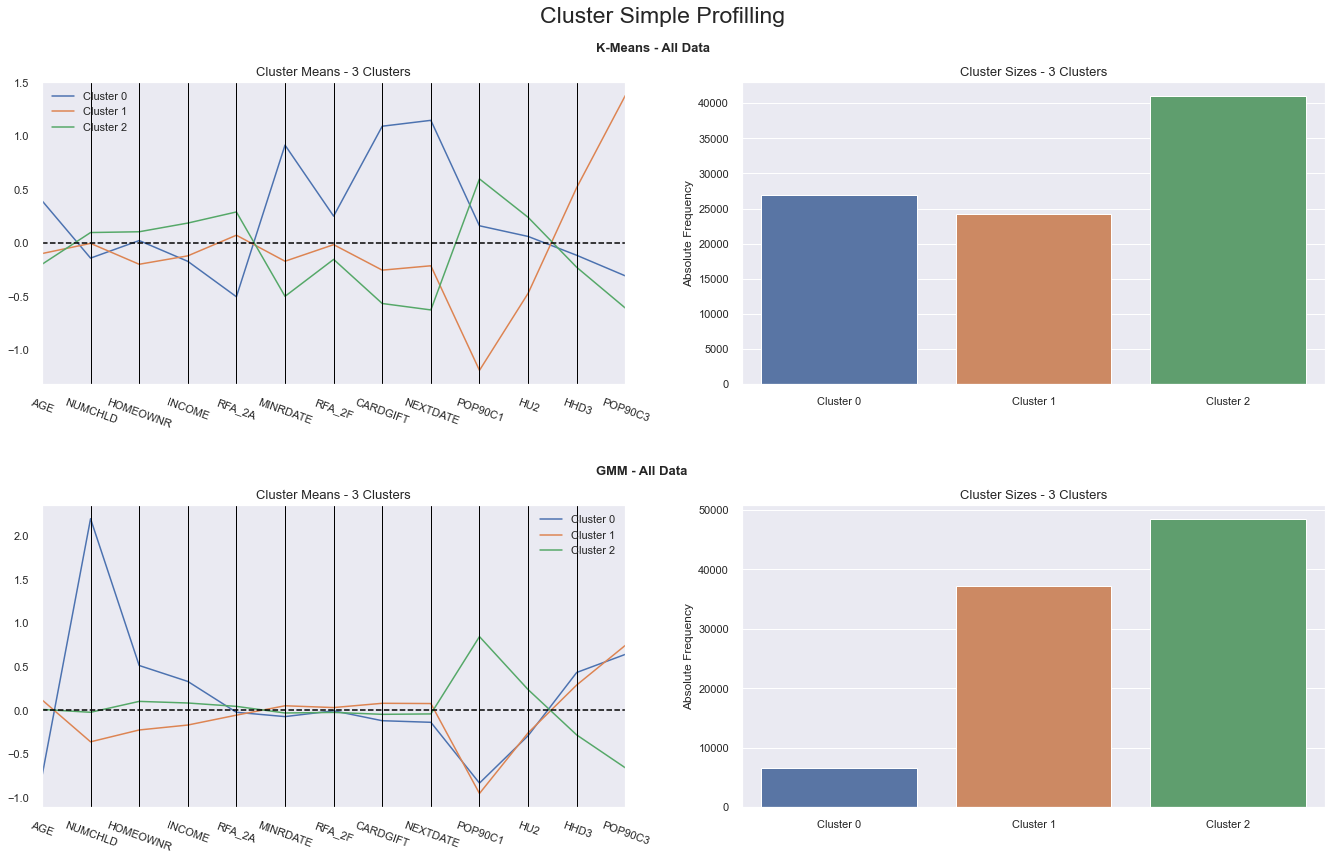

In [233]:
# Comparing both K-means and GMM solutions
comp_complete_df = kmeans_merged_df.merge(gmm_df["gmm_labels"], left_index=True, right_index=True)
cluster_profiles(comp_complete_df, ["kmeans_merged_labels", "gmm_labels"], figsize=(23, 13), compar_titles=["K-Means - All Data", "GMM - All Data"])

## References:
Deal with nan values:
https://stackoverflow.com/questions/50670080/mice-implementation-in-python
https://stackoverflow.com/questions/45321406/missing-value-imputation-in-python-using-knn
https://stackoverflow.com/questions/45239256/data-imputation-with-fancyimpute-and-pandas
https://stackoverflow.com/questions/54059964/can-not-use-mice-from-fancyimputer-python


Use mean or median:
https://www.wcc.nrcs.usda.gov/normals/median_average.htm